# Meta-analyses of Family and ADSP results

**Goal**: meta-analyze the family and Case-control (ADSP) data per population and across all population 

**Input data**:gmmat and smmat summary results for common variants and rare variants respectively from Family data and ADSP data

**Input file paths**

  family data
  > /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/
  
  > /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/
  
  ADSP data 
   > /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/
   
   > /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/

**Software**: [METAL](https://genome.sph.umich.edu/wiki/METAL_Documentation)

## Common variants

### without APOE4 adjustment 

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
ALLELE   A1 A2
EFFECT   SCORE
PVAL     PVAL

PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/African/no_apoe/geno_qced.African.African.pca.projected.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/noapoe/adsp_geno_qced.African.African.pca.projected_outlier_removed.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/European/no_apoe/geno_qced.European.European.pca.projected.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/noapoe/adsp_geno_qced.European.European.pca.projected_outlier_removed.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/Hispanic/no_apoe/geno_qced.Hispanic.Hispanic.pca.projected.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/noapoe/adsp_geno_qced.Hispanic.Hispanic.pca.projected_outlier_removed.gmmat.score.txt.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/metal.gmmat_noAPOE_META .TXT
ANALYZE

## Completed meta-analysis for 21870007 markers!
## Smallest p-value is 2.234e-81 at marker 'chr19:44908684_T_C'

In [13]:
library("dplyr")
library(stringr)
library(qqman)

In [6]:
meta_noAPOE <- read.table('/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/metal.gmmat_noAPOE_META1.TXT', header = T, sep = '\t')
meta_noAPOE <- meta_noAPOE %>% mutate (SNP = MarkerName)
meta_noAPOE <- meta_noAPOE %>% mutate(across('MarkerName', str_replace_all, '_', ':'))
meta_noAPOE <- meta_noAPOE %>% separate(MarkerName, c('CHR','POS','REF', 'ALT'),  sep = ':')
meta_noAPOE <- meta_noAPOE %>% mutate(across('CHR', str_replace, 'chr', ''))
meta_noAPOE$POS <-  as.numeric(meta_noAPOE$POS)
meta_noAPOE$CHR <-  as.numeric(meta_noAPOE$CHR)
write.table(meta_noAPOE,'/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta.gmmat_noAPOE.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(meta_noAPOE$P.value, df=1, lower.tail=FALSE)) / qchisq(0.5, 1)

In [7]:
lambda

[1] 0.9944127

In [9]:
### For Manhattan plot using qqman #### 
## manhattan plot
jpeg(filename = "/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_manhattan.plot.jpg")
manhattan(meta_noAPOE, chr='CHR', bp='POS', snp='SNP', p='P.value', main = 'Manhattan plot', cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"))
dev.off()
### qq plot
jpeg(filename = "/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_qq.plot.jpg")
qq(meta_noAPOE$P.value, main = "QQ plot ", cex = 1.5,las = 1, cex.axis = 0.9, col = "blue4")
dev.off()

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_qq.plot.jpg (13.1 KiB):

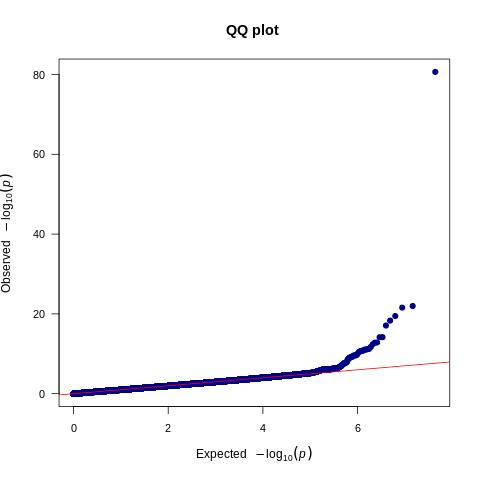

> /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_manhattan.plot.jpg (14.5 KiB):

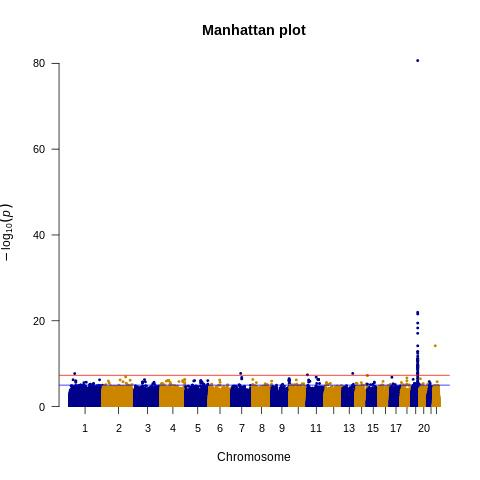

In [10]:
%preview /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_manhattan.plot.jpg
%preview /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_noapoe_qq.plot.jpg

In [4]:
meta_noAPOE <- read.table('/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta.gmmat_noAPOE.txt', header = T)
meta_noAPOE_sig <- meta_noAPOE %>% filter(P.value < 5e-08)
head(arrange(meta_noAPOE_sig,P.value))
write.csv(meta_noAPOE_sig, '/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variantsmeta_noAPOE_sig.csv')

CHR POS      REF ALT Allele1 Allele2 Weight Zscore P.value   Direction
1 19  44908684 T   C   t       c        8873  19.106 2.234e-81 +++?++   
2 19  44901174 T   C   t       c       19852  -9.807 1.053e-22 ------   
3 19  44892887 C   T   t       c       19890  -9.713 2.660e-22 ------   
4 19  44892362 A   G   a       g       19862   9.204 3.445e-20 ++++++   
5 19  44909967 TGG T   t       tgg      2886  -8.916 4.829e-19 -?-?-?   
6 19  44888997 C   T   t       c        2895  -8.595 8.360e-18 -?-?-?   
  SNP                 
1 chr19:44908684_T_C  
2 chr19:44901174_T_C  
3 chr19:44892887_C_T  
4 chr19:44892362_A_G  
5 chr19:44909967_TGG_T
6 chr19:44888997_C_T

In [5]:
arrange(meta_noAPOE_sig,P.value)

CHR POS      REF ALT   Allele1 Allele2 Weight Zscore P.value   Direction
1  19  44908684 T   C     t       c        8873  19.106 2.234e-81 +++?++   
2  19  44901174 T   C     t       c       19852  -9.807 1.053e-22 ------   
3  19  44892887 C   T     t       c       19890  -9.713 2.660e-22 ------   
4  19  44892362 A   G     a       g       19862   9.204 3.445e-20 ++++++   
5  19  44909967 TGG T     t       tgg      2886  -8.916 4.829e-19 -?-?-?   
6  19  44888997 C   T     t       c        2895  -8.595 8.360e-18 -?-?-?   
7  22  24627948 A   G     a       g       13056  -7.788 6.800e-15 ???-?-   
8  19  44921095 A   ATTTT a       atttt     945   7.785 6.983e-15 ??+???   
9  19  44918903 C   G     c       g        2896   7.387 1.503e-13 -?+?+?   
10 19  44906745 G   A     a       g        2896  -7.376 1.636e-13 -?-?-?   
11 19  44892652 C   G     c       g        2896   7.248 4.237e-13 +?+?+?   
12 19  44891079 T   C     t       c        2896   7.045 1.851e-12 +?+?+?   
13 19  44884339 G   A     a       g        2896  -6.881 5.932e-12 +?-?-?   
14 19  44903416 G   A     a       g        2896  -6.857 7.028e-12 -?-?-?   
15 19  44919589 G   A     a       g        2896  -6.833 8.313e-12 -?-?-?   
16 19  44884202 C   G     c       g        2896   6.818 9.252e-12 -?+?+?   
17 19  44883210 G   GTAA  g       gtaa     2896   6.742 1.562e-11 -?+?+?   
18 19  44921093 TAA T     t       taa      2888  -6.735 1.638e-11 -?-?-?   
19 19  44919689 A   G     a       g        2896   6.715 1.885e-11 +?+?+?   
20 19  44897790 A   AG    a       ag       2893   6.678 2.423e-11 +?+?+?   
21 19  44884873 G   A     a       g        2896  -6.611 3.805e-11 +?-?-?   
22 19  44891712 T   G     t       g        2896   6.516 7.212e-11 +?+?+?   
23 19  44923868 T   A     a       t        2896  -6.385 1.717e-10 -?-?-?   
24 19  44921257 A   C     a       c        2895   6.342 2.269e-10 -?+?+?   
25 19  44887076 A   G     a       g        2896   6.336 2.362e-10 +?+?+?   
26 19  44893408 G   T     t       g        2896  -6.319 2.627e-10 -?-?-?   
27 19  44917997 G   A     a       g        2896  -6.308 2.819e-10 -?-?-?   
28 19  44924977 G   A     a       g        2896  -6.251 4.068e-10 -?-?-?   
29 19  44892457 T   C     t       c        2896   6.197 5.768e-10 +?+?+?   
30 19  44882783 A   AT    a       at       2892   6.193 5.922e-10 +?+?+?   
31 19  44912456 G   A     a       g        2896  -6.151 7.721e-10 -?-?-?   
32 19  44912678 G   T     t       g        2896  -6.132 8.675e-10 -?-?-?   
33 19  44892962 C   T     t       c        2896  -6.121 9.320e-10 -?-?-?   
34 19  44916825 A   C     a       c        2893   6.056 1.392e-09 +?+?+?   
35 19  44913484 C   T     t       c        2896  -5.956 2.586e-09 -?-?-?   
36 19  44882783 ATT A     a       att      2892  -5.948 2.723e-09 -?-?-?   
37 19  44912921 G   T     t       g        2896  -5.747 9.075e-09 -?-?-?   
38 19  44888197 C   T     t       c        5772  -5.674 1.398e-08 --??-?   
39 19  44920730 C   CA    ca      c        2894  -5.651 1.593e-08 -?-?-?   
40  7  68174015 TAA T     t       taa      2775  -5.623 1.876e-08 ??-?-?   
41 13  93600967 G   A     a       g        2890  -5.622 1.886e-08 -?-?-?   
42  1  35095501 G   A     a       g        2891  -5.612 1.996e-08 +?-?-?   
43 19  44885243 A   G     a       g        2896   5.595 2.200e-08 +?+?+?   
44 11   1018087 G   GTA   g       gta     10921   5.489 4.032e-08 ???+??   
45 19  44892587 G   A     a       g        2896  -5.480 4.243e-08 +?-?-?   
   SNP                   
1  chr19:44908684_T_C    
2  chr19:44901174_T_C    
3  chr19:44892887_C_T    
4  chr19:44892362_A_G    
5  chr19:44909967_TGG_T  
6  chr19:44888997_C_T    
7  chr22:24627948_A_G    
8  chr19:44921095_A_ATTTT
9  chr19:44918903_C_G    
10 chr19:44906745_G_A    
11 chr19:44892652_C_G    
12 chr19:44891079_T_C    
13 chr19:44884339_G_A    
14 chr19:44903416_G_A    
15 chr19:44919589_G_A    
16 chr19:44884202_C_G    
17 chr19:44883210_G_GTAA 
18 chr19:44921093_TAA_T  
19 chr19:4491

### with APOE4 adjustment

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
ALLELE   A1 A2
EFFECT   SCORE
PVAL     PVAL

PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/African/apoe/geno_qced.African.African.pca.projected.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/adsp_geno_qced.African.African.pca.projected_outlier_removed.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/European/apoe/geno_qced.European.European.pca.projected.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/gmmat/apoe/adsp_geno_qced.European.European.pca.projected_outlier_removed.gmmat.score.txt.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_common_variants/gmmat/results/Hispanic/apoe/geno_qced.Hispanic.Hispanic.pca.projected.gmmat.score.txt.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/metal.gmmat_APOE_META .TXT
ANALYZE

## Completed meta-analysis for 21870007 markers!
## Smallest p-value is 9.153e-15 at marker 'chr22:24627948_A_G'

In [14]:
meta_APOE <- read.table('/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/metal.gmmat_APOE_META1.TXT', header = T, sep = '\t')
meta_APOE <- meta_APOE %>% mutate (SNP = MarkerName)
meta_APOE <- meta_APOE %>% mutate(across('MarkerName', str_replace_all, '_', ':'))
meta_APOE <- meta_APOE %>% separate(MarkerName, c('CHR','POS','REF', 'ALT'),  sep = ':')
meta_APOE <- meta_APOE %>% mutate(across('CHR', str_replace, 'chr', ''))
meta_APOE$POS <-  as.numeric(meta_APOE$POS)
meta_APOE$CHR <-  as.numeric(meta_APOE$CHR)
write.table(meta_APOE,'/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta.gmmat_APOE.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(meta_APOE$P.value, df=1, lower.tail=FALSE)) / qchisq(0.5, 1)

In [ ]:
### For Manhattan plot using qqman #### 
## manhattan plot
jpeg(filename = "/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_apoe_manhattan.plot.jpg")
manhattan(meta_APOE, chr='CHR', bp='POS', snp='SNP', p='P.value', main = 'Manhattan plot', cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"))
dev.off()
### qq plot
jpeg(filename = "/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variants/meta_apoe_qq.plot.jpg")
qq(meta_APOE$P.value, main = "QQ plot ", cex = 1.5,las = 1, cex.axis = 0.9, col = "blue4")
dev.off()

In [ ]:
meta_APOE_sig <- meta_noAPOE %>% filter(P.value <= 5e-08)
write.csv(meta_APOE_sig, '/mnt/mfs/statgen/alzheimers-family/meta_analyses/common_variantsmeta_APOE_sig.csv')

## Rare variants

For rare variants analyses we ran three different models based on the function of variants  

**Model 1** : Only predicted loss of function variants (pLOF)

**Model 2**: pLOF + possibly damging missense variants (missinse variants with REVEL score > 0.5)

**Model 3**: PLOF + missense variants

For each models we ran separately for AF <=0.01 (af1) and AF <=0.05(af5) based on gnomAD AF

**model adjustment** : age, sex, the first 3 PCs. Additionaly we ran the analyses addjusted for APOE4

### model1_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17022 markers!
## Smallest p-value is 7.863e-10 at marker 'RPRD2'

In [3]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.148 7.863e-10 ???+++    77.8    9.015  
2  VN1R2      NA      NA      13178   5.284 1.265e-07 ????++    33.2    1.496  
3  LNX2       NA      NA      17949   4.565 4.988e-06 ?-?+++    71.0   10.354  
4  TARS       NA      NA      19785  -3.939 8.189e-05 ?+----    71.4   14.009  
5  NRG3       NA      NA      19785  -3.790 1.506e-04 ?-----     0.0    1.013  
6  KRT35      NA      NA      18838   3.668 2.446e-04 ??++++     0.0    1.488  
7  ZYG11B     NA      NA      19785   3.619 2.958e-04 ?-+++-    58.0    9.523  
8  DDX21      NA      NA      19898   3.581 3.418e-04 ----++    77.9   22.603  
9  ZMAT5      NA      NA      14838  -3.560 3.707e-04 ???--?     0.0    0.233  
10 ZBTB11     NA      NA      18838  -3.558 3.731e-04 ??----     0.0    0.591  
   HetDf HetPVal  
1  2     0.0110300
2  1     0.2212000
3  3     0.0157800
4  4     0.0072670
5  4     0.9077000
6  3     0.6851000
7  4     0.0492800
8  5     0.0004019
9  1     0.6290000
10 3     0.8986000

### model2_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17917 markers!
## Smallest p-value is 7.863e-10 at marker 'RPRD2'

In [6]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_noapoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.148 7.863e-10 ???+++    77.8    9.015  
2  VN1R2      NA      NA      13178   5.284 1.265e-07 ????++    33.2    1.496  
3  LNX2       NA      NA      19785   4.140 3.477e-05 ?--+++    73.0   14.788  
4  TARS       NA      NA      19785  -3.969 7.207e-05 ?+----    63.9   11.081  
5  NRG3       NA      NA      19785  -3.790 1.506e-04 ?-----     0.0    1.013  
6  PSEN1      NA      NA      19785  -3.752 1.755e-04 ?-----     0.0    2.153  
7  ZYG11B     NA      NA      19785   3.748 1.786e-04 ?-+++-    42.8    6.990  
8  RNASEL     NA      NA      19785  -3.712 2.056e-04 ?-----     0.0    1.196  
9  ZNF286A    NA      NA      18951   3.593 3.275e-04 -?0+++     0.0    2.887  
10 PIWIL2     NA      NA      19785  -3.585 3.374e-04 ?-----    22.4    5.155  
   HetDf HetPVal 
1  2     0.011030
2  1     0.221200
3  4     0.005162
4  4     0.025670
5  4     0.907700
6  4     0.707700
7  4     0.136400
8  4     0.878800
9  4     0.576900
10 4     0.271700

### model3_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 19020 markers!
## Smallest p-value is 2.071e-17 at marker 'WDR89'

In [ ]:
zcat /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz | grep WDR89

In [7]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      19898   8.490 2.071e-17 +++++-    90.0   49.883  
2  ODAPH      NA      NA      18838   5.983 2.197e-09 ??++++    70.9   10.306  
3  PRAMEF1    NA      NA      19898   5.328 9.930e-08 ++++++     0.0    4.700  
4  TDG        NA      NA      19898  -4.241 2.226e-05 +--+--    57.4   11.734  
5  OR4A16     NA      NA      19785   3.921 8.822e-05 ?+--+-    86.2   28.885  
6  PSEN1      NA      NA      19785  -3.831 1.276e-04 ?-----     0.0    2.103  
7  OPRL1      NA      NA      19898  -3.790 1.509e-04 ---+--    26.9    6.841  
8  MFAP1      NA      NA      19785  -3.697 2.181e-04 ?-----     0.0    0.632  
9  CCDC179    NA      NA       2783   3.590 3.303e-04 ?++???    44.1    1.788  
10 PDCD6      NA      NA      19785  -3.589 3.317e-04 ?-----     0.0    0.774  
   HetDf HetPVal  
1  5     1.464e-09
2  3     1.614e-02
3  5     4.536e-01
4  5     3.862e-02
5  4     8.249e-06
6  4     7.167e-01
7  5     2.328e-01
8  4     9.595e-01
9  1     1.812e-01
10 4     9.419e-01

### model1_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17022 markers!
## Smallest p-value is 7.288e-10 at marker 'RPRD2'

In [8]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.160 7.288e-10 ???+++    76.4    8.470  
2  VN1R2      NA      NA      13178   4.806 1.541e-06 ????++    15.4    1.182  
3  LNX2       NA      NA      17949   4.190 2.787e-05 ?-?-++    72.3   10.824  
4  TARS       NA      NA      19785  -4.009 6.110e-05 ?+----    66.3   11.878  
5  NRG3       NA      NA      19785  -3.917 8.950e-05 ?-----     0.0    1.271  
6  HESX1      NA      NA      11014   3.816 1.358e-04 ????+?     0.0    0.000  
7  OSGEPL1    NA      NA      18838  -3.725 1.954e-04 ??----     0.0    0.711  
8  ZNF286A    NA      NA      18951   3.604 3.139e-04 -?-+++    24.2    5.274  
9  ADAMTS4    NA      NA       8771  -3.535 4.082e-04 ?-0-?-    44.0    5.353  
10 ZYG11B     NA      NA      19785   3.481 4.994e-04 ?-+++-    58.2    9.571  
   HetDf HetPVal
1  2     0.01448
2  1     0.27700
3  3     0.01272
4  4     0.01828
5  4     0.86630
6  0     1.00000
7  3     0.87060
8  4     0.26030
9  3     0.14770
10 4     0.04831

### model2_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17917 markers!
## Smallest p-value is 7.288e-10 at marker 'RPRD2'

In [9]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_apoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.160 7.288e-10 ???+++    76.4    8.470  
2  VN1R2      NA      NA      13178   4.806 1.541e-06 ????++    15.4    1.182  
3  LDHB       NA      NA      19785   4.152 3.291e-05 ?+0++0    31.8    5.866  
4  ZYG11B     NA      NA      19785   4.101 4.105e-05 ?++++-     0.0    3.384  
5  TARS       NA      NA      19785  -3.927 8.596e-05 ?+----    61.8   10.473  
6  NRG3       NA      NA      19785  -3.917 8.950e-05 ?-----     0.0    1.271  
7  PSEN1      NA      NA      19785  -3.811 1.385e-04 ?-----    15.9    4.757  
8  LNX2       NA      NA      19785   3.792 1.495e-04 ?---++    72.7   14.630  
9  ZNF286A    NA      NA      18951   3.728 1.929e-04 -?-+++     0.0    3.413  
10 ZDHHC22    NA      NA      11014   3.710 2.072e-04 ????+?     0.0    0.000  
   HetDf HetPVal 
1  2     0.014480
2  1     0.277000
3  4     0.209300
4  4     0.495700
5  4     0.033170
6  4     0.866300
7  4     0.313100
8  4     0.005533
9  4     0.491300
10 0     1.000000

### model3_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 19020 markers!
## Smallest p-value is 5.484e-17 at marker 'WDR89'

In [10]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      19898   8.376 5.484e-17 +++++-    89.4   47.081  
2  ODAPH      NA      NA      18838   6.061 1.354e-09 ??++++    73.1   11.151  
3  PRAMEF1    NA      NA      19898   5.345 9.064e-08 ++++++     0.0    4.346  
4  OR4A16     NA      NA      19785   4.309 1.638e-05 ?+--+-    83.3   23.893  
5  TDG        NA      NA      19898  -4.244 2.200e-05 +--+--    53.5   10.753  
6  LDHB       NA      NA      19785   3.987 6.692e-05 ?+-+++    16.0    4.763  
7  MFAP1      NA      NA      19785  -3.938 8.216e-05 ?-----     0.0    1.484  
8  PSEN1      NA      NA      19785  -3.879 1.050e-04 ?-----    16.6    4.798  
9  OPRL1      NA      NA      19898  -3.865 1.112e-04 ---+--    20.8    6.313  
10 ZNF562     NA      NA      19898  -3.802 1.434e-04 --0---     0.0    4.207  
   HetDf HetPVal  
1  5     5.469e-09
2  3     1.094e-02
3  5     5.007e-01
4  4     8.392e-05
5  5     5.651e-02
6  4     3.125e-01
7  4     8.295e-01
8  4     3.087e-01
9  5     2.769e-01
10 5     5.200e-01

### model1_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17221 markers!
## Smallest p-value is 7.863e-10 at marker 'RPRD2'

In [12]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.148 7.863e-10 ???+++    77.8    9.015  
2  VN1R2      NA      NA      13178   5.284 1.265e-07 ????++    33.2    1.496  
3  LNX2       NA      NA      17949   4.565 4.988e-06 ?-?+++    71.0   10.354  
4  NRG3       NA      NA      19785  -4.064 4.825e-05 ?-----     0.0    2.525  
5  RNF39      NA      NA      16674   3.936 8.269e-05 ??-++?    82.2   11.214  
6  NOXRED1    NA      NA      18951   3.850 1.179e-04 +?++++     0.0    2.597  
7  CLEC4E     NA      NA      18951   3.775 1.600e-04 +?++++     0.0    1.881  
8  NRXN3      NA      NA      19785   3.681 2.323e-04 ?+-+++    44.5    7.207  
9  ICK        NA      NA      19898   3.670 2.430e-04 ++++++     0.0    2.499  
10 KRT35      NA      NA      18838   3.668 2.446e-04 ??++++     0.0    1.488  
   HetDf HetPVal 
1  2     0.011030
2  1     0.221200
3  3     0.015780
4  4     0.640100
5  2     0.003672
6  4     0.627300
7  4     0.757600
8  4     0.125300
9  5     0.776600
10 3     0.685100

### model2_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 18041 markers!
## Smallest p-value is 7.863e-10 at marker 'RPRD2'

In [16]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_noapoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.148 7.863e-10 ???+++    77.8    9.015  
2  VN1R2      NA      NA      13178   5.284 1.265e-07 ????++    33.2    1.496  
3  LNX2       NA      NA      19785   4.140 3.477e-05 ?--+++    73.0   14.788  
4  NRG3       NA      NA      19785  -4.064 4.825e-05 ?-----     0.0    2.525  
5  STAMBPL1   NA      NA      19898   4.058 4.946e-05 -+++++     0.0    2.067  
6  RNF39      NA      NA      16674   3.936 8.269e-05 ??-++?    82.2   11.214  
7  NOXRED1    NA      NA      18951   3.793 1.490e-04 +?++++     0.0    1.728  
8  CLEC4E     NA      NA      18951   3.775 1.600e-04 +?++++     0.0    1.881  
9  ZYG11B     NA      NA      19898   3.653 2.589e-04 +-+++-    29.5    7.092  
10 SPECC1L    NA      NA      19785  -3.625 2.884e-04 ?0----     0.0    3.549  
   HetDf HetPVal 
1  2     0.011030
2  1     0.221200
3  4     0.005162
4  4     0.640100
5  5     0.839800
6  2     0.003672
7  4     0.785700
8  4     0.757600
9  5     0.213900
10 4     0.470500

### model3_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 19099 markers!
## Smallest p-value is 2.071e-17 at marker 'WDR89'

In [18]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      19898   8.490 2.071e-17 +++++-    90.0   49.883  
2  TDG        NA      NA      19898  -5.026 5.003e-07 ++----    44.4    8.990  
3  PRAMEF1    NA      NA      19898   4.200 2.670e-05 0+0+++     0.0    3.811  
4  OR4A16     NA      NA      19898   3.940 8.164e-05 +++-+-    75.7   20.550  
5  AHCY       NA      NA      19898   3.883 1.031e-04 -+++++     0.0    2.564  
6  INTS7      NA      NA      19898   3.755 1.733e-04 --++++     6.4    5.341  
7  FCGR1A     NA      NA      19898  -3.724 1.959e-04 --+---    31.6    7.310  
8  MFAP1      NA      NA      19785  -3.697 2.181e-04 ?-----     0.0    0.632  
9  CCDC179    NA      NA       2783   3.590 3.303e-04 ?++???    44.1    1.788  
10 PDCD6      NA      NA      19785  -3.589 3.317e-04 ?-----     0.0    0.774  
   HetDf HetPVal  
1  5     1.464e-09
2  5     1.094e-01
3  5     5.769e-01
4  5     9.849e-04
5  5     7.668e-01
6  5     3.757e-01
7  5     1.986e-01
8  4     9.595e-01
9  1     1.812e-01
10 4     9.419e-01

### model1_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17221 markers!
## Smallest p-value is 7.288e-10 at marker 'RPRD2'

In [19]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_apoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.160 7.288e-10 ???+++    76.4    8.470  
2  VN1R2      NA      NA      13178   4.806 1.541e-06 ????++    15.4    1.182  
3  ZYG11B     NA      NA      19898   4.205 2.613e-05 +++++-     0.0    3.809  
4  LNX2       NA      NA      17949   4.190 2.787e-05 ?-?-++    72.3   10.824  
5  NRG3       NA      NA      19785  -4.183 2.881e-05 ?-----     0.0    2.846  
6  NOXRED1    NA      NA      18951   4.065 4.803e-05 +?++++     0.0    3.518  
7  HESX1      NA      NA      11014   3.816 1.358e-04 ????+?     0.0    0.000  
8  ICK        NA      NA      19898   3.793 1.487e-04 ++++++     0.0    3.374  
9  SIL1       NA      NA      19898  -3.739 1.847e-04 ------     0.0    4.285  
10 OSGEPL1    NA      NA      18838  -3.725 1.954e-04 ??----     0.0    0.711  
   HetDf HetPVal
1  2     0.01448
2  1     0.27700
3  5     0.57720
4  3     0.01272
5  4     0.58400
6  4     0.47520
7  0     1.00000
8  5     0.64260
9  5     0.50910
10 3     0.87060

### model2_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 18041 markers!
## Smallest p-value is 7.288e-10 at marker 'RPRD2'

In [20]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model2_apoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      17002   6.160 7.288e-10 ???+++    76.4    8.470  
2  VN1R2      NA      NA      13178   4.806 1.541e-06 ????++    15.4    1.182  
3  ZYG11B     NA      NA      19898   4.200 2.667e-05 +++++-     0.0    3.806  
4  NRG3       NA      NA      19785  -4.183 2.881e-05 ?-----     0.0    2.846  
5  LDHB       NA      NA      19785   4.152 3.291e-05 ?+0++0    31.8    5.866  
6  STAMBPL1   NA      NA      19898   4.046 5.217e-05 -+++++     0.0    1.850  
7  NOXRED1    NA      NA      18951   3.979 6.914e-05 +?++++     0.0    2.267  
8  LNX2       NA      NA      19785   3.792 1.495e-04 ?---++    72.7   14.630  
9  SIL1       NA      NA      19898  -3.757 1.718e-04 ------     0.0    4.492  
10 ZDHHC22    NA      NA      11014   3.710 2.072e-04 ????+?     0.0    0.000  
   HetDf HetPVal 
1  2     0.014480
2  1     0.277000
3  5     0.577700
4  4     0.584000
5  4     0.209300
6  5     0.869400
7  4     0.686800
8  4     0.005533
9  5     0.480900
10 0     1.000000

### model3_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 19099 markers!
## Smallest p-value is 5.484e-17 at marker 'WDR89'

In [21]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_apoe_af5_META2.TXT', header = T, sep = '\t')
head(arrange(data, P.value),10)

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      19898   8.376 5.484e-17 +++++-    89.4   47.081  
2  TDG        NA      NA      19898  -5.516 3.466e-08 +-----     0.0    2.417  
3  PRAMEF1    NA      NA      19898   4.232 2.314e-05 0+0+++     0.0    3.734  
4  OR4A16     NA      NA      19898   4.152 3.297e-05 +++-+-    72.3   18.060  
5  LDHB       NA      NA      19785   3.987 6.692e-05 ?+-+++    16.0    4.763  
6  MFAP1      NA      NA      19785  -3.938 8.216e-05 ?-----     0.0    1.484  
7  INTS7      NA      NA      19898   3.849 1.185e-04 --++++    21.7    6.388  
8  FCGR1A     NA      NA      19898  -3.777 1.585e-04 0-+---    35.4    7.745  
9  CCDC179    NA      NA       2783   3.681 2.320e-04 ?++???    53.3    2.140  
10 PDCD6      NA      NA      19785  -3.619 2.958e-04 ?-----     0.0    2.201  
   HetDf HetPVal  
1  5     5.469e-09
2  5     7.889e-01
3  5     5.884e-01
4  5     2.873e-03
5  4     3.125e-01
6  4     8.295e-01
7  5     2.703e-01
8  5     1.708e-01
9  1     1.435e-01
10 4     6.989e-01

# Population specific meta-analyses of Family and ADSP results

## Rare variants

### European

#### model1_sex_af1

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 15713 markers!
## Smallest p-value is 2.17e-11 at marker 'RPRD2'

In [2]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),30)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.954578

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014   6.694 2.170e-11 ?+         0.0   0.000   
2  VN1R2      NA      NA      11014   5.326 1.002e-07 ?+         0.0   0.000   
3  LNX2       NA      NA      11961   5.251 1.511e-07 -+        69.3   3.253   
4  DDX21      NA      NA      11961   5.212 1.873e-07 -+        81.5   5.403   
5  RNF39      NA      NA      11014   4.982 6.284e-07 ?+         0.0   0.000   
6  LDHB       NA      NA      11961   4.444 8.829e-06 ++         0.0   0.255   
7  DNAJC5     NA      NA      11014   4.367 1.260e-05 ?+         0.0   0.000   
8  MMUT       NA      NA      11961   4.261 2.034e-05 ++         0.0   0.637   
9  GGT1       NA      NA      11961   4.246 2.174e-05 ++         0.0   0.044   
10 PDE4DIPP1  NA      NA        947   3.858 1.144e-04 +?         0.0   0.000   
11 KPNA5      NA      NA      11961   3.783 1.550e-04 ++         0.0   0.282   
12 TSBP1      NA      NA      11961   3.740 1.839e-04 ++         0.0   0.959   
13 ZNF286A    NA      NA      11014   3.704 2.125e-04 ?+         0.0   0.000   
14 CLEC4E     NA      NA      11014   3.702 2.142e-04 ?+         0.0   0.000   
15 SNX24      NA      NA      11014   3.660 2.523e-04 ?+         0.0   0.000   
16 JAK3       NA      NA      11961   3.553 3.815e-04 ++         0.0   0.249   
17 FCGR1A     NA      NA      11014  -3.540 4.008e-04 ?-         0.0   0.000   
18 RBM33      NA      NA      11961  -3.461 5.385e-04 --         0.0   0.006   
19 NDUFAF5    NA      NA      11961  -3.435 5.926e-04 --         0.0   0.158   
20 HESX1      NA      NA      11014   3.417 6.329e-04 ?+         0.0   0.000   
21 SNX29P2    NA      NA      11014   3.403 6.653e-04 ?+         0.0   0.000   
22 MPEG1      NA      NA      11014  -3.362 7.731e-04 ?-         0.0   0.000   
23 ZYG11A     NA      NA      11014   3.352 8.034e-04 ?+         0.0   0.000   
24 MPP2       NA      NA      11961   3.348 8.148e-04 ++         0.0   0.139   
25 FAM13A-AS1 NA      NA      11014   3.299 9.714e-04 ?+         0.0   0.000   
26 MAL2       NA      NA      11014  -3.281 1.035e-03 ?-         0.0   0.000   
27 PCYOX1L    NA      NA      11014   3.272 1.068e-03 ?+         0.0   0.000   
28 PDZD2      NA      NA      11961  -3.265 1.096e-03 +-        49.5   1.979   
29 CCNA1      NA      NA      11961   3.264 1.097e-03 ++         0.0   0.355   
30 OGDHL      NA      NA      11961  -3.254 1.138e-03 --         0.0   0.640   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  0     1.00000 19   53258412
3  1     0.07130 13   27544917
4  1     0.02011 10   68955189
5  0     1.00000  6   30071035
6  1     0.61390 12   21634355
7  0     1.00000 20   63928321
8  1     0.42480  6   49429375
9  1     0.83350 22   24582751
10 0     1.00000  1  148048327
11 1     0.59530  6  116680277
12 1     0.32750  6   32292999
13 0     1.00000 17   15700377
14 0     1.00000 12    8534614
15 0     1.00000  5  122891005
16 1     0.61780 19   17823797
17 0     1.00000  1  149784000
18 1     0.93650  7  155644668
19 1     0.69110 20   13785052
20 0     1.00000  3   57198134
21 0     1.00000 16   29312371
22 0     1.00000 11   59210698
23 0     1.00000  1   52842773
24 1     0.70960 17   43874371
25 0     1.00000  4   88728498
26 0     1.00000  8  119221614
27 0     1.00000  5  149362604
28 1     0.15950  5   31638161
29 1     0.55150 13   36430925
30 1     0.42370 10   49733685

[1] 15713    13

ERROR: Error in qq(data$P.value, main = "QQ Plot for European.meta_model1_af0.01 ", : could not find function "qq"


> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.manhattan.png (51.5 KiB):

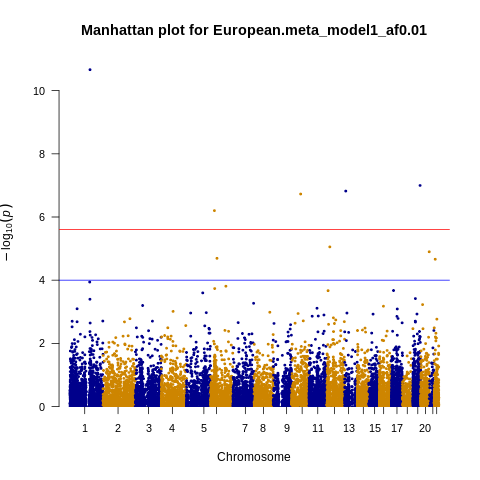

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.qq.png (15.5 KiB):

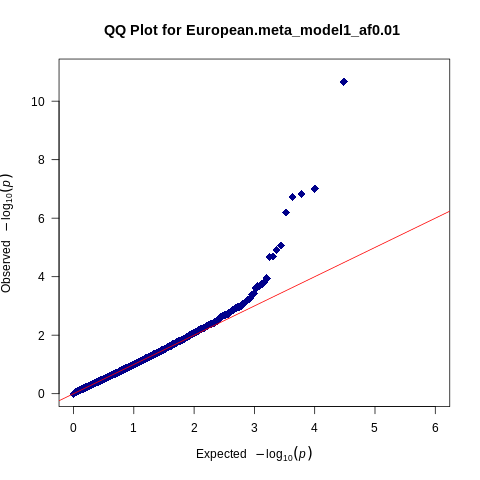

In [26]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af1.manhattan.png

#### model2_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 16926 markers!
## Smallest p-value is 2.17e-11 at marker 'RPRD2'

In [27]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_noapoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9670427

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.694  2.170e-11 ?+         0.0   0.000   
2  VN1R2      NA      NA      11014  5.326  1.002e-07 ?+         0.0   0.000   
3  LNX2       NA      NA      11961  5.246  1.559e-07 -+        69.2   3.247   
4  DDX21      NA      NA      11961  5.148  2.637e-07 -+        81.2   5.316   
5  RNF39      NA      NA      11014  4.982  6.284e-07 ?+         0.0   0.000   
6  DNAJC5     NA      NA      11014  4.465  8.006e-06 ?+         0.0   0.000   
7  LDHB       NA      NA      11961  4.398  1.095e-05 ++         0.0   0.241   
8  GGT1       NA      NA      11961  4.241  2.230e-05 ++         0.0   0.051   
9  PROCA1     NA      NA      11014  3.944  8.000e-05 ?+         0.0   0.000   
10 JAK3       NA      NA      11961  3.865  1.111e-04 ++         0.0   0.601   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  0     1.00000 19   53258412
3  1     0.07156 13   27544917
4  1     0.02113 10   68955189
5  0     1.00000  6   30071035
6  0     1.00000 20   63928321
7  1     0.62350 12   21634355
8  1     0.82090 22   24582751
9  0     1.00000 17   28703530
10 1     0.43830 19   17823797

[1] 16926    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.manhattan.png (51.0 KiB):

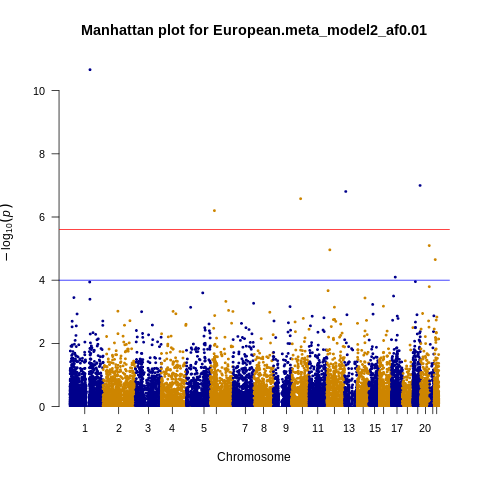

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.qq.png (15.6 KiB):

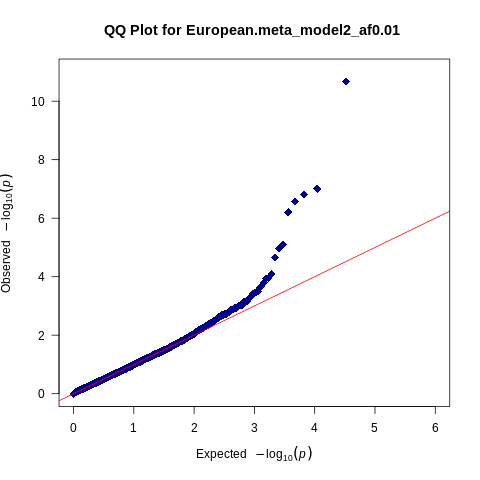

In [29]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af1.manhattan.png

#### model3_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18524 markers!
## Smallest p-value is 2.36e-26 at marker 'WDR89'

In [3]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9759519

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      11961  10.622 2.360e-26 ++        84.0   6.258   
2  ODAPH      NA      NA      11014   6.606 3.945e-11 ?+         0.0   0.000   
3  OR4A16     NA      NA      11961   6.235 4.522e-10 ++        55.1   2.226   
4  PRAMEF1    NA      NA      11961   4.670 3.012e-06 ++         0.0   0.003   
5  DNAJC5     NA      NA      11014   4.363 1.281e-05 ?+         0.0   0.000   
6  OPRL1      NA      NA      11961  -4.361 1.295e-05 --         0.0   0.732   
7  TDG        NA      NA      11961  -4.233 2.307e-05 --         0.0   0.002   
8  LDHB       NA      NA      11961   4.221 2.437e-05 ++         0.0   0.823   
9  JAK3       NA      NA      11961   4.108 3.990e-05 ++         0.0   0.638   
10 ZNF562     NA      NA      11961   3.991 6.590e-05 ++         0.0   0.402   
   HetDf HetPVal CHR POS      
1  1     0.01236 14   63596096
2  0     1.00000  4   75556021
3  1     0.13570 11   55342225
4  1     0.95780  1   12790414
5  0     1.00000 20   63928321
6  1     0.39220 20   64080075
7  1     0.96810 12  103964868
8  1     0.36420 12   21634355
9  1     0.42430 19   17823797
10 1     0.52610 19    9640938

[1] 18524    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.manhattan.png (29.9 KiB):

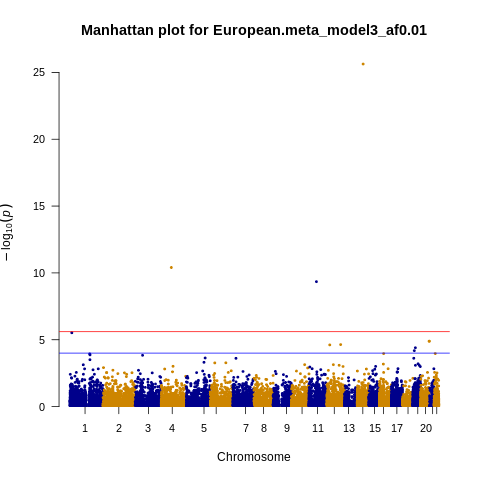

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.qq.png (14.4 KiB):

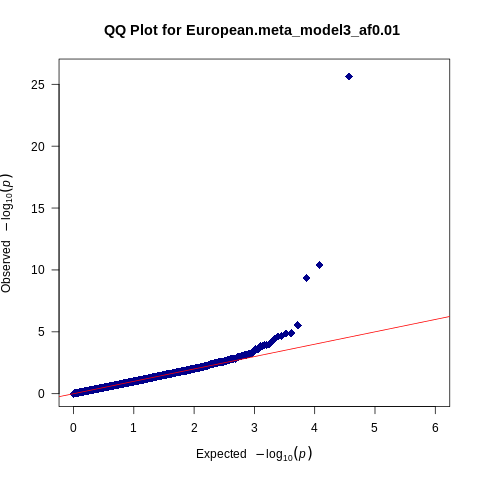

In [31]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af1.manhattan.png

#### model1_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15714 markers!
## Smallest p-value is 2.775e-11 at marker 'RPRD2'

In [32]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.953

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.658  2.775e-11 ?+         0.0   0.000   
2  DDX21      NA      NA      11961  4.998  5.802e-07 -+        86.7   7.518   
3  LNX2       NA      NA      11961  4.975  6.539e-07 -+        67.4   3.069   
4  VN1R2      NA      NA      11014  4.834  1.337e-06 ?+         0.0   0.000   
5  RNF39      NA      NA      11014  4.721  2.342e-06 ?+         0.0   0.000   
6  LDHB       NA      NA      11961  4.652  3.290e-06 ++         0.0   0.165   
7  GGT1       NA      NA      11961  4.348  1.372e-05 ++         0.0   0.211   
8  DNAJC5     NA      NA      11014  4.243  2.202e-05 ?+         0.0   0.000   
9  MMUT       NA      NA      11961  4.039  5.377e-05 ++         0.0   0.005   
10 HESX1      NA      NA      11014  3.816  1.358e-04 ?+         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  1     0.00611 10   68955189
3  1     0.07981 13   27544917
4  0     1.00000 19   53258412
5  0     1.00000  6   30071035
6  1     0.68460 12   21634355
7  1     0.64620 22   24582751
8  0     1.00000 20   63928321
9  1     0.94540  6   49429375
10 0     1.00000  3   57198134

[1] 15714    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.manhattan.png (50.8 KiB):

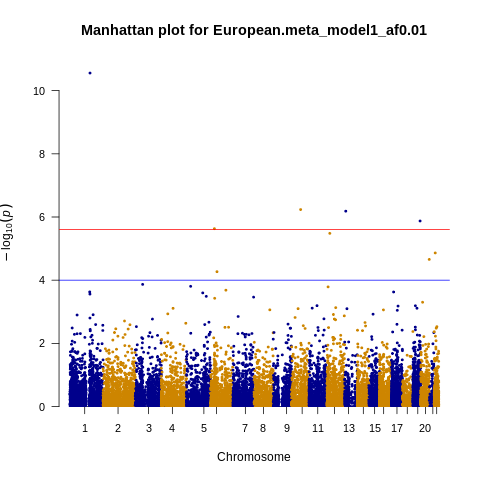

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.qq.png (15.5 KiB):

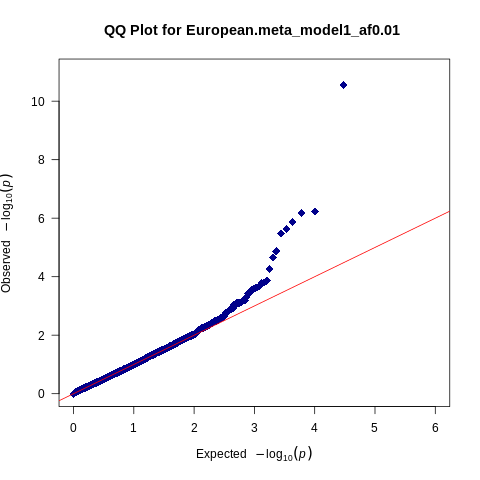

In [33]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af1.manhattan.png

#### model2_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 16927 markers!
## Smallest p-value is 2.775e-11 at marker 'RPRD2'

In [34]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_apoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9442419

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014   6.658 2.775e-11 ?+         0.0   0.000   
2  LNX2       NA      NA      11961   4.963 6.924e-07 -+        67.3   3.057   
3  DDX21      NA      NA      11961   4.934 8.039e-07 -+        86.5   7.416   
4  VN1R2      NA      NA      11014   4.834 1.337e-06 ?+         0.0   0.000   
5  RNF39      NA      NA      11014   4.721 2.342e-06 ?+         0.0   0.000   
6  LDHB       NA      NA      11961   4.613 3.973e-06 ++         0.0   0.174   
7  GGT1       NA      NA      11961   4.399 1.085e-05 ++         0.0   0.082   
8  DNAJC5     NA      NA      11014   4.324 1.535e-05 ?+         0.0   0.000   
9  PDZD2      NA      NA      11961  -3.865 1.112e-04 --         0.0   0.006   
10 PROCA1     NA      NA      11014   3.826 1.301e-04 ?+         0.0   0.000   
   HetDf HetPVal  CHR POS      
1  0     1.000000  1  150364699
2  1     0.080370 13   27544917
3  1     0.006464 10   68955189
4  0     1.000000 19   53258412
5  0     1.000000  6   30071035
6  1     0.676300 12   21634355
7  1     0.774200 22   24582751
8  0     1.000000 20   63928321
9  1     0.938400  5   31638161
10 0     1.000000 17   28703530

[1] 16927    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.manhattan.png (51.1 KiB):

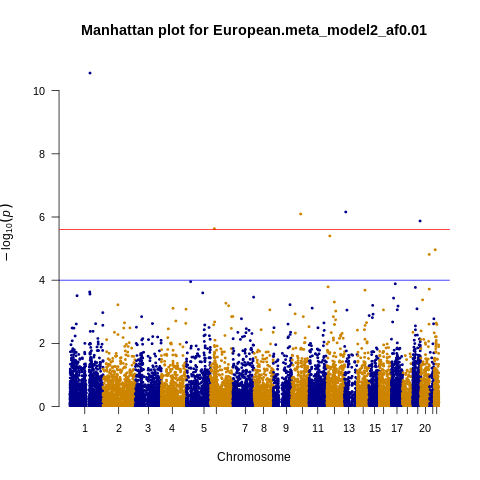

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.qq.png (15.6 KiB):

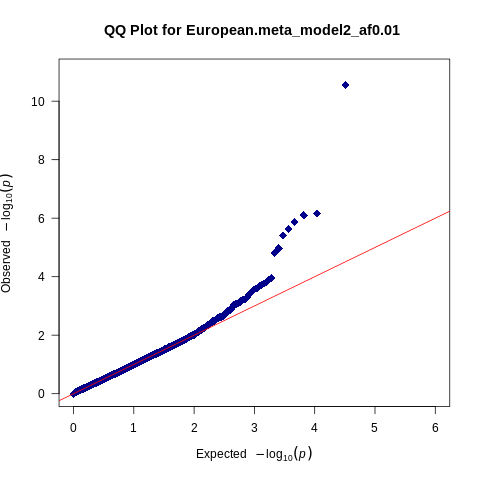

In [35]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af1.manhattan.png

#### model3_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18524 markers!
## Smallest p-value is 5.247e-25 at marker 'WDR89'

In [36]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9732043

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      11961  10.328 5.247e-25 ++        85.8   7.050   
2  ODAPH      NA      NA      11014   6.766 1.321e-11 ?+         0.0   0.000   
3  OR4A16     NA      NA      11961   6.338 2.335e-10 ++         0.0   0.891   
4  PRAMEF1    NA      NA      11961   4.621 3.821e-06 ++         0.0   0.011   
5  OPRL1      NA      NA      11961  -4.454 8.416e-06 --         0.0   0.209   
6  LDHB       NA      NA      11961   4.351 1.356e-05 ++         0.0   0.093   
7  DNAJC5     NA      NA      11014   4.282 1.850e-05 ?+         0.0   0.000   
8  TDG        NA      NA      11961  -4.133 3.574e-05 --         0.0   0.035   
9  GGT1       NA      NA      11961   4.100 4.139e-05 ++         0.0   0.500   
10 JAK3       NA      NA      11961   4.044 5.263e-05 ++         0.0   0.231   
   HetDf HetPVal  CHR POS      
1  1     0.007928 14   63596096
2  0     1.000000  4   75556021
3  1     0.345200 11   55342225
4  1     0.916700  1   12790414
5  1     0.647900 20   64080075
6  1     0.760300 12   21634355
7  0     1.000000 20   63928321
8  1     0.851200 12  103964868
9  1     0.479600 22   24582751
10 1     0.630700 19   17823797

[1] 18524    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.manhattan.png (31.0 KiB):

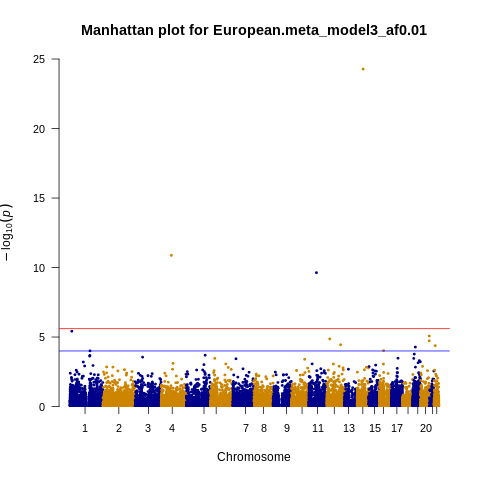

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.qq.png (14.3 KiB):

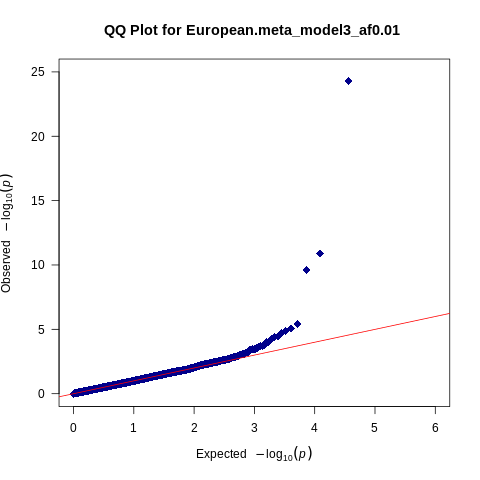

In [37]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af1.manhattan.png

#### model1_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15938 markers!
## Smallest p-value is 2.17e-11 at marker 'RPRD2'

In [40]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9695496

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.694  2.170e-11 ?+         0.0   0.000   
2  VN1R2      NA      NA      11014  5.326  1.002e-07 ?+         0.0   0.000   
3  LNX2       NA      NA      11961  5.251  1.511e-07 -+        69.3   3.253   
4  RNF39      NA      NA      11014  4.982  6.284e-07 ?+         0.0   0.000   
5  LDHB       NA      NA      11961  4.444  8.829e-06 ++         0.0   0.255   
6  DNAJC5     NA      NA      11014  4.367  1.260e-05 ?+         0.0   0.000   
7  MMUT       NA      NA      11961  4.261  2.034e-05 ++         0.0   0.637   
8  NRXN3      NA      NA      11961  4.079  4.529e-05 ++         0.0   0.643   
9  GGT1       NA      NA      11961  3.904  9.448e-05 ++         0.0   0.409   
10 PDE4DIPP1  NA      NA        947  3.858  1.144e-04 +?         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.0000   1  150364699
2  0     1.0000  19   53258412
3  1     0.0713  13   27544917
4  0     1.0000   6   30071035
5  1     0.6139  12   21634355
6  0     1.0000  20   63928321
7  1     0.4248   6   49429375
8  1     0.4226  14   78169387
9  1     0.5227  22   24582751
10 0     1.0000   1  148048327

[1] 15938    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.manhattan.png (51.4 KiB):

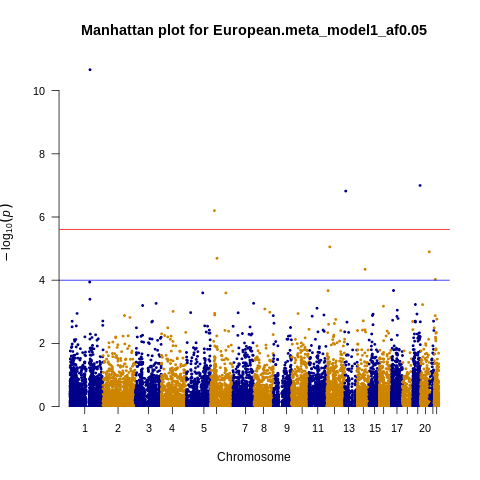

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.qq.png (15.7 KiB):

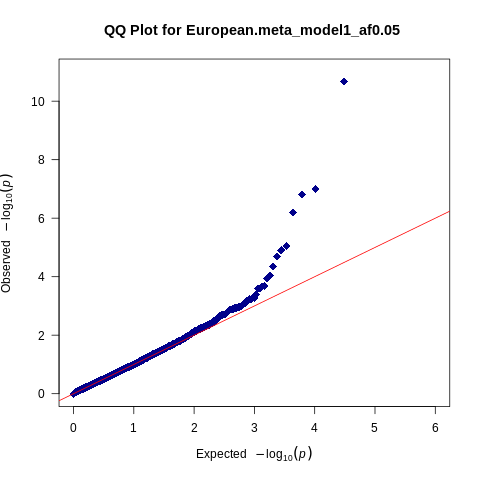

In [41]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_sex_af5.manhattan.png

#### model2_sex-af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 17012 markers!
## Smallest p-value is 2.17e-11 at marker 'RPRD2'

In [43]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_noapoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9634046

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.694  2.170e-11 ?+         0.0   0.000   
2  VN1R2      NA      NA      11014  5.326  1.002e-07 ?+         0.0   0.000   
3  LNX2       NA      NA      11961  5.246  1.559e-07 -+        69.2   3.247   
4  RNF39      NA      NA      11014  4.982  6.284e-07 ?+         0.0   0.000   
5  DNAJC5     NA      NA      11014  4.465  8.006e-06 ?+         0.0   0.000   
6  LDHB       NA      NA      11961  4.398  1.095e-05 ++         0.0   0.241   
7  NRXN3      NA      NA      11961  4.062  4.862e-05 ++         0.0   0.700   
8  PROCA1     NA      NA      11014  3.944  8.000e-05 ?+         0.0   0.000   
9  GGT1       NA      NA      11961  3.905  9.417e-05 ++         0.0   0.409   
10 JAK3       NA      NA      11961  3.865  1.111e-04 ++         0.0   0.601   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  0     1.00000 19   53258412
3  1     0.07156 13   27544917
4  0     1.00000  6   30071035
5  0     1.00000 20   63928321
6  1     0.62350 12   21634355
7  1     0.40290 14   78169387
8  0     1.00000 17   28703530
9  1     0.52250 22   24582751
10 1     0.43830 19   17823797

[1] 17012    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.manhattan.png (51.5 KiB):

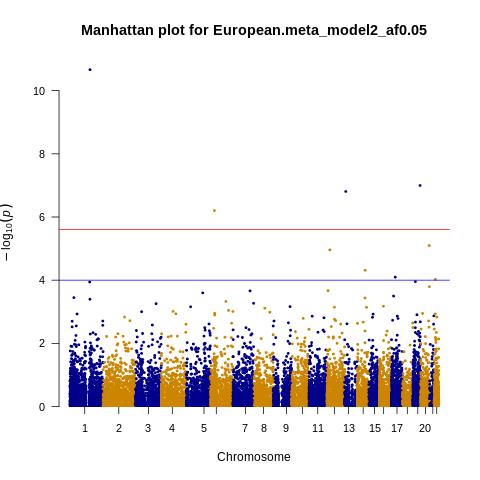

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.qq.png (15.7 KiB):

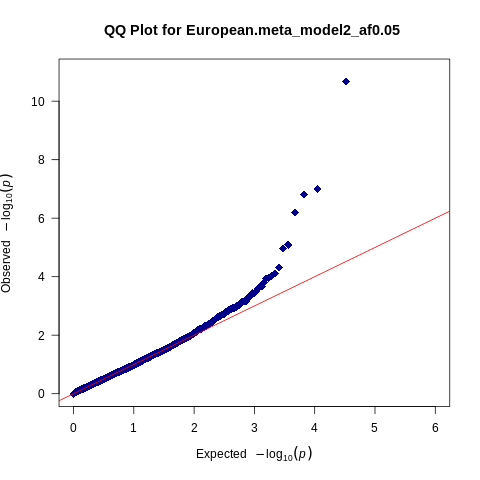

In [44]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_sex_af5.manhattan.png

#### model3_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18587 markers!
## Smallest p-value is 2.36e-26 at marker 'WDR89'

In [45]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9814639

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      11961  10.622 2.360e-26 ++        84.0   6.258   
2  OR4A16     NA      NA      11961   5.257 1.466e-07 ++        35.1   1.541   
3  DNAJC5     NA      NA      11014   4.363 1.281e-05 ?+         0.0   0.000   
4  LDHB       NA      NA      11961   4.221 2.437e-05 ++         0.0   0.823   
5  NRXN3      NA      NA      11961   4.005 6.192e-05 ++         0.0   0.850   
6  ZNF562     NA      NA      11961   3.991 6.590e-05 ++         0.0   0.402   
7  RNPEPL1    NA      NA      11961   3.976 7.005e-05 -+        73.5   3.778   
8  PDE4DIPP1  NA      NA        947   3.858 1.144e-04 +?         0.0   0.000   
9  RPRD2      NA      NA      11961   3.816 1.359e-04 ++         0.0   0.373   
10 HLA-DQA2   NA      NA      11961   3.813 1.372e-04 ++         0.0   0.157   
   HetDf HetPVal CHR POS      
1  1     0.01236 14   63596096
2  1     0.21450 11   55342225
3  0     1.00000 20   63928321
4  1     0.36420 12   21634355
5  1     0.35640 14   78169387
6  1     0.52610 19    9640938
7  1     0.05194  2  240567539
8  0     1.00000  1  148048327
9  1     0.54140  1  150363121
10 1     0.69200  6   32740437

[1] 18587    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.manhattan.png (30.2 KiB):

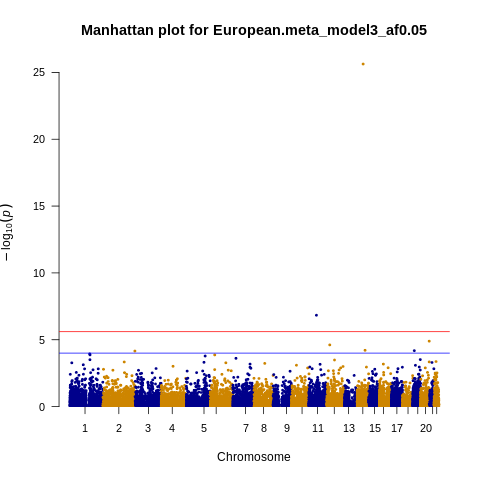

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.qq.png (14.5 KiB):

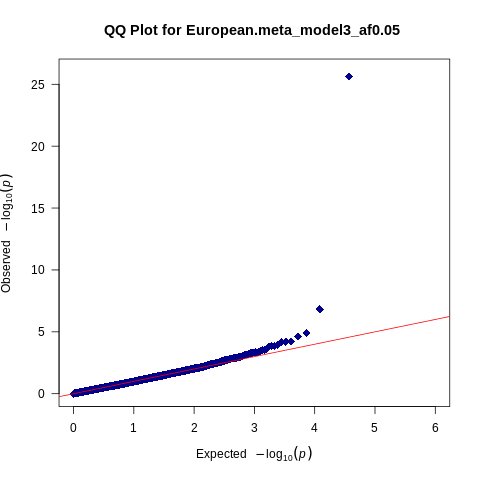

In [46]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_sex_af5.manhattan.png

#### model1_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

### Completed meta-analysis for 15939 markers!
## Smallest p-value is 2.775e-11 at marker 'RPRD2'

In [2]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_apoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9505239

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.658  2.775e-11 ?+         0.0   0.000   
2  LNX2       NA      NA      11961  4.975  6.539e-07 -+        67.4   3.069   
3  VN1R2      NA      NA      11014  4.834  1.337e-06 ?+         0.0   0.000   
4  RNF39      NA      NA      11014  4.721  2.342e-06 ?+         0.0   0.000   
5  LDHB       NA      NA      11961  4.652  3.290e-06 ++         0.0   0.165   
6  DNAJC5     NA      NA      11014  4.243  2.202e-05 ?+         0.0   0.000   
7  GGT1       NA      NA      11961  4.043  5.276e-05 ++         0.0   0.659   
8  MMUT       NA      NA      11961  4.039  5.377e-05 ++         0.0   0.005   
9  NRXN3      NA      NA      11961  3.977  6.991e-05 0+        26.5   1.360   
10 HESX1      NA      NA      11014  3.816  1.358e-04 ?+         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  1     0.07981 13   27544917
3  0     1.00000 19   53258412
4  0     1.00000  6   30071035
5  1     0.68460 12   21634355
6  0     1.00000 20   63928321
7  1     0.41700 22   24582751
8  1     0.94540  6   49429375
9  1     0.24360 14   78169387
10 0     1.00000  3   57198134

[1] 15939    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.manhattan.png (51.1 KiB):

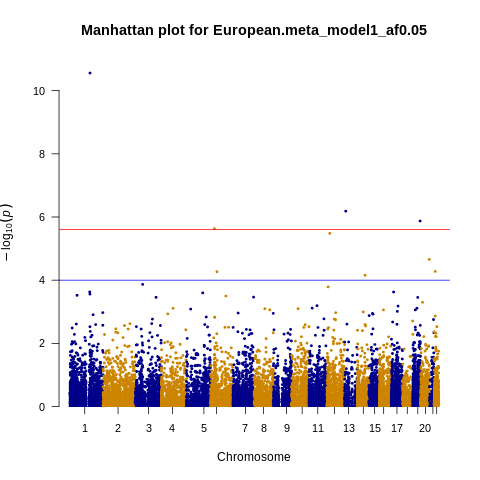

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.qq.png (15.6 KiB):

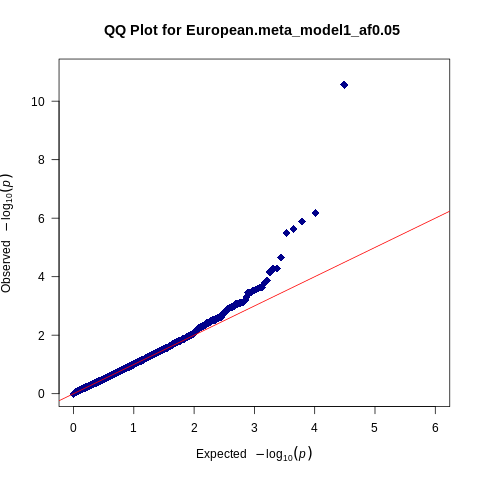

In [4]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model1_apoe_af5.manhattan.png

#### model2_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 17013 markers!
## Smallest p-value is 2.775e-11 at marker 'RPRD2'

In [9]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model2_apoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9469305

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RPRD2      NA      NA      11014  6.658  2.775e-11 ?+         0.0   0.000   
2  LNX2       NA      NA      11961  4.963  6.924e-07 -+        67.3   3.057   
3  VN1R2      NA      NA      11014  4.834  1.337e-06 ?+         0.0   0.000   
4  RNF39      NA      NA      11014  4.721  2.342e-06 ?+         0.0   0.000   
5  LDHB       NA      NA      11961  4.613  3.973e-06 ++         0.0   0.174   
6  DNAJC5     NA      NA      11014  4.324  1.535e-05 ?+         0.0   0.000   
7  GGT1       NA      NA      11961  4.049  5.148e-05 ++         0.0   0.661   
8  NRXN3      NA      NA      11961  4.024  5.726e-05 ++         0.0   0.967   
9  PROCA1     NA      NA      11014  3.826  1.301e-04 ?+         0.0   0.000   
10 CLEC4E     NA      NA      11014  3.771  1.629e-04 ?+         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.00000  1  150364699
2  1     0.08037 13   27544917
3  0     1.00000 19   53258412
4  0     1.00000  6   30071035
5  1     0.67630 12   21634355
6  0     1.00000 20   63928321
7  1     0.41600 22   24582751
8  1     0.32530 14   78169387
9  0     1.00000 17   28703530
10 0     1.00000 12    8534614

[1] 17013    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.manhattan.png (51.3 KiB):

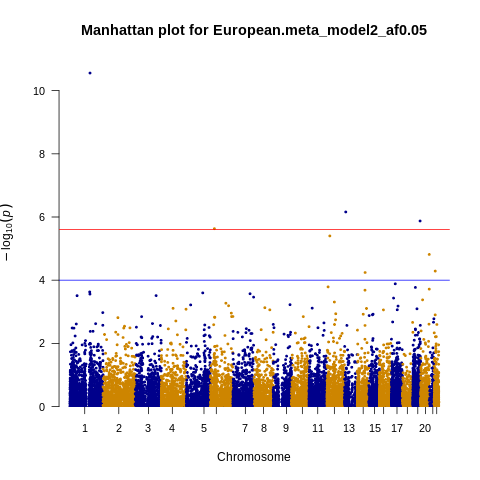

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.qq.png (15.7 KiB):

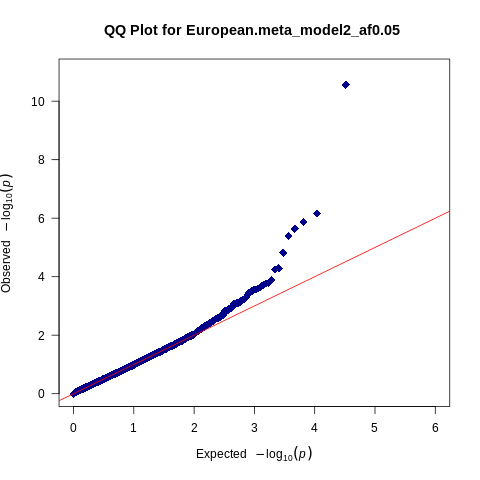

In [6]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model2_apoe_af5.manhattan.png

#### model3_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 18587 markers!
## Smallest p-value is 5.247e-25 at marker 'WDR89'

In [10]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_apoe_af5_META2.TXT', header = T, sep = '\t')
eur = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
eu = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(eur, eu, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for European.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for European.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9745774

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  WDR89      NA      NA      11961  10.328 5.247e-25 ++        85.8   7.050   
2  OR4A16     NA      NA      11961   5.385 7.230e-08 ++         0.0   0.498   
3  LDHB       NA      NA      11961   4.351 1.356e-05 ++         0.0   0.093   
4  DNAJC5     NA      NA      11014   4.282 1.850e-05 ?+         0.0   0.000   
5  RNPEPL1    NA      NA      11961   3.997 6.415e-05 -+        78.3   4.609   
6  NRXN3      NA      NA      11961   3.994 6.489e-05 ++         0.0   0.993   
7  PCDHGA5    NA      NA      11961  -3.965 7.345e-05 --         0.0   0.003   
8  RPRD2      NA      NA      11961   3.895 9.800e-05 ++         0.0   0.335   
9  KIF5A      NA      NA      11961  -3.893 9.895e-05 --         0.0   0.942   
10 TDG        NA      NA      11961  -3.881 1.041e-04 --         0.0   0.002   
   HetDf HetPVal  CHR POS      
1  1     0.007928 14   63596096
2  1     0.480500 11   55342225
3  1     0.760300 12   21634355
4  0     1.000000 20   63928321
5  1     0.031810  2  240567539
6  1     0.318900 14   78169387
7  1     0.953000  5  141364360
8  1     0.562900  1  150363121
9  1     0.331800 12   57549106
10 1     0.966900 12  103964868

[1] 18587    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.manhattan.png (30.6 KiB):

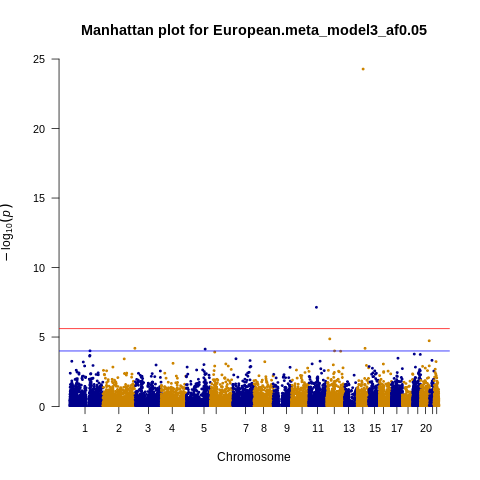

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.qq.png (14.4 KiB):

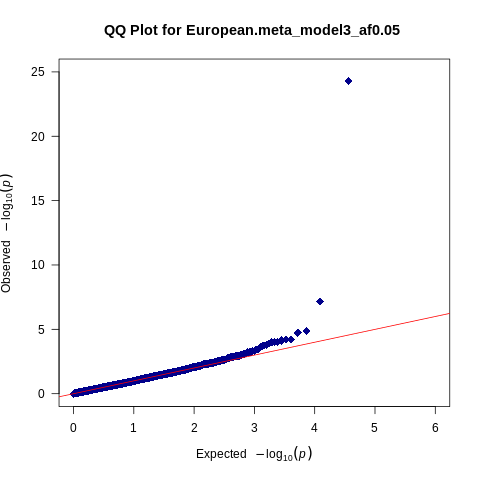

In [11]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/European_model3_apoe_af5.manhattan.png

### African

#### model1_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 14316 markers!
## Smallest p-value is 2.653e-05 at marker 'UBR5'

In [13]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.121233

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  UBR5       NA      NA      3937    4.201 2.653e-05 ++        77.5   4.437   
2  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
3  LFNG       NA      NA      3937   -3.682 2.311e-04 --         0.0   0.000   
4  SUDS3      NA      NA      3824   -3.573 3.534e-04 ?-         0.0   0.000   
5  TUBGCP3    NA      NA      3824    3.559 3.726e-04 ?+         0.0   0.000   
6  EPRS       NA      NA      3937    3.554 3.796e-04 ++         0.0   0.816   
7  ADAMTS4    NA      NA      3824   -3.494 4.757e-04 ?-         0.0   0.000   
8  BAK1       NA      NA      3824   -3.481 5.000e-04 ?-         0.0   0.000   
9  ORM1       NA      NA      3824   -3.417 6.340e-04 ?-         0.0   0.000   
10 CTSW       NA      NA      3824   -3.403 6.658e-04 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  1     0.03517  8  102252281
2  1     0.25100  6   30006148
3  1     0.98310  7    2511538
4  0     1.00000 12  118380067
5  0     1.00000 13  112485981
6  1     0.36640  1  219967638
7  0     1.00000  1  161191193
8  0     1.00000  6   33573750
9  0     1.00000  9  114323204
10 0     1.00000 11   65879788

[1] 14316    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.manhattan.png (87.8 KiB):

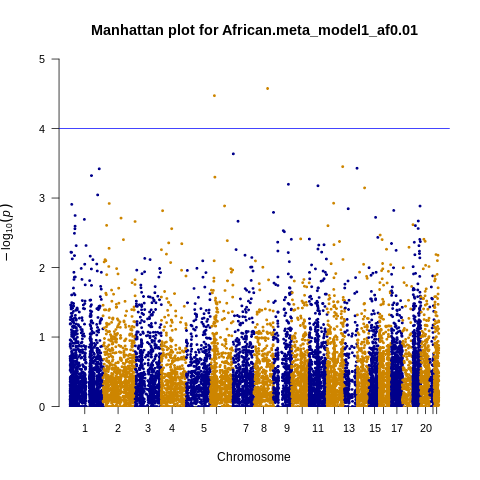

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.qq.png (16.5 KiB):

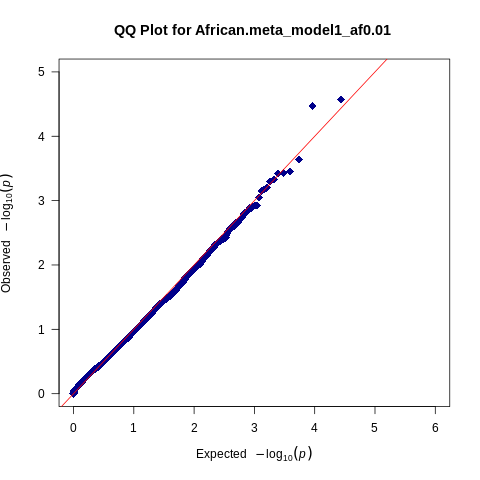

In [14]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af1.manhattan.png

#### model2_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15484 markers!
## Smallest p-value is 2.558e-05 at marker 'UBR5'

In [15]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_noapoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.077208

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  UBR5       NA      NA      3937    4.210 2.558e-05 ++        77.4   4.431   
2  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
3  SUDS3      NA      NA      3824   -3.573 3.534e-04 ?-         0.0   0.000   
4  TUBGCP3    NA      NA      3824    3.559 3.726e-04 ?+         0.0   0.000   
5  PCDHB14    NA      NA      3824   -3.520 4.308e-04 ?-         0.0   0.000   
6  EPRS       NA      NA      3937    3.486 4.909e-04 ++         0.0   0.837   
7  BAK1       NA      NA      3824   -3.481 5.000e-04 ?-         0.0   0.000   
8  ADAMTS4    NA      NA      3824   -3.428 6.075e-04 ?-         0.0   0.000   
9  ORM1       NA      NA      3824   -3.417 6.340e-04 ?-         0.0   0.000   
10 PCSK5      NA      NA      3937    3.380 7.241e-04 ++         0.0   0.016   
   HetDf HetPVal CHR POS      
1  1     0.0353   8  102252281
2  1     0.2510   6   30006148
3  0     1.0000  12  118380067
4  0     1.0000  13  112485981
5  0     1.0000   5  141223500
6  1     0.3602   1  219967638
7  0     1.0000   6   33573750
8  0     1.0000   1  161191193
9  0     1.0000   9  114323204
10 1     0.9009   9   75889687

[1] 15484    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.manhattan.png (89.1 KiB):

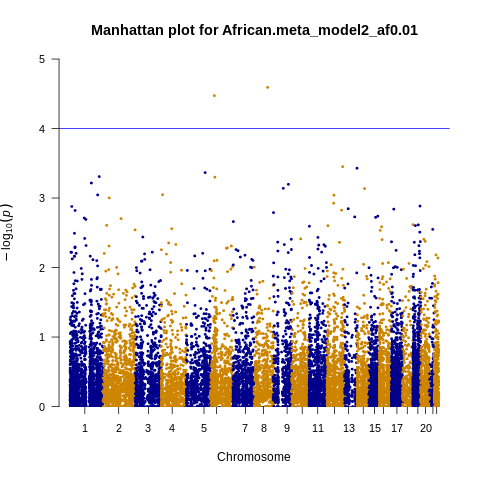

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.qq.png (16.6 KiB):

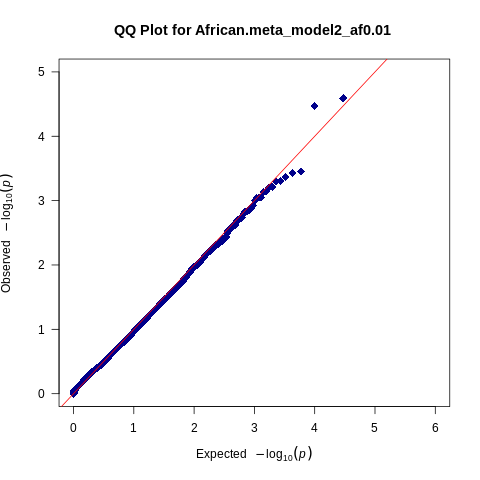

In [16]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af1.manhattan.png

#### model3_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 17884 markers!
## Smallest p-value is 6.324e-06 at marker 'BHMT'

In [17]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9704623

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  BHMT       NA      NA      3824   -4.515 6.324e-06 ?-         0.0   0.000   
2  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
3  RBFA       NA      NA      3937   -3.955 7.651e-05 --         0.0   0.064   
4  ANXA11     NA      NA      3937   -3.757 1.716e-04 0-         0.0   0.417   
5  NADK2      NA      NA      3937   -3.671 2.416e-04 --         0.0   0.166   
6  IZUMO1     NA      NA      3937   -3.533 4.101e-04 +-         0.0   0.982   
7  ORM1       NA      NA      3937    3.500 4.645e-04 -+         2.9   1.030   
8  UBR5       NA      NA      3937    3.488 4.866e-04 ++        79.9   4.968   
9  TUBGCP3    NA      NA      3937    3.434 5.951e-04 ++         0.0   0.080   
10 SLC11A2    NA      NA      3824    3.375 7.384e-04 ?+         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.00000  5   79111781
2  1     0.25100  6   30006148
3  1     0.80000 18   80034457
4  1     0.51830 10   80149930
5  1     0.68340  5   36191650
6  1     0.32160 19   48740891
7  1     0.31020  9  114322025
8  1     0.02582  8  102252281
9  1     0.77770 13  112484032
10 0     1.00000 12   50988207

[1] 17884    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.manhattan.png (78.4 KiB):

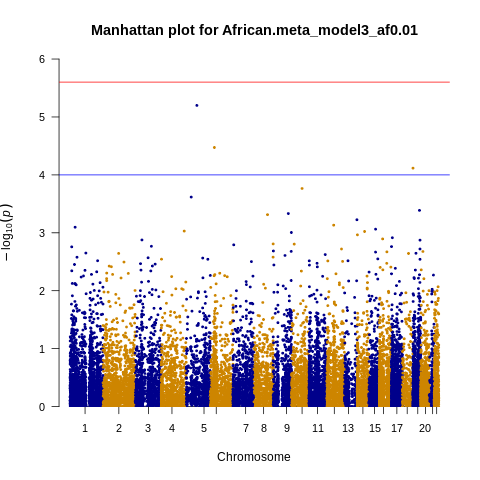

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.qq.png (16.4 KiB):

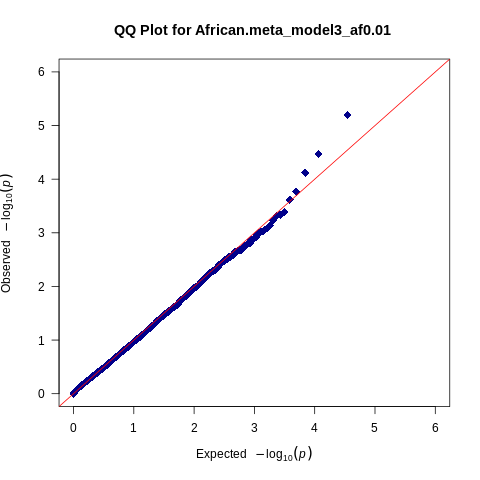

In [18]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af1.manhattan.png

#### model1_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
# Completed meta-analysis for 14316 markers!
## Smallest p-value is 7.719e-05 at marker 'UBR5'

In [19]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.022104

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  UBR5       NA      NA      3937    3.953 7.719e-05 ++        75.3   4.041   
2  ADAMTS4    NA      NA      3824   -3.910 9.245e-05 ?-         0.0   0.000   
3  SUDS3      NA      NA      3824   -3.885 1.023e-04 ?-         0.0   0.000   
4  BAK1       NA      NA      3824   -3.752 1.753e-04 ?-         0.0   0.000   
5  TUBGCP3    NA      NA      3824    3.689 2.253e-04 ?+         0.0   0.000   
6  SMARCA2    NA      NA      3937   -3.667 2.453e-04 --         0.0   0.112   
7  LFNG       NA      NA      3937   -3.623 2.917e-04 --         0.0   0.008   
8  CD34       NA      NA      3824   -3.618 2.970e-04 ?-         0.0   0.000   
9  HLA-J      NA      NA      3937   -3.481 4.992e-04 +-         0.0   0.908   
10 GALNT13    NA      NA      3824   -3.436 5.905e-04 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  1     0.04441  8  102252281
2  0     1.00000  1  161191193
3  0     1.00000 12  118380067
4  0     1.00000  6   33573750
5  0     1.00000 13  112485981
6  1     0.73820  9    2014365
7  1     0.92890  7    2511538
8  0     1.00000  1  207887677
9  1     0.34050  6   30006148
10 0     1.00000  2  153944445

[1] 14316    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.manhattan.png (88.4 KiB):

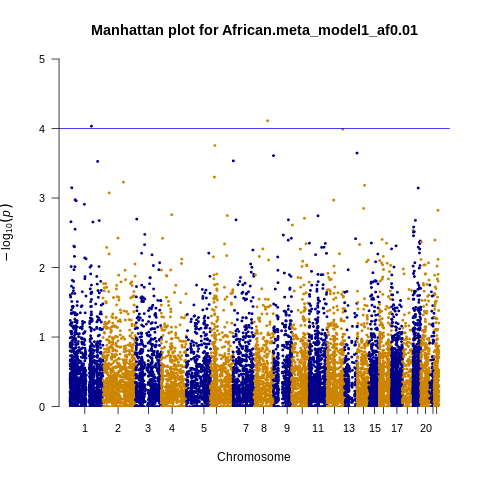

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.qq.png (16.6 KiB):

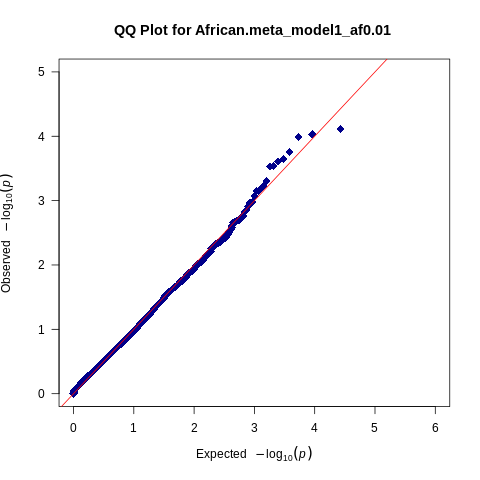

In [20]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af1.manhattan.png

#### model2_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15485 markers!
## Smallest p-value is 7.243e-05 at marker 'UBR5'

In [21]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_apoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.006547

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  UBR5       NA      NA      3937    3.968 7.243e-05 ++        75.2   4.030   
2  KRT82      NA      NA      3937   -3.906 9.374e-05 --         0.0   0.000   
3  SUDS3      NA      NA      3824   -3.885 1.023e-04 ?-         0.0   0.000   
4  ADAMTS4    NA      NA      3824   -3.856 1.154e-04 ?-         0.0   0.000   
5  BAK1       NA      NA      3824   -3.752 1.753e-04 ?-         0.0   0.000   
6  TUBGCP3    NA      NA      3824    3.689 2.253e-04 ?+         0.0   0.000   
7  SMARCA2    NA      NA      3937   -3.668 2.447e-04 --         0.0   0.112   
8  CD34       NA      NA      3824   -3.618 2.970e-04 ?-         0.0   0.000   
9  HLA-J      NA      NA      3937   -3.481 4.992e-04 +-         0.0   0.908   
10 AREL1      NA      NA      3824   -3.410 6.488e-04 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  1     0.04469  8  102252281
2  1     0.98970 12   52392987
3  0     1.00000 12  118380067
4  0     1.00000  1  161191193
5  0     1.00000  6   33573750
6  0     1.00000 13  112485981
7  1     0.73820  9    2014365
8  0     1.00000  1  207887677
9  1     0.34050  6   30006148
10 0     1.00000 14   74663707

[1] 15485    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.manhattan.png (89.1 KiB):

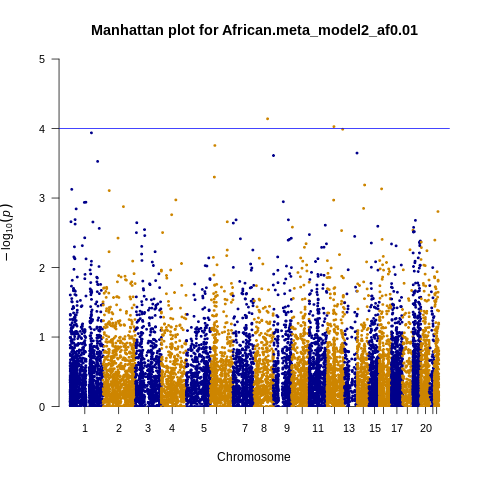

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.qq.png (16.8 KiB):

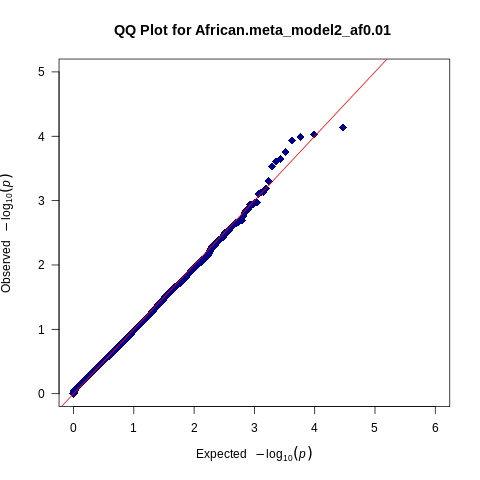

In [22]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af1.manhattan.png

#### model3_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 17884 markers!
## Smallest p-value is 9.041e-05 at marker 'RBFA

In [23]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9695496

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  RBFA       NA      NA      3937   -3.915 9.041e-05 --        0.0    0.015   
2  NADK2      NA      NA      3937   -3.777 1.586e-04 --        0.0    0.207   
3  BHMT       NA      NA      3824   -3.692 2.225e-04 ?-        0.0    0.000   
4  TUBGCP3    NA      NA      3937    3.628 2.859e-04 -+        6.2    1.066   
5  SMARCA2    NA      NA      3937   -3.589 3.319e-04 +-        0.0    0.824   
6  RNASEK     NA      NA      3824   -3.524 4.252e-04 ?-        0.0    0.000   
7  HLA-J      NA      NA      3937   -3.481 4.992e-04 +-        0.0    0.908   
8  FAM166A    NA      NA      3824   -3.418 6.304e-04 ?-        0.0    0.000   
9  FNDC5      NA      NA      3824   -3.364 7.691e-04 ?-        0.0    0.000   
10 SYNJ1      NA      NA      3937   -3.361 7.767e-04 0-        0.0    0.334   
   HetDf HetPVal CHR POS      
1  1     0.9013  18   80034457
2  1     0.6488   5   36191650
3  0     1.0000   5   79111781
4  1     0.3019  13  112484032
5  1     0.3641   9    2014365
6  0     1.0000  17    7012603
7  1     0.3405   6   30006148
8  0     1.0000   9  137243701
9  0     1.0000   1   32863634
10 1     0.5634  21   32627788

[1] 17884    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.manhattan.png (90.8 KiB):

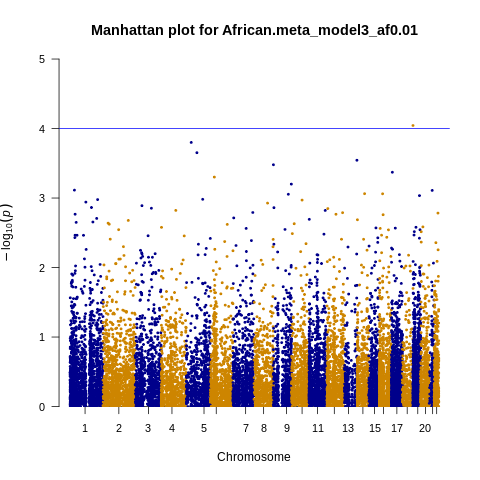

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.qq.png (16.7 KiB):

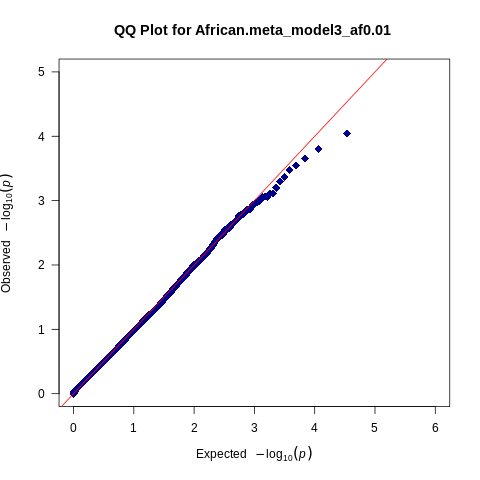

In [25]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af1.manhattan.png

#### model1_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 14677 markers!
## Smallest p-value is 3.365e-05 at marker 'HLA-J'

In [26]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_noapoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.076223

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
2  UBR5       NA      NA      3937    3.579 3.445e-04 ++        51.1   2.046   
3  TUBGCP3    NA      NA      3824    3.559 3.726e-04 ?+         0.0   0.000   
4  BAK1       NA      NA      3824   -3.481 5.000e-04 ?-         0.0   0.000   
5  PRKCB      NA      NA      3937   -3.450 5.616e-04 --         0.0   0.036   
6  CTSW       NA      NA      3824   -3.403 6.658e-04 ?-         0.0   0.000   
7  CD34       NA      NA      3824   -3.320 9.013e-04 ?-         0.0   0.000   
8  SLC5A11    NA      NA      3937   -3.273 1.064e-03 --         8.4   1.092   
9  SERPINB2   NA      NA      3824   -3.258 1.120e-03 ?-         0.0   0.000   
10 AADACL4    NA      NA      3824   -3.231 1.232e-03 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  1     0.2510   6   30006148
2  1     0.1526   8  102252281
3  0     1.0000  13  112485981
4  0     1.0000   6   33573750
5  1     0.8488  16   23835066
6  0     1.0000  11   65879788
7  0     1.0000   1  207887677
8  1     0.2960  16   24844887
9  0     1.0000  18   63891383
10 0     1.0000   1   12644526

[1] 14677    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.manhattan.png (88.3 KiB):

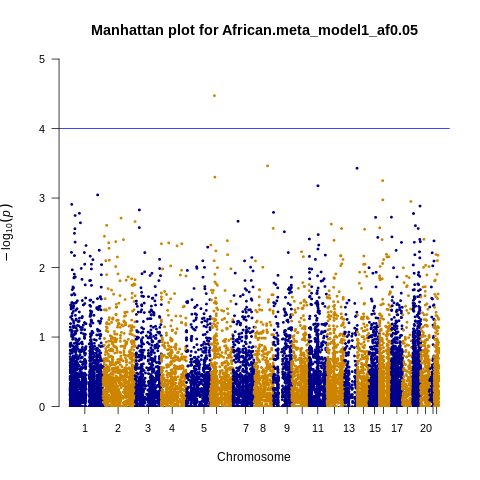

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.qq.png (16.6 KiB):

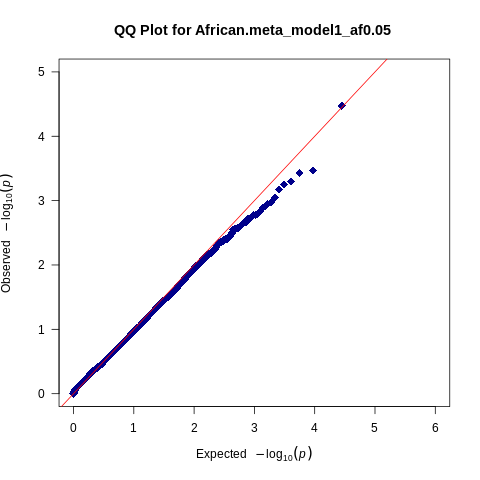

In [27]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_sex_af5.manhattan.png

#### model2_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15779 markers!
## Smallest p-value is 3.365e-05 at marker 'HLA-J'

In [28]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_noapoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.058602

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
2  UBR5       NA      NA      3937    3.611 3.044e-04 ++        50.7   2.030   
3  TUBGCP3    NA      NA      3824    3.559 3.726e-04 ?+         0.0   0.000   
4  PRKCB      NA      NA      3937   -3.490 4.829e-04 --         0.0   0.034   
5  BAK1       NA      NA      3824   -3.481 5.000e-04 ?-         0.0   0.000   
6  CLDN8      NA      NA      3824   -3.383 7.180e-04 ?-         0.0   0.000   
7  SF3A3      NA      NA      3937    3.323 8.899e-04 ++         0.0   0.364   
8  CD34       NA      NA      3824   -3.320 9.013e-04 ?-         0.0   0.000   
9  SLC5A11    NA      NA      3937   -3.290 1.003e-03 --         7.9   1.086   
10 MYO1H      NA      NA      3937   -3.285 1.021e-03 --         0.0   0.163   
   HetDf HetPVal CHR POS      
1  1     0.2510   6   30006148
2  1     0.1542   8  102252281
3  0     1.0000  13  112485981
4  1     0.8543  16   23835066
5  0     1.0000   6   33573750
6  0     1.0000  21   30215215
7  1     0.5461   1   37956044
8  0     1.0000   1  207887677
9  1     0.2973  16   24844887
10 1     0.6860  12  109387733

[1] 15779    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.manhattan.png (89.1 KiB):

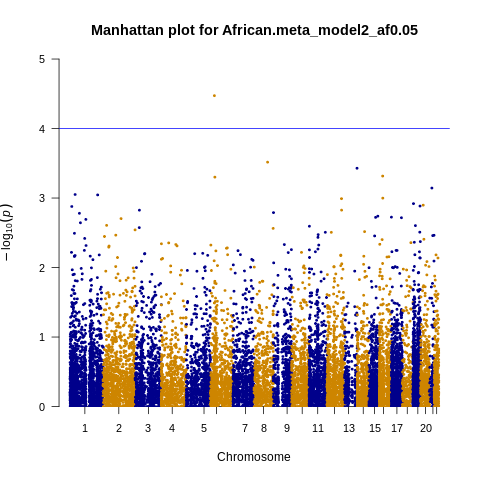

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.qq.png (16.6 KiB):

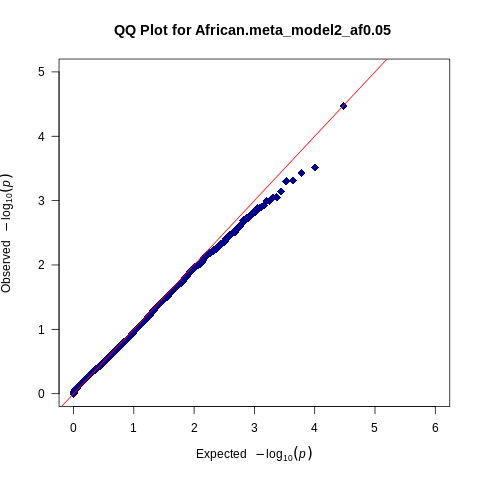

In [29]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_sex_af5.manhattan.png

#### model3_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18075 markers!
## Smallest p-value is 1.677e-05 at marker 'NECTIN2'

In [32]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_noapoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9672704

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  NECTIN2    NA      NA      3937   -4.304 1.677e-05 --         0.0   0.006   
2  HLA-J      NA      NA      3937   -4.147 3.365e-05 +-        24.1   1.318   
3  NFE2L3     NA      NA      3937   -3.827 1.297e-04 +-        43.4   1.766   
4  ZNF468     NA      NA      3937   -3.726 1.946e-04 0-         0.0   0.410   
5  RBFA       NA      NA      3937   -3.623 2.911e-04 --         0.0   0.288   
6  SEC23B     NA      NA      3937   -3.554 3.800e-04 --         0.0   0.005   
7  SF3A3      NA      NA      3937    3.500 4.650e-04 ++         0.0   0.329   
8  C12orf49   NA      NA      3937    3.458 5.440e-04 ++         0.0   0.970   
9  PRKCB      NA      NA      3937   -3.428 6.076e-04 --         0.0   0.038   
10 MUC6       NA      NA      3937   -3.425 6.138e-04 +-        69.4   3.264   
   HetDf HetPVal CHR POS      
1  1     0.94060 19   44845470
2  1     0.25100  6   30006148
3  1     0.18390  7   26151199
4  1     0.52180 19   52837040
5  1     0.59160 18   80034457
6  1     0.94090 20   18506499
7  1     0.56650  1   37956044
8  1     0.32460 12  116709205
9  1     0.84590 16   23835066
10 1     0.07081 11    1012837

[1] 18075    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.manhattan.png (91.2 KiB):

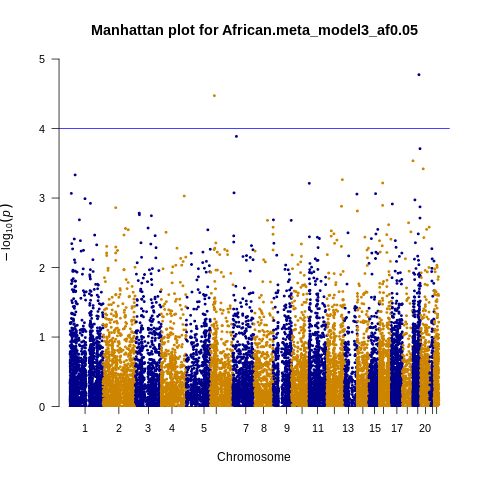

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.qq.png (16.8 KiB):

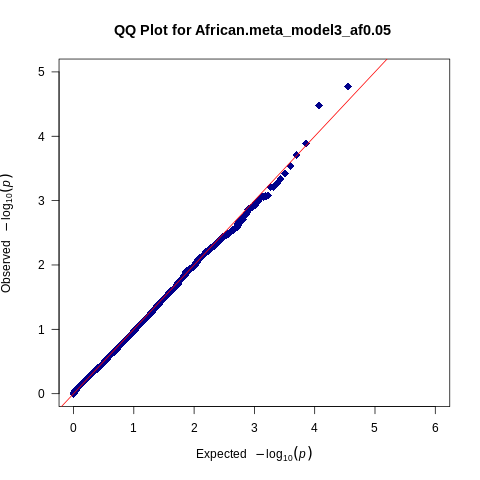

In [33]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_sex_af5.manhattan.png

#### model1_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

# Completed meta-analysis for 14677 markers!
## Smallest p-value is 0.0001753 at marker 'BAK1'

In [34]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_apoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9930195

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  BAK1       NA      NA      3824   -3.752 0.0001753 ?-         0.0   0.000   
2  TUBGCP3    NA      NA      3824    3.689 0.0002253 ?+         0.0   0.000   
3  SMARCA2    NA      NA      3937   -3.667 0.0002453 --         0.0   0.112   
4  CD34       NA      NA      3824   -3.618 0.0002970 ?-         0.0   0.000   
5  DOC2B      NA      NA      3824   -3.497 0.0004710 ?-         0.0   0.000   
6  HLA-J      NA      NA      3937   -3.481 0.0004992 +-         0.0   0.908   
7  UBR5       NA      NA      3937    3.460 0.0005409 ++        43.8   1.780   
8  GALNT13    NA      NA      3824   -3.436 0.0005905 ?-         0.0   0.000   
9  AADACL4    NA      NA      3824   -3.386 0.0007098 ?-         0.0   0.000   
10 ACP7       NA      NA      3937    3.383 0.0007178 -+         4.2   1.043   
   HetDf HetPVal CHR POS      
1  0     1.0000   6   33573750
2  0     1.0000  13  112485981
3  1     0.7382   9    2014365
4  0     1.0000   1  207887677
5  0     1.0000  17     156190
6  1     0.3405   6   30006148
7  1     0.1821   8  102252281
8  0     1.0000   2  153944445
9  0     1.0000   1   12644526
10 1     0.3070  19   39083372

[1] 14677    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.manhattan.png (106.4 KiB):

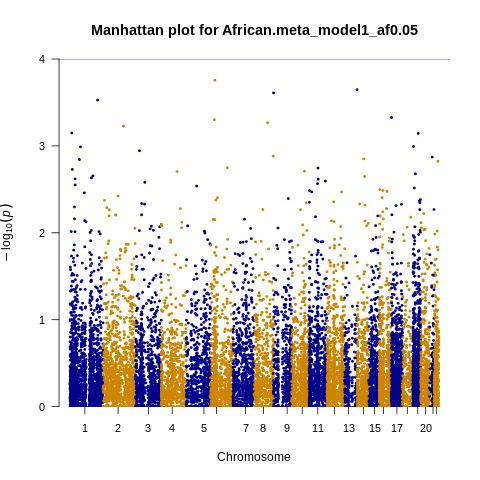

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.qq.png (14.7 KiB):

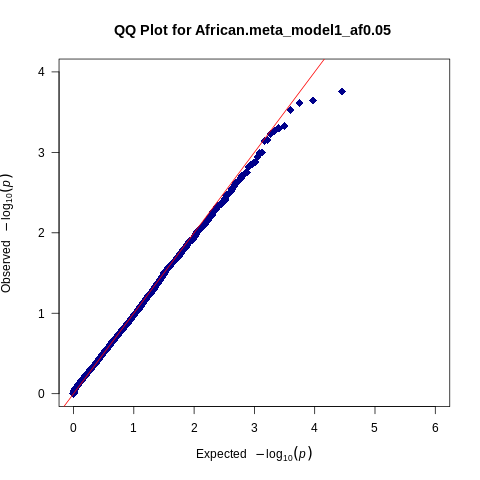

In [35]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model1_apoe_af5.manhattan.png

#### model2_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15780 markers!
## Smallest p-value is 0.0001753 at marker 'BAK1'

In [36]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model2_apoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9881542

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  BAK1       NA      NA      3824   -3.752 0.0001753 ?-         0.0   0.000   
2  SEC23B     NA      NA      3937   -3.747 0.0001790 --         0.0   0.295   
3  TUBGCP3    NA      NA      3824    3.689 0.0002253 ?+         0.0   0.000   
4  SMARCA2    NA      NA      3937   -3.668 0.0002447 --         0.0   0.112   
5  CD34       NA      NA      3824   -3.618 0.0002970 ?-         0.0   0.000   
6  DOC2B      NA      NA      3824   -3.497 0.0004710 ?-         0.0   0.000   
7  UBR5       NA      NA      3937    3.490 0.0004831 ++        43.4   1.766   
8  HLA-J      NA      NA      3937   -3.481 0.0004992 +-         0.0   0.908   
9  SMIM24     NA      NA      3937   -3.413 0.0006417 0-         0.0   0.344   
10 AADACL4    NA      NA      3824   -3.371 0.0007493 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  0     1.0000   6   33573750
2  1     0.5869  20   18506499
3  0     1.0000  13  112485981
4  1     0.7382   9    2014365
5  0     1.0000   1  207887677
6  0     1.0000  17     156190
7  1     0.1839   8  102252281
8  1     0.3405   6   30006148
9  1     0.5574  19    3472987
10 0     1.0000   1   12644526

[1] 15780    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.manhattan.png (107.5 KiB):

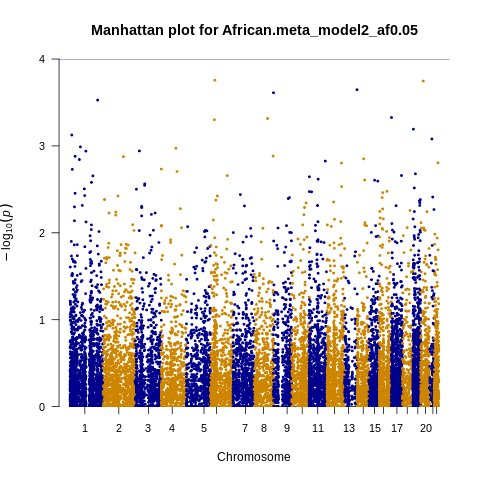

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.qq.png (14.9 KiB):

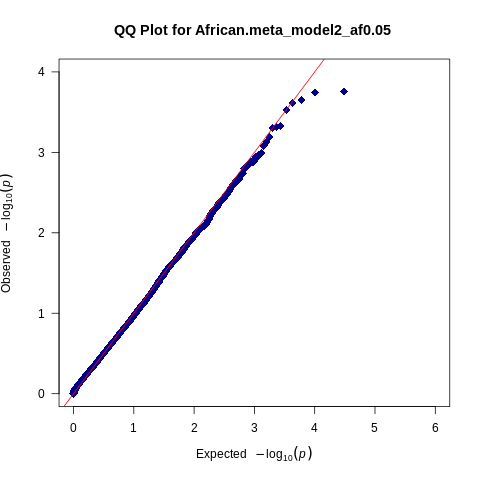

In [37]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model2_apoe_af5.manhattan.png

#### model3_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18075 markers!
## Smallest p-value is 6.311e-05 at marker 'SEC23B'

In [38]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_apoe_af5_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for African.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for African.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9727469

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  SEC23B     NA      NA      3937   -4.001 6.311e-05 --         0.0   0.007   
2  H6PD       NA      NA      3937   -3.771 1.623e-04 +-         0.0   0.852   
3  ZNF468     NA      NA      3937   -3.756 1.726e-04 +-         0.0   0.665   
4  ICA1       NA      NA      3937   -3.695 2.196e-04 --         0.0   0.054   
5  RBFA       NA      NA      3937   -3.637 2.759e-04 --         0.0   0.391   
6  C12orf49   NA      NA      3937    3.628 2.855e-04 ++         0.0   0.725   
7  TUBGCP3    NA      NA      3937    3.621 2.930e-04 -+        12.5   1.143   
8  SMARCA2    NA      NA      3937   -3.589 3.319e-04 +-         0.0   0.824   
9  PRAG1      NA      NA      3937   -3.555 3.774e-04 --        19.5   1.243   
10 RNASEK     NA      NA      3824   -3.524 4.252e-04 ?-         0.0   0.000   
   HetDf HetPVal CHR POS      
1  1     0.9344  20   18506499
2  1     0.3559   1    9233780
3  1     0.4149  19   52837040
4  1     0.8168   7    8112207
5  1     0.5317  18   80034457
6  1     0.3944  12  116709205
7  1     0.2850  13  112484032
8  1     0.3641   9    2014365
9  1     0.2649   8    8316743
10 0     1.0000  17    7012603

[1] 18075    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.manhattan.png (91.2 KiB):

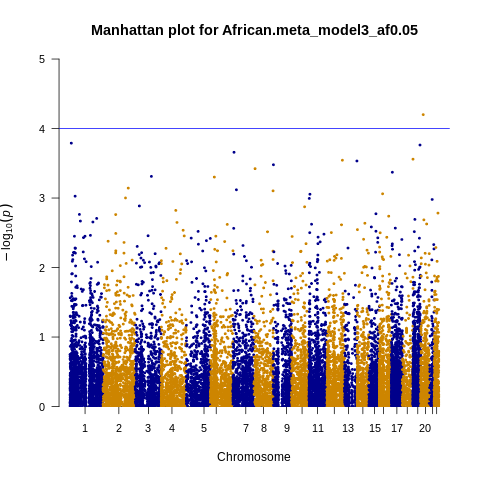

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.qq.png (16.8 KiB):

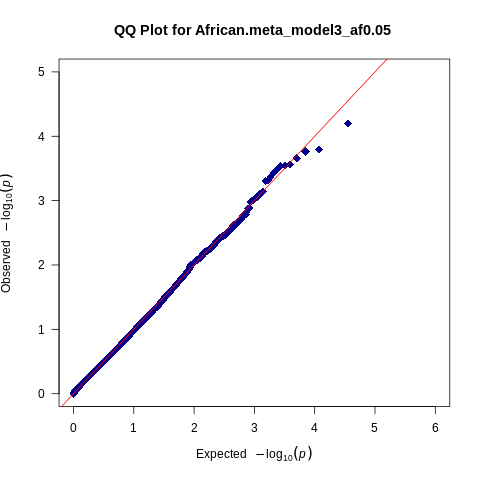

In [39]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/African_model3_apoe_af5.manhattan.png

### Hispanic

#### model1_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 14296 markers!
## Smallest p-value is 1.829e-05 at marker 'TARS'

In [42]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.057143

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TARS       NA      NA      4000   -4.285 1.829e-05 --         0.0   0.001   
2  ZC3H3      NA      NA      4000    3.770 1.632e-04 ++         0.0   0.027   
3  SCN7A      NA      NA      4000   -3.754 1.741e-04 --         0.0   0.042   
4  TRA2B      NA      NA      4000   -3.523 4.274e-04 --         0.0   0.050   
5  FGF11      NA      NA      4000   -3.403 6.653e-04 --        44.2   1.791   
6  HBS1L      NA      NA      4000   -3.398 6.791e-04 --        53.8   2.166   
7  CTH        NA      NA      4000    3.384 7.138e-04 ++         0.0   0.105   
8  PIWIL2     NA      NA      4000   -3.337 8.469e-04 --        10.4   1.116   
9  TSPAN33    NA      NA      4000   -3.314 9.183e-04 --        27.9   1.386   
10 SMPD2      NA      NA      4000    3.310 9.341e-04 ++         0.0   0.927   
   HetDf HetPVal CHR POS      
1  1     0.9781   5   33439819
2  1     0.8691   8  143436676
3  1     0.8379   2  166402755
4  1     0.8229   3  185913573
5  1     0.1808  17    7438751
6  1     0.1411   6  134959414
7  1     0.7456   1   70410256
8  1     0.2908   8   22275324
9  1     0.2390   7  129143988
10 1     0.3357   6  109441129

[1] 14296    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.manhattan.png (86.6 KiB):

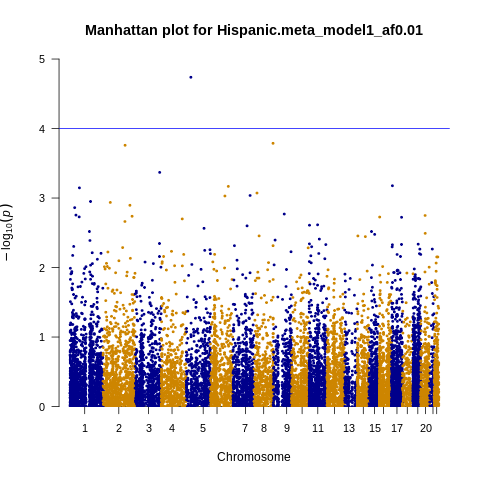

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.qq.png (16.6 KiB):

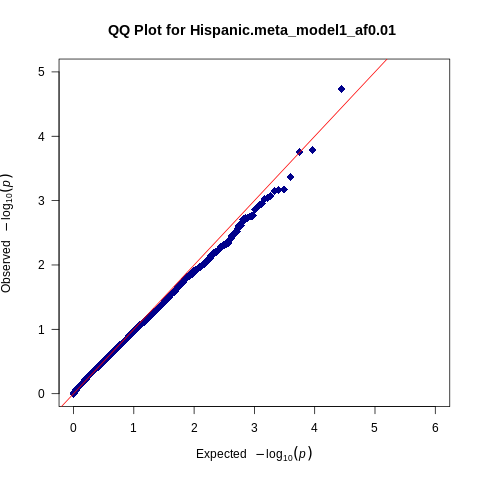

In [43]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1.manhattan.png

In [ ]:
## Running meta  using effect size estimates and standard errors

SCHEME STDERR
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P
STDERR   SE


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_upddated_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 14296 markers!
## Smallest p-value is 3.057e-05 at marker 'TARS'

In [3]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_updated_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.060062

MarkerName Allele1 Allele2 Effect  StdErr P.value   Direction HetISq
1  TARS       NA      NA      -0.0431 0.0103 3.057e-05 --        0.0   
2  TSPAN33    NA      NA      -0.0662 0.0176 1.631e-04 --        0.0   
3  SCN7A      NA      NA      -0.0340 0.0093 2.615e-04 --        0.0   
4  UBE2Q1     NA      NA       0.0810 0.0223 2.801e-04 ++        0.0   
5  TRA2B      NA      NA      -0.0560 0.0156 3.293e-04 --        0.0   
6  SMPD2      NA      NA       0.0535 0.0149 3.399e-04 ++        3.8   
7  SLC22A10   NA      NA       0.0494 0.0145 6.401e-04 ++        0.0   
8  FRMD3      NA      NA      -0.0337 0.0099 6.549e-04 --        0.0   
9  PSME1      NA      NA      -0.0638 0.0188 6.825e-04 --        0.0   
10 SCN2A      NA      NA       0.0569 0.0170 8.362e-04 ++        0.0   
   HetChiSq HetDf HetPVal CHR POS      
1  0.241    1     0.6235   5   33439819
2  0.051    1     0.8210   7  129143988
3  0.169    1     0.6806   2  166402755
4  0.345    1     0.5572   1  154548579
5  0.218    1     0.6405   3  185913573
6  1.040    1     0.3079   6  109441129
7  0.952    1     0.3292  11   63288967
8  0.439    1     0.5078   9   83242113
9  0.745    1     0.3881  14   24135176
10 0.612    1     0.4341   2  165238416

[1] 14296    13

png 
  2

png 
  2

In [8]:
## re run the analyses by includy a 'fake' allele column

## read data
His = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')
His = His %>% mutate(RefAllele = 'C',NonRefAllele = 'T')
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')
hs = hs %>% mutate(RefAllele = 'C',NonRefAllele = 'T')
write.table(His,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats_updated', sep = '\t', quote = F, col.names = T, row.names = F)
write.table(hs,'/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats_updated', sep = '\t', quote = F, col.names = T, row.names = F)

In [9]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_updated2_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated2.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated2.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af1_updated2.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.060062

MarkerName Allele1 Allele2 Effect  StdErr P.value   Direction HetISq
1  TARS       t       c        0.0431 0.0103 3.057e-05 ++        0.0   
2  TSPAN33    t       c        0.0662 0.0176 1.631e-04 ++        0.0   
3  SCN7A      t       c        0.0340 0.0093 2.615e-04 ++        0.0   
4  UBE2Q1     t       c       -0.0810 0.0223 2.801e-04 --        0.0   
5  TRA2B      t       c        0.0560 0.0156 3.293e-04 ++        0.0   
6  SMPD2      t       c       -0.0535 0.0149 3.399e-04 --        3.8   
7  SLC22A10   t       c       -0.0494 0.0145 6.401e-04 --        0.0   
8  FRMD3      t       c        0.0337 0.0099 6.549e-04 ++        0.0   
9  PSME1      t       c        0.0638 0.0188 6.825e-04 ++        0.0   
10 SCN2A      t       c       -0.0569 0.0170 8.362e-04 --        0.0   
   HetChiSq HetDf HetPVal CHR POS      
1  0.241    1     0.6235   5   33439819
2  0.051    1     0.8210   7  129143988
3  0.169    1     0.6806   2  166402755
4  0.345    1     0.5572   1  154548579
5  0.218    1     0.6405   3  185913573
6  1.040    1     0.3079   6  109441129
7  0.952    1     0.3292  11   63288967
8  0.439    1     0.5078   9   83242113
9  0.745    1     0.3881  14   24135176
10 0.612    1     0.4341   2  165238416

[1] 14296    13

png 
  2

png 
  2

#### model2_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_noapoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15391 markers!
## Smallest p-value is 4.034e-05 at marker 'TARS'

In [44]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_noapoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.04601

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TARS       NA      NA      4000   -4.106 4.034e-05 --         0.0   0.049   
2  ZC3H3      NA      NA      4000    3.770 1.632e-04 ++         0.0   0.027   
3  TSPAN33    NA      NA      4000   -3.555 3.780e-04 --        51.7   2.070   
4  TRA2B      NA      NA      4000   -3.523 4.274e-04 --         0.0   0.050   
5  NKX2-8     NA      NA      2164   -3.489 4.841e-04 ?-         0.0   0.000   
6  MRRF       NA      NA      4000    3.392 6.928e-04 ++        51.0   2.039   
7  SMPD2      NA      NA      4000    3.310 9.341e-04 ++         0.0   0.927   
8  PIWIL2     NA      NA      4000   -3.299 9.700e-04 --        17.0   1.205   
9  FGF11      NA      NA      4000   -3.286 1.017e-03 --        52.6   2.108   
10 UBE2Q1     NA      NA      4000    3.259 1.120e-03 ++        28.3   1.396   
   HetDf HetPVal CHR POS      
1  1     0.8242   5   33439819
2  1     0.8691   8  143436676
3  1     0.1503   7  129143988
4  1     0.8229   3  185913573
5  0     1.0000  14   36581212
6  1     0.1533   9  122264677
7  1     0.3357   6  109441129
8  1     0.2724   8   22275324
9  1     0.1465  17    7438751
10 1     0.2375   1  154548579

[1] 15391    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.manhattan.png (87.0 KiB):

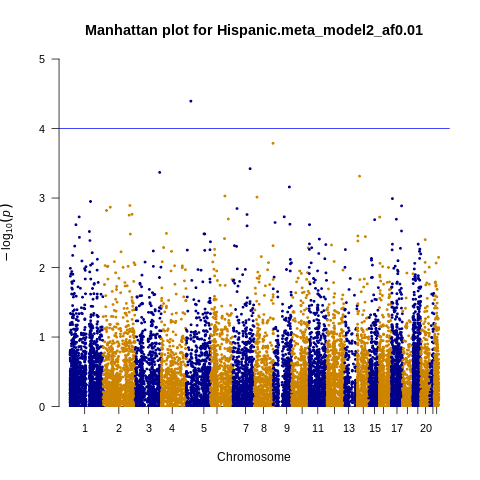

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.qq.png (16.7 KiB):

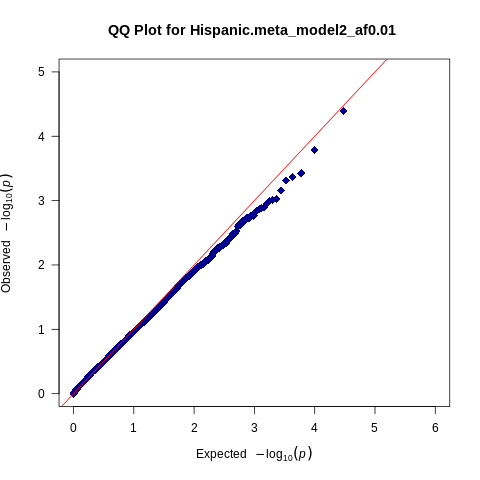

In [45]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af1.manhattan.png

#### model3_sex_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   SCORE
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3/ADSP_Hispanic_AD.SMMAT_filtered_variants.snp_stats.txt
PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model3/AD_Hispanic_AD.SMMAT_filtered_variants.snp_stats.txt


OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1_META .TXT
ANALYZE
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 18289 markers!
## Smallest p-value is 3.275e-05 at marker 'TPSB2'

In [46]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
afr = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
af = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(afr, af, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9939481

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TPSB2      NA      NA      1836    4.153 3.275e-05 +?         0.0   0.000   
2  TARS       NA      NA      4000   -3.715 2.034e-04 --         0.0   0.379   
3  EPPK1      NA      NA      4000   -3.665 2.469e-04 --         0.0   0.117   
4  ZC3H3      NA      NA      4000    3.663 2.488e-04 ++         0.0   0.122   
5  ICE1       NA      NA      4000   -3.598 3.208e-04 --         0.0   0.006   
6  HOXA6      NA      NA      4000   -3.536 4.061e-04 --         0.0   0.475   
7  TRA2B      NA      NA      4000   -3.491 4.805e-04 --         0.0   0.038   
8  TFAP4      NA      NA      1836    3.453 5.539e-04 +?         0.0   0.000   
9  FRMD3      NA      NA      4000   -3.447 5.661e-04 --         0.0   0.043   
10 TSPAN33    NA      NA      4000   -3.434 5.938e-04 --        41.5   1.710   
   HetDf HetPVal CHR POS      
1  0     1.0000  16    1227352
2  1     0.5383   5   33439819
3  1     0.7319   8  143856348
4  1     0.7264   8  143436676
5  1     0.9391   5    5421752
6  1     0.4908   7   27145661
7  1     0.8453   3  185913573
8  0     1.0000  16    4256233
9  1     0.8354   9   83242113
10 1     0.1910   7  129143988

[1] 18289    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.manhattan.png (91.3 KiB):

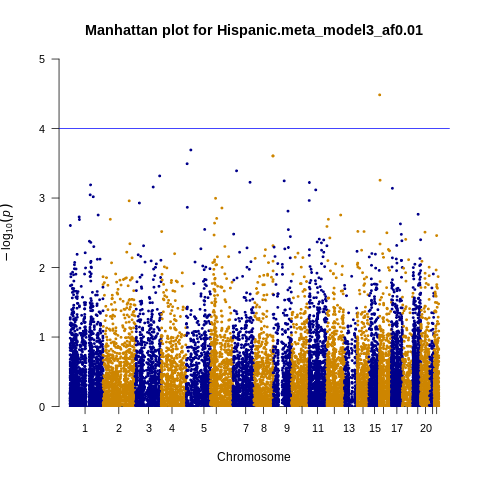

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.qq.png (16.8 KiB):

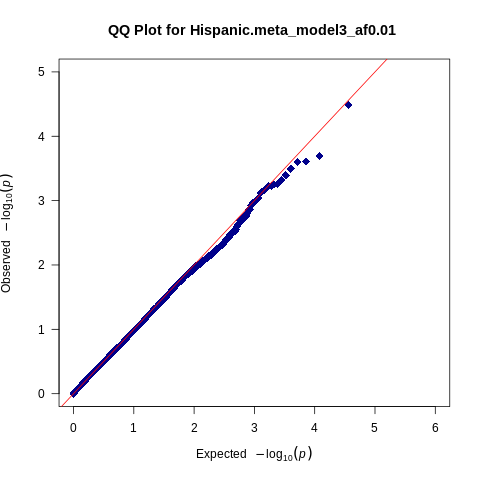

In [47]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af1.manhattan.png

#### model1_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 14296 markers!
## Smallest p-value is 1.207e-05 at marker 'TARS'

In [48]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.071306

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TARS       NA      NA      4000   -4.376 1.207e-05 --         0.0   0.049   
2  SCN7A      NA      NA      4000   -3.830 1.281e-04 --         0.0   0.066   
3  ZC3H3      NA      NA      4000    3.671 2.414e-04 ++         0.0   0.043   
4  TRA2B      NA      NA      4000   -3.421 6.249e-04 --         0.0   0.035   
5  HBS1L      NA      NA      4000   -3.376 7.346e-04 --        55.5   2.249   
6  ICA1L      NA      NA      4000   -3.340 8.368e-04 --         0.0   0.275   
7  UBE2Q1     NA      NA      4000    3.284 1.023e-03 ++        25.3   1.339   
8  PIWIL2     NA      NA      4000   -3.266 1.090e-03 --        28.6   1.401   
9  SMPD2      NA      NA      4000    3.245 1.176e-03 ++         0.0   0.855   
10 CTH        NA      NA      4000    3.239 1.198e-03 ++         0.0   0.096   
   HetDf HetPVal CHR POS      
1  1     0.8247  5    33439819
2  1     0.7977  2   166402755
3  1     0.8348  8   143436676
4  1     0.8521  3   185913573
5  1     0.1337  6   134959414
6  1     0.5997  2   202772175
7  1     0.2472  1   154548579
8  1     0.2366  8    22275324
9  1     0.3550  6   109441129
10 1     0.7570  1    70410256

[1] 14296    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.manhattan.png (86.3 KiB):

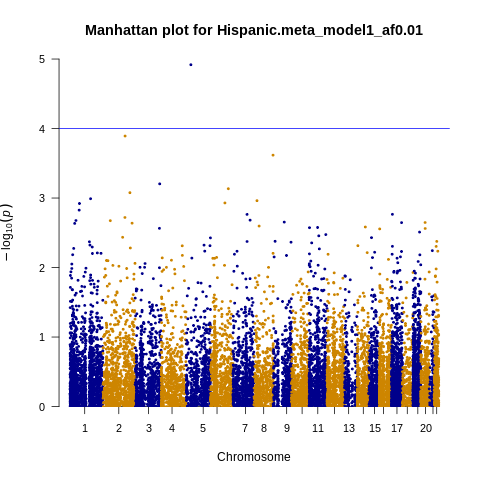

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.qq.png (16.6 KiB):

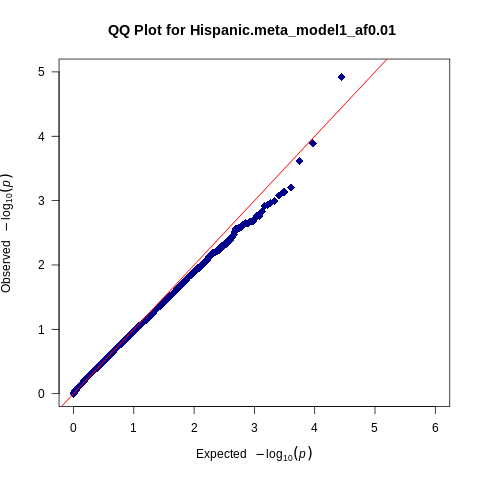

In [49]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af1.manhattan.png

#### model2_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 16555 markers!
## Smallest p-value is 4.026e-05 at marker 'TARS'

In [50]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_apoe_af1_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model2_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model2_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.046974

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TARS       NA      NA      4000   -4.204 2.619e-05 --         0.0   0.167   
2  ZC3H3      NA      NA      4000    3.671 2.414e-04 ++         0.0   0.043   
3  MRRF       NA      NA      4000    3.496 4.718e-04 ++        42.4   1.737   
4  NKX2-8     NA      NA      2164   -3.493 4.785e-04 ?-         0.0   0.000   
5  TRA2B      NA      NA      4000   -3.421 6.249e-04 --         0.0   0.035   
6  ICA1L      NA      NA      4000   -3.318 9.078e-04 --         0.0   0.330   
7  TSPAN33    NA      NA      4000   -3.308 9.389e-04 --        61.1   2.568   
8  UBE2Q1     NA      NA      4000    3.284 1.023e-03 ++        25.3   1.339   
9  KIF3C      NA      NA      4000   -3.262 1.106e-03 --         0.0   0.701   
10 SMPD2      NA      NA      4000    3.245 1.176e-03 ++         0.0   0.855   
   HetDf HetPVal CHR POS      
1  1     0.6831   5   33439819
2  1     0.8348   8  143436676
3  1     0.1876   9  122264677
4  0     1.0000  14   36581212
5  1     0.8521   3  185913573
6  1     0.5657   2  202772175
7  1     0.1090   7  129143988
8  1     0.2472   1  154548579
9  1     0.4024   2   25925652
10 1     0.3550   6  109441129

[1] 15391    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.manhattan.png (87.2 KiB):

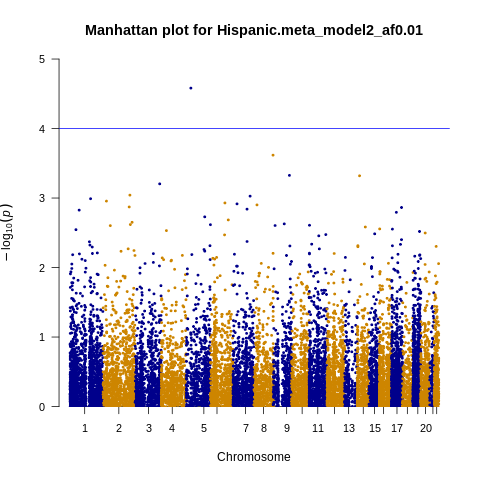

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.qq.png (16.7 KiB):

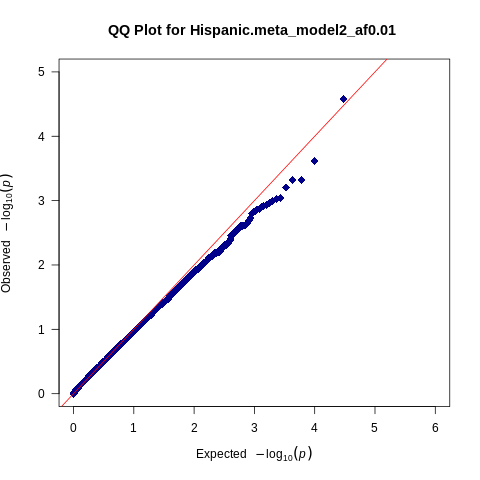

In [51]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af1.manhattan.png

#### model3_apoe_af1

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_apoe_af1_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18289 markers!
## Smallest p-value is 4.738e-05 at marker 'TPSB2'

In [52]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model3_af0.01 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model3_af0.01', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.9916276

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TPSB2      NA      NA      1836    4.068 4.738e-05 +?        0      0.000   
2  EPPK1      NA      NA      4000   -3.760 1.696e-04 --        0      0.136   
3  TARS       NA      NA      4000   -3.759 1.706e-04 --        0      0.673   
4  ICE1       NA      NA      4000   -3.653 2.594e-04 --        0      0.034   
5  TFAP4      NA      NA      1836    3.610 3.061e-04 +?        0      0.000   
6  ZC3H3      NA      NA      4000    3.513 4.429e-04 ++        0      0.164   
7  FRMD3      NA      NA      4000   -3.405 6.609e-04 --        0      0.038   
8  TRA2B      NA      NA      4000   -3.392 6.934e-04 --        0      0.026   
9  HSPD1      NA      NA      4000   -3.366 7.614e-04 --        0      0.077   
10 OR4C13     NA      NA      4000   -3.365 7.651e-04 --        0      0.804   
   HetDf HetPVal CHR POS      
1  0     1.0000  16    1227352
2  1     0.7123   8  143856348
3  1     0.4121   5   33439819
4  1     0.8534   5    5421752
5  0     1.0000  16    4256233
6  1     0.6853   8  143436676
7  1     0.8447   9   83242113
8  1     0.8727   3  185913573
9  1     0.7810   2  197485593
10 1     0.3699  11   49951415

[1] 18289    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.manhattan.png (91.0 KiB):

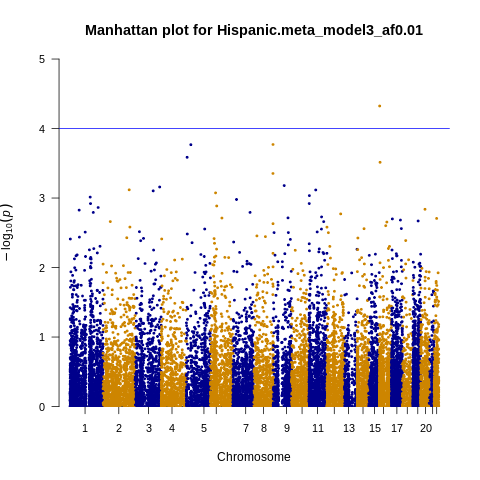

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.qq.png (16.7 KiB):

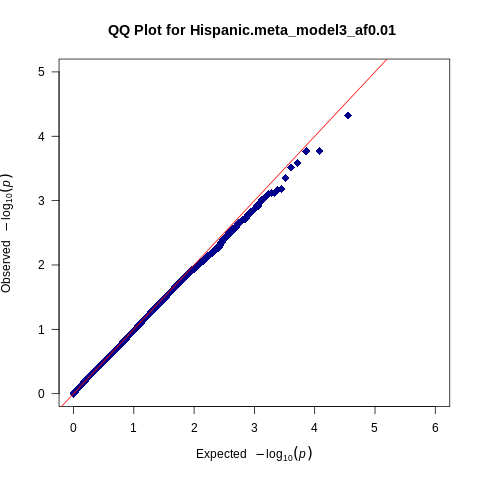

In [53]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af1.manhattan.png

#### model1_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 14841 markers!
## Smallest p-value is 0.0003162 at marker 'NBR1'

In [54]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.039275

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  NBR1       NA      NA      4000   -3.602 0.0003162 --         0.0   0.429   
2  CEP128     NA      NA      4000   -3.429 0.0006065 --         0.0   0.267   
3  SYT8       NA      NA      4000   -3.414 0.0006392 --        85.0   6.671   
4  FGF11      NA      NA      4000   -3.403 0.0006653 --        44.2   1.791   
5  IPO8       NA      NA      4000    3.386 0.0007094 ++        15.8   1.187   
6  CTH        NA      NA      4000    3.384 0.0007138 ++         0.0   0.105   
7  TSPAN33    NA      NA      4000   -3.314 0.0009183 --        27.9   1.386   
8  SMPD2      NA      NA      4000    3.310 0.0009341 ++         0.0   0.927   
9  SLC13A2    NA      NA      4000    3.295 0.0009840 ++        72.1   3.584   
10 UBE2Q1     NA      NA      4000    3.259 0.0011200 ++        28.3   1.396   
   HetDf HetPVal CHR POS      
1  1     0.51250 17   43170415
2  1     0.60550 14   80495527
3  1     0.00980 11    1833462
4  1     0.18080 17    7438751
5  1     0.27590 12   30628001
6  1     0.74560  1   70410256
7  1     0.23900  7  129143988
8  1     0.33570  6  109441129
9  1     0.05835 17   28472705
10 1     0.23750  1  154548579

[1] 14841    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.manhattan.png (107.3 KiB):

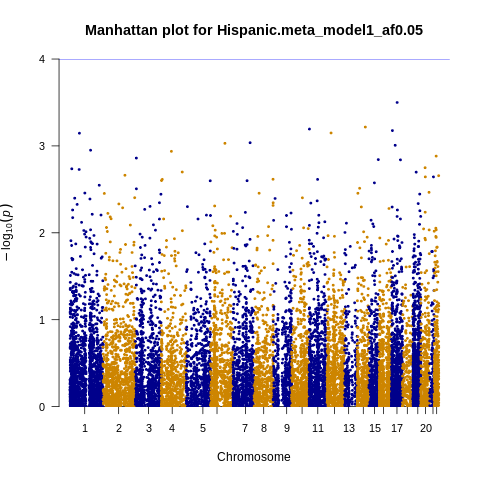

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.qq.png (14.7 KiB):

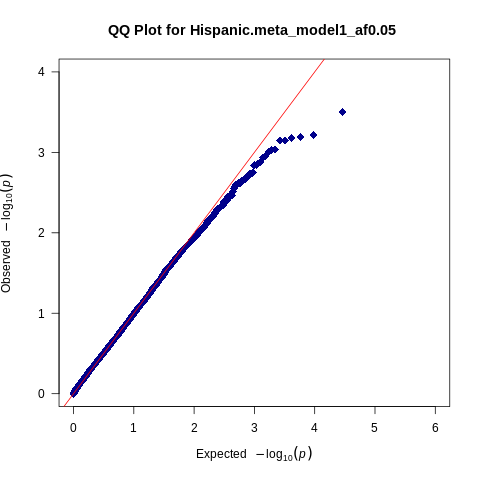

In [55]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_sex_af5.manhattan.png

#### model2_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15838 markers!
## Smallest p-value is 6.469e-05 at marker 'FOXRED1'

In [56]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_noapoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.01242

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  FOXRED1    NA      NA      4000   -3.995 6.469e-05 --         0.0   0.115   
2  TYMP       NA      NA      4000    3.653 2.590e-04 ++        51.7   2.069   
3  NBR1       NA      NA      4000   -3.561 3.701e-04 --         0.0   0.381   
4  TSPAN33    NA      NA      4000   -3.555 3.780e-04 --        51.7   2.070   
5  SLC13A2    NA      NA      4000    3.484 4.936e-04 ++        71.9   3.564   
6  CTH        NA      NA      4000    3.460 5.400e-04 ++         0.0   0.396   
7  MRRF       NA      NA      4000    3.459 5.429e-04 ++        63.1   2.713   
8  CEP128     NA      NA      4000   -3.429 6.065e-04 --         0.0   0.267   
9  SYT8       NA      NA      4000   -3.414 6.392e-04 --        85.0   6.671   
10 IPO8       NA      NA      4000    3.386 7.094e-04 ++        15.8   1.187   
   HetDf HetPVal CHR POS      
1  1     0.73510 11  126269157
2  1     0.15030 22   50525806
3  1     0.53720 17   43170415
4  1     0.15030  7  129143988
5  1     0.05904 17   28472705
6  1     0.52930  1   70410256
7  1     0.09954  9  122264677
8  1     0.60550 14   80495527
9  1     0.00980 11    1833462
10 1     0.27590 12   30628001

[1] 15838    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.manhattan.png (89.4 KiB):

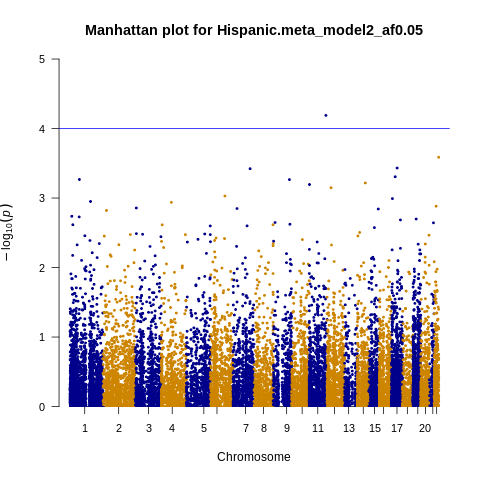

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.qq.png (16.8 KiB):

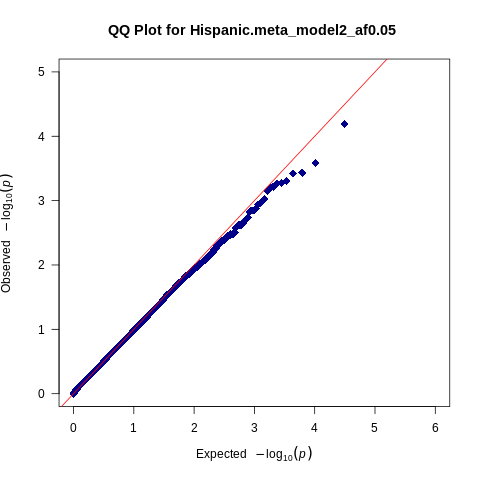

In [57]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_sex_af5.manhattan.png

#### model3_sex_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_noapoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18479 markers!
## Smallest p-value is 0.0001236 at marker 'TOGARAM2'

In [60]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_noapoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 0.998601

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TOGARAM2   NA      NA      4000    3.839 0.0001236 ++        46.0   1.853   
2  CCDC158    NA      NA      4000    3.793 0.0001487 ++         0.0   0.001   
3  NBR1       NA      NA      4000   -3.708 0.0002086 --         0.0   0.029   
4  PON2       NA      NA      4000    3.563 0.0003670 ++         0.0   0.155   
5  HOXA6      NA      NA      4000   -3.536 0.0004061 --         0.0   0.475   
6  FOXRED1    NA      NA      4000   -3.508 0.0004512 --         0.0   0.112   
7  ZNF678     NA      NA      4000   -3.458 0.0005448 --         0.0   0.457   
8  TSPAN33    NA      NA      4000   -3.434 0.0005938 --        41.5   1.710   
9  ZFYVE26    NA      NA      4000   -3.425 0.0006152 --         0.0   0.306   
10 SHE        NA      NA      4000   -3.411 0.0006468 --        58.5   2.409   
   HetDf HetPVal CHR POS      
1  1     0.1735   2   28980335
2  1     0.9692   4   76312264
3  1     0.8644  17   43170415
4  1     0.6936   7   95403873
5  1     0.4908   7   27145661
6  1     0.7376  11  126269157
7  1     0.4990   1  227562712
8  1     0.1910   7  129143988
9  1     0.5799  14   67745554
10 1     0.1206   1  154478487

[1] 18479    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.manhattan.png (109.8 KiB):

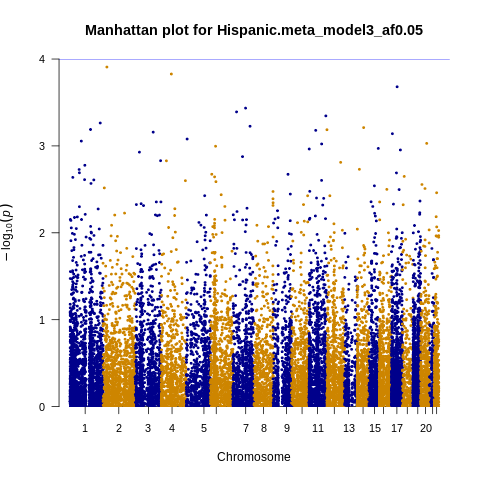

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.qq.png (15.0 KiB):

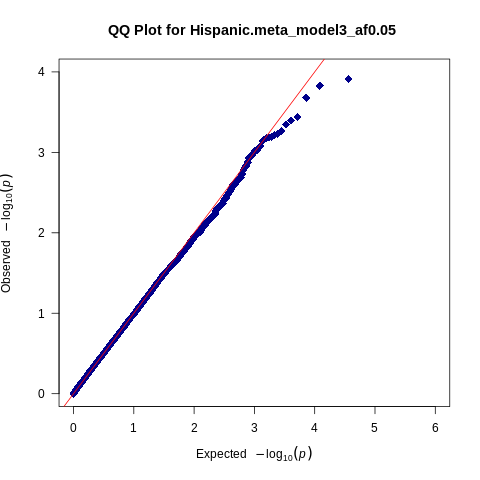

In [61]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_sex_af5.manhattan.png

#### model1_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY
## Completed meta-analysis for 14841 markers!
## Smallest p-value is 0.0004138 at marker 'CEP128'

In [62]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_apoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model1_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model1_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.024476

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  CEP128     NA      NA      4000   -3.531 0.0004138 --         0.0   0.199   
2  NBR1       NA      NA      4000   -3.511 0.0004468 --         0.0   0.306   
3  SYT8       NA      NA      4000   -3.339 0.0008411 --        83.6   6.091   
4  UBE2Q1     NA      NA      4000    3.284 0.0010230 ++        25.3   1.339   
5  IPO8       NA      NA      4000    3.279 0.0010410 ++         0.0   0.980   
6  SMPD2      NA      NA      4000    3.245 0.0011760 ++         0.0   0.855   
7  CTH        NA      NA      4000    3.239 0.0011980 ++         0.0   0.096   
8  PRR14L     NA      NA      4000    3.213 0.0013140 ++         0.0   0.169   
9  PIGU       NA      NA      4000   -3.196 0.0013960 --        28.8   1.405   
10 SCTR       NA      NA      4000   -3.190 0.0014230 --        54.4   2.192   
   HetDf HetPVal CHR POS      
1  1     0.65550 14   80495527
2  1     0.58040 17   43170415
3  1     0.01359 11    1833462
4  1     0.24720  1  154548579
5  1     0.32210 12   30628001
6  1     0.35500  6  109441129
7  1     0.75700  1   70410256
8  1     0.68070 22   31680378
9  1     0.23590 20   34560586
10 1     0.13870  2  119439521

[1] 14841    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.manhattan.png (106.7 KiB):

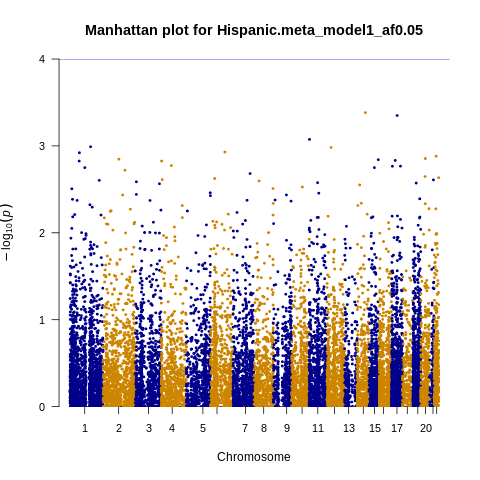

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.qq.png (14.6 KiB):

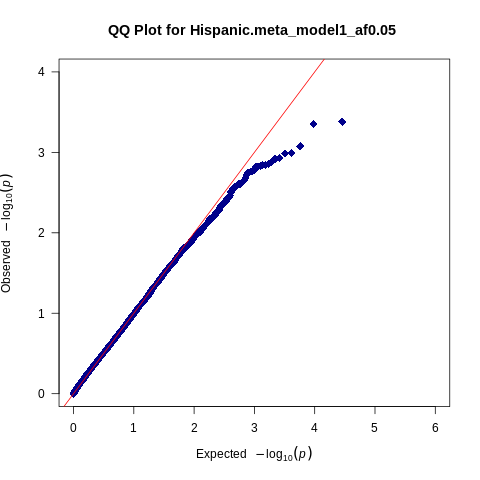

In [63]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model1_apoe_af5.manhattan.png

#### model2_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 15838 markers!
## Smallest p-value is 0.0001248 at marker 'FOXRED1'

In [64]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_apoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model2_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model2_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))
dev.off()

[1] 1.013126

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  FOXRED1    NA      NA      4000   -3.836 0.0001248 --         0.0   0.049   
2  TYMP       NA      NA      4000    3.634 0.0002787 ++        57.9   2.376   
3  CEP128     NA      NA      4000   -3.531 0.0004138 --         0.0   0.199   
4  MRRF       NA      NA      4000    3.513 0.0004427 ++        61.9   2.623   
5  NBR1       NA      NA      4000   -3.461 0.0005372 --         0.0   0.257   
6  SLC13A2    NA      NA      4000    3.420 0.0006271 ++        73.7   3.801   
7  CTH        NA      NA      4000    3.371 0.0007482 ++         0.0   0.379   
8  SYT8       NA      NA      4000   -3.339 0.0008411 --        83.6   6.091   
9  TSPAN33    NA      NA      4000   -3.308 0.0009389 --        61.1   2.568   
10 UBE2Q1     NA      NA      4000    3.284 0.0010230 ++        25.3   1.339   
   HetDf HetPVal CHR POS      
1  1     0.82450 11  126269157
2  1     0.12320 22   50525806
3  1     0.65550 14   80495527
4  1     0.10530  9  122264677
5  1     0.61190 17   43170415
6  1     0.05121 17   28472705
7  1     0.53800  1   70410256
8  1     0.01359 11    1833462
9  1     0.10900  7  129143988
10 1     0.24720  1  154548579

[1] 15838    13

png 
  2

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.manhattan.png (106.9 KiB):

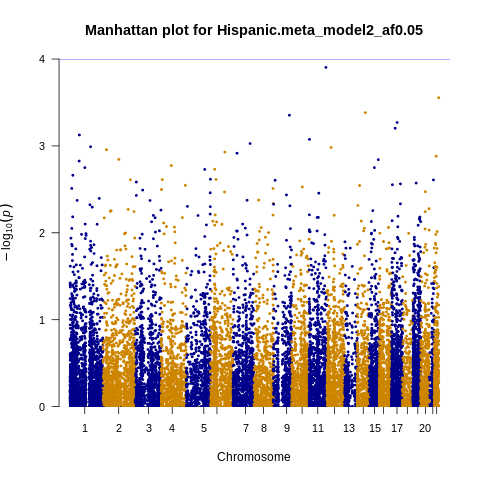

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.qq.png (14.8 KiB):

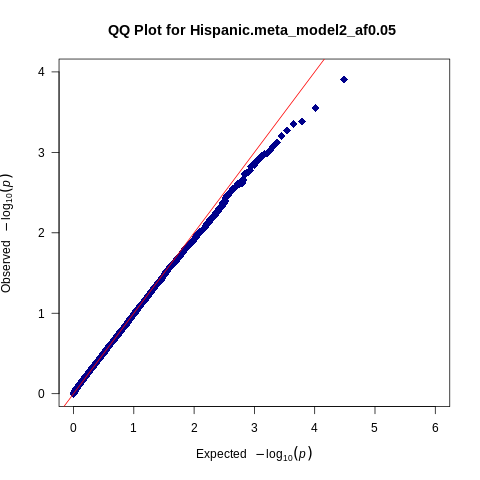

In [65]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model2_apoe_af5.manhattan.png

#### model3_apoe_af5

In [ ]:
SCHEME SAMPLESIZE
MARKER   SNP
WEIGHT   N
EFFECT   BETA
PVAL     P


PROCESS /mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model2_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz
PROCESS /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model2_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz

OUTFILE /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model2_apoe_af5_META .TXT
ANALYZE
ANALYZE HETEROGENEITY

## Completed meta-analysis for 18479 markers!
## Smallest p-value is 0.0001321 at marker 'TOGARAM2'

In [69]:
data = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_apoe_af5_META2.TXT', header = T, sep = '\t')
his = read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.05/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
hs = read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.05/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T, sep ='\t')[, c(1, 2, 3)]
pos = merge(his, hs, by = c('CHR', 'POS', 'SNP'),all = TRUE)
data = inner_join(data, pos, by = c('MarkerName'='SNP'))
data$POS = as.numeric(data$POS)
data$CHR = as.numeric(data$CHR)
data <- data %>% distinct(MarkerName, .keep_all = TRUE)
write.table(data,'/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.txt', sep = '\t', quote = F, col.names = T, row.names = F)
lambda <- median(qchisq(1-data$P.value,1), na.rm=TRUE)/qchisq(0.5,1)
lambda
head(arrange(data, P.value),10)
dim(data)
## qq plot
ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.qq.png')
qq(data$P.value, main = 'QQ Plot for Hispanic.meta_model3_af0.05 ', xlim = c(0, 6), ylim = c(0, ylim), pch = 18, col = "blue4", cex = 1.5, las = 1)
dev.off()

## manhattan plot

ylim <- abs(floor(log10(min(data$P.value, na.rm=TRUE))))
png(file='/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.manhattan.png')
manhattan(data, chr='CHR', bp='POS', snp='MarkerName', p='P.value', main = 'Manhattan plot for Hispanic.meta_model3_af0.05', ylim = c(0, ylim), cex = 0.6, cex.axis = 0.9, col = c("blue4", "orange3"), 
          genomewideline =  -log10(2.5e-06), suggestiveline = -log10(1e-04),  chrlabs = as.character(c(1:22)))


[1] 0.9958074

MarkerName Allele1 Allele2 Weight Zscore P.value   Direction HetISq HetChiSq
1  TOGARAM2   NA      NA      4000    3.822 0.0001321 ++        53.1   2.131   
2  CCDC158    NA      NA      4000    3.682 0.0002310 ++         0.0   0.028   
3  NBR1       NA      NA      4000   -3.652 0.0002602 --         0.0   0.040   
4  PON2       NA      NA      4000    3.563 0.0003673 ++         0.0   0.063   
5  ZFYVE26    NA      NA      4000   -3.520 0.0004323 --         0.0   0.118   
6  FOXRED1    NA      NA      4000   -3.456 0.0005479 --         0.0   0.057   
7  ZNF678     NA      NA      4000   -3.439 0.0005838 --         0.0   0.332   
8  OR4C13     NA      NA      4000   -3.381 0.0007212 --        37.8   1.608   
9  CHIA       NA      NA      4000   -3.365 0.0007665 --         0.0   0.751   
10 ICE1       NA      NA      4000   -3.364 0.0007677 --         0.0   0.046   
   HetDf HetPVal CHR POS      
1  1     0.1444   2   28980335
2  1     0.8670   4   76312264
3  1     0.8419  17   43170415
4  1     0.8022   7   95403873
5  1     0.7317  14   67745554
6  1     0.8109  11  126269157
7  1     0.5643   1  227562712
8  1     0.2048  11   49951415
9  1     0.3860   1  111289955
10 1     0.8305   5    5421752

[1] 18479    13

png 
  2

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.manhattan.png (0 B):

0 line

> /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.qq.png (15.1 KiB):

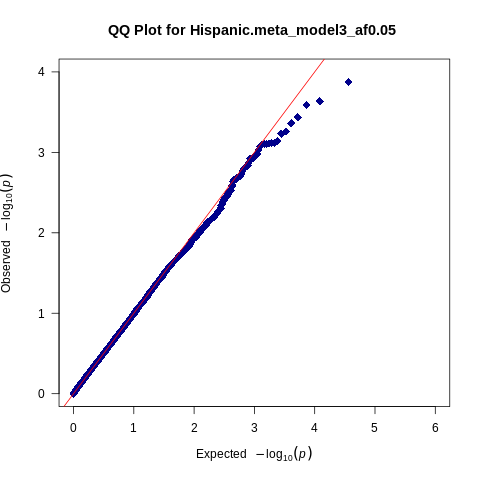

In [70]:
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.qq.png
%preview /mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/Hispanic_model3_apoe_af5.manhattan.png

# Checking p-values of top 20 genes of the family data in the ADSP sample

In [11]:
# model1_sex_af1

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/meta.smmat_noAPOE4.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/meta.smmat_noAPOE4.txt', header =T)
Family_ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af1_META2.TXT',header =T, sep ='\t')
#Family_in_ADSP_model1 <- ADSP %>% filter(ADSP$MarkerName %in% Family$MarkerName)

Family_in_ADSP_model1 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_meta_model1 <- left_join(Family_in_ADSP_model1, Family_ADSP, by = 'MarkerName')
write.csv(Family_in_ADSP_meta_model1,'top20_familygenes.csv')

In [10]:
head(Family_in_ADSP_meta_model1)
dim(Family_in_ADSP_meta_model1)

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x
1 DMAP1      NA        NA        2896     -3.774   0.0001606 ---        
2 NOS1       NA        NA        2783      3.515   0.0004395 ?++        
3 SPRED1     NA        NA        2783      3.495   0.0004748 ?++        
4 HBS1L      NA        NA        2896     -3.474   0.0005126 ---        
5 WFDC1      NA        NA        2896      3.400   0.0006740 -++        
6 RNF157     NA        NA        2896      3.276   0.0010520 +++        
  HetISq.x HetChiSq.x HetDf.x ⋯ Allele1 Allele2 Weight Zscore P.value 
1  0       0.003      2       ⋯ NA      NA      19898  -1.848 0.064580
2  0       0.785      1       ⋯ NA      NA      19785  -0.154 0.877400
3  0       0.003      1       ⋯ NA      NA      19785  -0.082 0.934700
4  0       1.153      2       ⋯ NA      NA      19898  -1.088 0.276700
5  0       1.345      2       ⋯ NA      NA      19898   2.705 0.006831
6 34       3.032      2       ⋯ NA      NA      19898   1.996 0.045970
  Direction HetISq HetChiSq HetDf HetPVal 
1 ---+--    64.3   13.988   5     0.015680
2 ?++---    76.7   17.132   4     0.001822
3 ?++---    73.5   15.076   4     0.004546
4 ---++-    69.6   16.440   5     0.005695
5 -+++++    41.2    8.504   5     0.130600
6 ++++++    58.2   11.966   5     0.035250

[1] 20 35

In [7]:
# model2_sex_af1

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model2/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family_in_ADSP_model2 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_model2

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x CHR.x
1  DMAP1      NA        NA        2896     -4.030   5.579e-05 ---          1   
2  SPRED1     NA        NA        2783      3.580   3.440e-04 ?++         15   
3  MPV17L     NA        NA        2896      3.507   4.527e-04 -++         16   
4  LZTR1      NA        NA        2783     -3.446   5.698e-04 ?--         22   
5  RNF157     NA        NA        2896      3.392   6.942e-04 +++         17   
6  PDE4DIPP1  NA        NA        2896      3.349   8.121e-04 +++          1   
7  NRXN2      NA        NA        2896      3.336   8.497e-04 -++         11   
8  RNASE12    NA        NA        2896      3.305   9.498e-04 -++         14   
9  HAUS6      NA        NA        2783     -3.303   9.558e-04 ?--          9   
10 EIF2B5     NA        NA        2783     -3.259   1.120e-03 ?--          3   
11 CAMK2D     NA        NA        2896     -3.227   1.250e-03 ---          4   
12 CTDSPL2    NA        NA        2896      3.219   1.288e-03 -++         15   
13 TYK2       NA        NA        2896     -3.209   1.333e-03 ---         19   
14 UBE2Q1     NA        NA        1836      3.188   1.431e-03 ??+          1   
15 EEF1A1     NA        NA        2783      3.176   1.494e-03 ?++          6   
16 ADAMTS7    NA        NA        2896     -3.149   1.640e-03 ---         15   
17 GUCY2EP    NA        NA        2896     -3.138   1.698e-03 ---         11   
18 SLC3A1     NA        NA        2896      3.137   1.704e-03 +++          2   
19 BARD1      NA        NA        2896     -3.135   1.721e-03 ---          2   
20 CCDC74A    NA        NA        2896      3.098   1.949e-03 -++          2   
   POS.x     Allele1.y Allele2.y Weight.y Zscore.y P.value.y Direction.y CHR.y
1   44212508 NA        NA        17002     0.013   0.989700  +--          1   
2   38251855 NA        NA        17002    -0.019   0.985000  ++-         15   
3   15394757 NA        NA        17002    -0.237   0.812600  +--         16   
4   20982301 NA        NA        17002     0.618   0.536500  ++-         22   
5   76145269 NA        NA        17002     1.195   0.232000  +++         17   
6  148048327 NA        NA           NA        NA         NA  NA          NA   
7   64605202 NA        NA        17002    -1.587   0.112500  --+         11   
8   20590327 NA        NA        17002    -0.360   0.718600  -++         14   
9   19052167 NA        NA        17002    -2.665   0.007697  --+          9   
10 184134386 NA        NA        17002     1.192   0.233400  ++-          3   
11 113450158 NA        NA        17002     0.934   0.350500  ++-          4   
12  44426791 NA        NA        17002    -0.717   0.473200  --+         15   
13  10349541 NA        NA        17002    -0.647   0.517700  +--         19   
14 154548579 NA        NA        17002     0.645   0.518700  +-+          1   
15  73514782 NA        NA        17002     0.589   0.555700  ++-          6   
16  78758231 NA        NA        17002     0.482   0.629700  +-+         15   
17  76679228 NA        NA           NA        NA         NA  NA          NA   
18  44274488 NA        NA        17002     0.379   0.705000  -+-          2   
19 214724657 NA        NA        17002    -0.667   0.504700  --+          2   
20 131526682 NA        NA        17002     1.395   0.163100  +++          2   
   POS.y    
1   44213718
2   38253133
3   15396121
4   20982358
5   76145240
6         NA
7   64607158
8   20590282
9   19056325
10 184135282
11 113454399
12  44459046
13  10350800
14 154550361
15  73517803
16  78762496
17        NA
18  44275494
19 214728638
20 131528075

In [12]:
# model3_sex_af1

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/meta.smmat_noAPOE4.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/meta.smmat_noAPOE4.txt', header =T)
Family_ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af1_META2.TXT',header =T, sep ='\t')

Family_in_ADSP_model3 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_meta_model3 <- left_join(Family_in_ADSP_model3, Family_ADSP, by = 'MarkerName')
write.csv(Family_in_ADSP_meta_model3,'top20_familygenes_model3.csv')
Family_in_ADSP_meta_model3

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x
1  TPSB2      NA        NA        2783      3.996   6.453e-05 ?++        
2  ZMIZ2      NA        NA        2896      3.776   1.591e-04 +++        
3  KRT12      NA        NA        2896     -3.710   2.075e-04 ---        
4  SPRED1     NA        NA        2783      3.607   3.103e-04 ?++        
5  TOLLIP     NA        NA        2896      3.603   3.146e-04 +++        
6  CCDC179    NA        NA        2783      3.590   3.303e-04 ?++        
7  CAMK2D     NA        NA        2896     -3.523   4.271e-04 ---        
8  ZNF707     NA        NA        2896      3.501   4.644e-04 -++        
9  ZHX3       NA        NA        2896     -3.437   5.889e-04 ---        
10 PPP4R1     NA        NA        2896      3.411   6.473e-04 +++        
11 PFKM       NA        NA        2896      3.347   8.158e-04 +0+        
12 ATP6V0D1   NA        NA        1836      3.343   8.275e-04 ??+        
13 FGF10      NA        NA        1836      3.340   8.381e-04 ??+        
14 ZFP36L1    NA        NA        2783     -3.167   1.539e-03 ?--        
15 MSANTD1    NA        NA        2896      3.162   1.566e-03 -++        
16 AAAS       NA        NA        2896      3.159   1.583e-03 -++        
17 UBXN7      NA        NA        2783      3.145   1.664e-03 ?++        
18 TCP11      NA        NA        2783      3.143   1.670e-03 ?++        
19 GTF3C3     NA        NA        2783      3.124   1.782e-03 ?++        
20 RAB38      NA        NA        2896     -3.113   1.853e-03 ---        
   HetISq.x HetChiSq.x HetDf.x ⋯ Allele1 Allele2 Weight Zscore P.value  
1  58.7     2.424      1       ⋯ NA      NA      13797   1.040 0.2984000
2  52.6     4.221      2       ⋯ NA      NA      19898   1.906 0.0566500
3   0.0     0.339      2       ⋯ NA      NA      19898  -2.128 0.0333700
4   0.0     0.013      1       ⋯ NA      NA      19785   1.300 0.1935000
5   8.3     2.182      2       ⋯ NA      NA      19898   2.520 0.0117400
6  44.1     1.788      1       ⋯ NA      NA       2783   3.590 0.0003303
7   0.0     0.024      2       ⋯ NA      NA      19898  -1.390 0.1645000
8   0.0     1.201      2       ⋯ NA      NA      19898   0.711 0.4771000
9   0.0     0.097      2       ⋯ NA      NA      19898  -0.755 0.4504000
10  0.0     0.199      2       ⋯ NA      NA      19898   1.370 0.1707000
11 64.2     5.590      2       ⋯ NA      NA      19898   0.979 0.3278000
12  0.0     0.000      0       ⋯ NA      NA      18838   0.848 0.3965000
13  0.0     0.000      0       ⋯ NA      NA      18838   1.043 0.2969000
14  0.0     0.004      1       ⋯ NA      NA      19785  -1.702 0.0887000
15  0.0     0.965      2       ⋯ NA      NA      19898   1.838 0.0661300
16 58.3     4.796      2       ⋯ NA      NA      19898   1.288 0.1977000
17 72.2     3.599      1       ⋯ NA      NA      19785   1.353 0.1760000
18  0.0     0.179      1       ⋯ NA      NA      19785  -1.261 0.2071000
19  0.0     0.205      1       ⋯ NA      NA      19785   1.422 0.1549000
20 41.7     3.432      2       ⋯ NA      NA      19898  -2.812 0.0049180
   Direction HetISq HetChiSq HetDf HetPVal  
1  ?++?-?    88.9   18.020   2     0.0001222
2  +++++-    71.5   17.554   5     0.0035610
3  ---+-+    70.7   17.087   5     0.0043380
4  ?+++--    69.8   13.246   4     0.0101400
5  +++-++    63.2   13.571   5     0.0185800
6  ?++???    44.1    1.788   1     0.1812000
7  ---+--    57.8   11.856   5     0.0368100
8  -++-0-    65.0   14.301   5     0.0138100
9  ---++-    60.6   12.697   5     0.0263900
10 ++++-+    53.5   10.763   5     0.0562800
11 +0+-+-    72.8   18.349   5     0.0025390
12 ??++-+    75.1   12.026   3     0.0072950
13 ??+-+-    72.7   10.987   3     0.0117900
14 ?---+-    63.2   10.855   4     0.0282400
15 -++-++    58.7   12.116   5     0.0332300
16 -++-+-    62.3   13.271   5     0.0209700
17 ?++-++    75.6   16.375   4     0.0025550
18 ?++--0    76.0   16.676   4     0.0022340
19 ?+++0+    51.7    8.277   4     0.0819500
20 -----+    56.

In [10]:
# model1_sex_af5

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model1_af5/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family_in_ADSP_model1 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_model1

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x CHR.x
1  SPRED1     NA        NA        2896      4.186   2.835e-05 -++         15   
2  DMAP1      NA        NA        2896     -4.035   5.469e-05 ---          1   
3  SLC13A2    NA        NA        2896      3.615   2.999e-04 +++         17   
4  MYL12A     NA        NA        2896      3.424   6.169e-04 +++         18   
5  ABCA2      NA        NA        2896      3.372   7.465e-04 -++          9   
6  DDX21      NA        NA        2896     -3.302   9.592e-04 ---         10   
7  TOMM40     NA        NA        2896      3.266   1.089e-03 -++         19   
8  UBE2Q1     NA        NA        1836      3.188   1.431e-03 ??+          1   
9  CARMIL2    NA        NA        2896     -3.164   1.555e-03 ---         16   
10 PTPRS      NA        NA        2896      3.096   1.963e-03 +++         19   
11 C10orf91   NA        NA        2896     -3.095   1.967e-03 ---         10   
12 DNAJC6     NA        NA        2896      3.070   2.137e-03 +++          1   
13 GHRH       NA        NA        2896      3.059   2.223e-03 -++         20   
14 SSB        NA        NA        2896     -3.057   2.235e-03 ---          2   
15 SLC6A19    NA        NA        2896      3.055   2.249e-03 +++          5   
16 ZNF233     NA        NA        2896      3.025   2.488e-03 +++         19   
17 CCDC102B   NA        NA        2896      3.020   2.529e-03 +++         18   
18 EEF1A1     NA        NA        2896      3.013   2.590e-03 +++          6   
19 FABP6      NA        NA        2783      2.978   2.904e-03 ?++          5   
20 TMEM126A   NA        NA        2896     -2.972   2.958e-03 ---         11   
   POS.x     Allele1.y Allele2.y Weight.y Zscore.y P.value.y Direction.y CHR.y
1   38251855 NA        NA        17002     0.012   0.99040   +--         15   
2   44212508 NA        NA        17002    -0.658   0.51030   --+          1   
3   28472705 NA        NA        17002    -0.587   0.55740   --+         17   
4    3246488 NA        NA        17002    -0.178   0.85880   +-+         18   
5  137006250 NA        NA        17002    -0.121   0.90350   -++          9   
6   68955189 NA        NA        17002     0.972   0.33120   -++         10   
7   44890259 NA        NA        17002    -0.127   0.89890   -+-         19   
8  154548579 NA        NA        17002     0.645   0.51870   +-+          1   
9   67644163 NA        NA        17002    -0.585   0.55840   -+-         16   
10   5204537 NA        NA        17002     1.257   0.20890   ++-         19   
11 132444230 NA        NA        14838    -1.983   0.04734   +-?         10   
12  65263710 NA        NA        17002    -0.214   0.83020   -+-          1   
13  37250142 NA        NA         3824     0.608   0.54330   +??         20   
14 169797881 NA        NA        17002    -0.930   0.35230   -+-          2   
15   1200605 NA        NA        17002     0.370   0.71130   +++          5   
16  44258914 NA        NA        17002     0.154   0.87790   +--         19   
17  68715232 NA        NA        17002    -0.557   0.57730   -+-         18   
18  73514782 NA        NA        17002     1.007   0.31410   ++-          6   
19 160186389 NA        NA        14838    -0.453   0.65060   --?          5   
20  85646951 NA        NA        17002     1.090   0.27590   -++         11   
   POS.y    
1   38253133
2   44213718
3   28473692
4    3253205
5  137008356
6   68956157
7   44892311
8  154550361
9   67645208
10   5206718
11 132445199
12  65264815
13  37251161
14 169800951
15   1201619
16  44264253
17  68836786
18  73517803
19 160199074
20  85650273

In [11]:
# model2_sex_af5

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model2_af5/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model2/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family_in_ADSP_model2 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_model2

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x CHR.x
1  SPRED1     NA        NA        2896      4.186   2.835e-05 -++         15   
2  DMAP1      NA        NA        2896     -4.035   5.469e-05 ---          1   
3  SLC13A2    NA        NA        2896      3.733   1.896e-04 +++         17   
4  ABCA2      NA        NA        2896      3.382   7.205e-04 -++          9   
5  PTPRS      NA        NA        2896      3.361   7.760e-04 +++         19   
6  RNASE12    NA        NA        2896      3.305   9.498e-04 -++         14   
7  DDX21      NA        NA        2896     -3.302   9.592e-04 ---         10   
8  TOMM40     NA        NA        2896      3.266   1.089e-03 -++         19   
9  NRXN2      NA        NA        2896      3.262   1.105e-03 -++         11   
10 EIF2B5     NA        NA        2783     -3.259   1.120e-03 ?--          3   
11 UBE2Q1     NA        NA        1836      3.188   1.431e-03 ??+          1   
12 GRM8       NA        NA        2896      3.176   1.491e-03 +++          7   
13 TYK2       NA        NA        2896     -3.171   1.517e-03 ---         19   
14 CARMIL2    NA        NA        2896     -3.164   1.555e-03 ---         16   
15 C10orf91   NA        NA        2896     -3.095   1.967e-03 ---         10   
16 ACTR3C     NA        NA        2896     -3.082   2.053e-03 ---          7   
17 MYL12A     NA        NA        2896      3.079   2.073e-03 +++         18   
18 GHRH       NA        NA        2896      3.059   2.223e-03 -++         20   
19 KIF3C      NA        NA        2783     -3.057   2.232e-03 ?--          2   
20 SSB        NA        NA        2896     -3.057   2.235e-03 ---          2   
   POS.x     Allele1.y Allele2.y Weight.y Zscore.y P.value.y Direction.y CHR.y
1   38251855 NA        NA        17002     0.917   0.35930   ++-         15   
2   44212508 NA        NA        17002    -0.329   0.74200   --+          1   
3   28472705 NA        NA        17002     0.605   0.54540   -++         17   
4  137006250 NA        NA        17002    -0.408   0.68360   --+          9   
5    5204537 NA        NA        17002     1.077   0.28170   ++-         19   
6   20590327 NA        NA        17002    -0.360   0.71860   -++         14   
7   68955189 NA        NA        17002     0.928   0.35330   -++         10   
8   44890259 NA        NA        17002     0.055   0.95610   -+-         19   
9   64605202 NA        NA        17002    -1.587   0.11250   --+         11   
10 184134386 NA        NA        17002     1.192   0.23340   ++-          3   
11 154548579 NA        NA        17002     0.645   0.51870   +-+          1   
12 126437651 NA        NA        17002    -0.082   0.93470   -+-          7   
13  10349541 NA        NA        17002    -1.239   0.21550   --+         19   
14  67644163 NA        NA        17002    -0.585   0.55840   -+-         16   
15 132444230 NA        NA        14838    -1.983   0.04734   +-?         10   
16 149881393 NA        NA        17002    -0.530   0.59610   +--          7   
17   3246488 NA        NA        17002    -0.405   0.68520   --+         18   
18  37250142 NA        NA         3824     0.608   0.54330   +??         20   
19  25925652 NA        NA        17002    -1.113   0.26580   ---          2   
20 169797881 NA        NA        17002    -0.930   0.35230   -+-          2   
   POS.y    
1   38253133
2   44213718
3   28473692
4  137008356
5    5206718
6   20590282
7   68956157
8   44892311
9   64607158
10 184135282
11 154550361
12 126439020
13  10350800
14  67645208
15 132445199
16 149892271
17   3253205
18  37251161
19  25928991
20 169800951

In [12]:
# model3_sex_af5

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model3_af5/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family <- head(arrange(Family, P.value),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3/meta.smmat_noAPOE4_filtered_variants.txt', header =T)
Family_in_ADSP_model3 <- left_join(Family, ADSP, by = 'MarkerName')
Family_in_ADSP_model3

MarkerName Allele1.x Allele2.x Weight.x Zscore.x P.value.x Direction.x CHR.x
1  SPRED1     NA        NA        2896      4.512   6.410e-06 -++         15   
2  TOLLIP     NA        NA        2896      3.594   3.260e-04 +++         11   
3  CARMIL2    NA        NA        2896     -3.585   3.375e-04 ---         16   
4  CAMK2D     NA        NA        2896     -3.480   5.011e-04 ---          4   
5  NFKB1      NA        NA        2896     -3.429   6.066e-04 ---          4   
6  AAAS       NA        NA        2896      3.401   6.707e-04 -++         12   
7  ZFP36L1    NA        NA        2896     -3.350   8.086e-04 ---         14   
8  MSANTD1    NA        NA        2896      3.308   9.395e-04 +++          4   
9  APOL5      NA        NA        2896     -3.263   1.104e-03 ---         22   
10 CLK3       NA        NA        2896      3.252   1.147e-03 +++         15   
11 OR6V1      NA        NA        2896      3.219   1.287e-03 +++          7   
12 GAMT       NA        NA        2896     -3.217   1.295e-03 +--         19   
13 STAT4      NA        NA        2896      3.197   1.386e-03 +++          2   
14 PON2       NA        NA        2896      3.178   1.483e-03 -++          7   
15 G6PC       NA        NA        2783     -3.164   1.556e-03 ?--         17   
16 UBXN7      NA        NA        2896      3.157   1.596e-03 -++          3   
17 DMAP1      NA        NA        2896     -3.150   1.634e-03 ---          1   
18 OCA2       NA        NA        2896      3.143   1.674e-03 +++         15   
19 PMEPA1     NA        NA        2783      3.132   1.735e-03 ?++         20   
20 CCDC57     NA        NA        2896      3.122   1.796e-03 -++         17   
   POS.x     Allele1.y Allele2.y Weight.y Zscore.y P.value.y Direction.y CHR.y
1   38251855 NA        NA        17002     0.332   0.73990   +--         15   
2    1273378 NA        NA        17002     1.939   0.05246   -++         11   
3   67644163 NA        NA        17002    -0.523   0.60080   -+-         16   
4  113450158 NA        NA        17002     0.045   0.96420   +--          4   
5  102501780 NA        NA        17002     0.307   0.75850   -+-          4   
6   53307476 NA        NA        17002     0.209   0.83460   -++         12   
7   68786659 NA        NA        17002    -0.323   0.74700   -+-         14   
8    3244503 NA        NA        17002     0.159   0.87390   -++          4   
9   35716907 NA        NA        17002    -2.305   0.02116   +--         22   
10  74607549 NA        NA        17002    -0.202   0.84000   +--         15   
11 143052342 NA        NA        17002    -0.133   0.89430   -+-          7   
12   1396603 NA        NA        17002    -0.456   0.64840   --+         19   
13 191031041 NA        NA        17002     0.131   0.89540   +-+          2   
14  95403873 NA        NA        17002     0.954   0.34000   -++          7   
15  42899804 NA        NA        17002    -0.076   0.93910   +--         17   
16 196346710 NA        NA        17002     0.161   0.87220   -++          3   
17  44212508 NA        NA        17002    -0.182   0.85560   --+          1   
18  27753989 NA        NA        17002     0.638   0.52370   -++         15   
19  57647394 NA        NA         5988     2.057   0.03968   +?+         20   
20  82100485 NA        NA        17002     0.912   0.36180   +++         17   
   POS.y    
1   38253133
2    1276986
3   67645208
4  113454399
5  102525420
6   53307476
7   68789499
8    3249300
9   35717834
10  74619135
11 143052359
12   1397398
13 191029874
14  95405281
15  42900832
16 196356649
17  44213718
18  27755267
19  57652090
20  82101685

In [24]:
# European
# model2_sex_af1

Family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/no_apoe/model2/AD_European_AD.SMMAT_filtered_variants.snp_stats.txt', header =T)
Family <- head(arrange(Family, P),20)
ADSP <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model2/ADSP_European.SMMAT_filtered_variants.snp_stats.txt', header =T)
Family_in_ADSP_model2 <- ADSP %>% filter(ADSP$Gene %in% Family$SNP)
Family_in_ADSP_model2

Gene     n.variants miss.min     miss.mean    miss.max    freq.min 
1  AMY2A    26         9.987289e-04 0.0026609490 0.009170147 0.9961517
2  UBXN7     4         1.815871e-04 0.0011349192 0.003177774 0.9919392
3  ZNF589   12         0.000000e+00 0.0005371951 0.001634284 0.9974555
4  SLC17A5  19         0.000000e+00 0.0004300746 0.002088251 0.9930064
5  TFB1M    20         0.000000e+00 0.0012892682 0.003904122 0.9984517
6  CYB5R2   12         0.000000e+00 0.0003707403 0.002269838 0.9980472
7  LDHAL6A  16         0.000000e+00 0.0022925368 0.007899038 0.9984523
8  LMNTD2   16         2.723806e-04 0.0032515435 0.009896495 0.9905901
9  AAAS     39         0.000000e+00 0.0012524852 0.009714908 0.9930997
10 ATP6V0A2 48         9.079354e-05 0.0009854882 0.008353005 0.6221555
11 NOS1     34         0.000000e+00 0.0022217712 0.009805702 0.9996366
12 DLST     18         0.000000e+00 0.0015989750 0.006627928 0.9994550
13 TGM5     18         0.000000e+00 0.0023757642 0.007081896 0.9994551
14 NLRC3    32         0.000000e+00 0.0035437852 0.009442528 0.9994520
15 COX11     7         5.447612e-04 0.0020623103 0.003540948 0.9999092
16 NOG       4         2.814600e-03 0.0059242782 0.009896495 0.9970656
17 CIRBP     8         0.000000e+00 0.0005220628 0.001452697 0.7661612
18 RFXANK    7         5.447612e-04 0.0029961867 0.004902851 0.9999544
19 GNAS     28         0.000000e+00 0.0021174350 0.007445070 0.9981805
   freq.mean freq.max  B.score    B.var      P          POS       CHR N    
1  0.9996893 0.9999546   35.81522 18528.0890 0.79245883 103617524  1  11014
2  0.9978940 0.9999546   11.67130 12692.6168 0.91748985 196356649  3  11014
3  0.9997009 0.9999546 -153.97160  7812.7305 0.08151472  48241108  3  11014
4  0.9994479 0.9999546  -24.67407 19235.8715 0.85879862  73594978  6  11014
5  0.9997748 0.9999546   69.54182  9706.2208 0.48027279 155256460  6  11014
6  0.9997881 0.9999546   10.21649  5393.8609 0.88936492   7665383 11  11014
7  0.9998492 0.9999546  -58.74846  5589.5247 0.43198783  18456588 11  11014
8  0.9992641 0.9999546 -203.15153 18558.2826 0.13589520    555850 11  11014
9  0.9996714 0.9999546   35.37681 24554.4600 0.82138547  53307476 12  11014
10 0.9919617 0.9999546   72.64088 17751.8149 0.58561261 123712543 12  11014
11 0.9999197 0.9999546  -59.55208  6528.7973 0.46110909 117215269 12  11014
12 0.9998888 0.9999546   22.62863  4814.3660 0.74432719  74882498 14  11014
13 0.9998735 0.9999546   17.76999  5245.4729 0.80618161  43233120 15  11014
14 0.9999117 0.9999546  -18.22615  6923.1767 0.82661153   3541761 16  11014
15 0.9999480 0.9999545   10.16474   728.1086 0.70639481  54961212 17  11014
16 0.9986621 0.9999545   47.06223 10669.2408 0.64866099  56594393 17  11014
17 0.9707191 0.9999546   30.87487   996.8908 0.32813845   1270847 19  11014
18 0.9999545 0.9999546  -16.65303   895.3012 0.57783096  19192207 19  11014
19 0.9998457 0.9999546  132.18523  9429.6716 0.17343790  58840111 20  11014
   beta         
1   0.0019330227
2   0.0009195344
3  -0.0197077839
4  -0.0012827115
5   0.0071646648
6   0.0018940952
7  -0.0105104570
8  -0.0109466771
9   0.0014407488
10  0.0040920258
11 -0.0091214471
12  0.0047002299
13  0.0033876809
14 -0.0026326278
15  0.0139604765
16  0.0044110200
17  0.0309711611
18 -0.0186004794
19  0.0140180103

In [2]:
grep PRAMEF1 /mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3/ADSP_European.SMMAT_filtered_variants.snp_stats.txt

PRAMEF1	65	0.0010895224260032	0.0028201868950007	0.0097149082985291	0.991269552564569	0.999184128876376	0.999954553717506	2587.16639200464	390175.750270016	3.4451768280814e-05	12793166	1	11014	0.0066307718770688
PRAMEF10	25	0.0012711094970038	0.0034283639004902	0.0081714181950245	0.996718920889537	0.999422080081909	0.999954545454545	176.507230156874	46663.7071637206	0.413873787621911	12892901	1	11014	0.00378253766974824
PRAMEF11	29	0.0019066642455057	0.0036066949274591	0.0089885600145269	0.99458401602039	0.999647747519031	0.99995450823401	163.615516393893	21366.5184704846	0.262999972848975	12824887	1	11014	0.00765756557952617
PRAMEF12	41	0	0.0004451097715988	0.0072634828400217	0.990512075540222	0.999588063155394	0.99995460323225	13.3688945673698	29853.2171965691	0.938325332298519	12774866	1	11014	0.000447820899146047
PRAMEF14	25	0.0011803159615035	0.0029489740330488	0.005356818594516	0.998725882781216	0.999894392775203	0.999954549586401	41.8046982794931	6117.79760840973	0.5930128183470

# Check maf between cases and controls for significant variant sets

In [8]:
#Calculate maf between cases and controls for significant variant sets in each population
#import pheno data
AA_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/PCA_QC/African.pca.projected_outlier_removed.txt',header=T)
EUR_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/PCA_QC/European.pca.projected_outlier_removed.txt',header=T)
HIS_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/PCA_QC/Hispanic.pca.projected_outlier_removed.txt',header=T)
AA_adsp <- AA_adsp[,c(7,6)]
EUR_adsp <- EUR_adsp[,c(7,6)]
HIS_adsp <- HIS_adsp[,c(7,6)]

#import fam file
fam_AA_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/geno_file/African.fam',header=F)
fam_EUR_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/geno_file/European.fam',header=F)
fam_HIS_adsp <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/geno_file/Hispanic.fam',header=F)
fam_AA_adsp <- fam_AA_adsp %>% rename(IID = V1)
fam_EUR_adsp <- fam_EUR_adsp %>% rename(IID = V1)
fam_HIS_adsp <- fam_HIS_adsp %>% rename(IID = V1)
#join the pheno file and fam file
pheno_fam_AA <- left_join(fam_AA_adsp,AA_adsp,by = 'IID')
pheno_fam_EUR <- left_join(fam_EUR_adsp,EUR_adsp,by = 'IID')
pheno_fam_HIS <- left_join(fam_HIS_adsp,HIS_adsp,by = 'IID')
pheno_fam_AA <- pheno_fam_AA[,c(1:5,7)]
pheno_fam_EUR <- pheno_fam_EUR[,c(1:5,7)]
pheno_fam_HIS <- pheno_fam_HIS[,c(1:5,7)]
#save fam file with pheno data
write.table(pheno_fam_AA,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/African.fam',col.names = F, row.names = F, quote = F, sep = '\t')
write.table(pheno_fam_EUR,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European.fam',col.names = F, row.names = F, quote = F, sep = '\t')
write.table(pheno_fam_HIS,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.fam',col.names = F, row.names = F, quote = F, sep = '\t')


In [ ]:
#calculate maf for affected and unaffected
# bed and bim files need to be copied to '/mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/'
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/African --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/African
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic

#calculate maf 

plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/African --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/African
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic

In [9]:
AA_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_common_variants/PCA/plots/African.pca.projected.txt',header=T)
head(AA_family)

ID                IID      FID_ID  SEX AGE APOE STUDY   pop     AD FID     
1 02AD4429:02AD4429 02AD4429 4_44    F   90  1    NIALOAD African 2  02AD4429
2 03AD5167:03AD5167 03AD5167 4_558   F   86  0    NIALOAD African 1  03AD5167
3 03AD5257:03AD5257 03AD5257 27_122  F   64  2    NIALOAD African 2  03AD5257
4 03AD5281:03AD5281 03AD5281 8_64010 F   72  0    NIALOAD African 2  03AD5281
5 04AD6384:04AD6384 04AD6384 17_13   F   62  1    NIALOAD African 1  04AD6384
6 04AD6582:04AD6582 04AD6582 10R_R44 M   60  2    NIALOAD African 2  04AD6582
  PC1         PC2          PC3           PC4           PC5         PC6         
1 -0.04965701  0.012414649 -0.0217584445 -0.0157286119  0.08615579  0.001989991
2 -0.05389199  0.006794035  0.0004467853 -0.0057174556  0.05535058  0.007554755
3 -0.01419104  0.001366098 -0.0236555150 -0.0057346279  0.02763178 -0.030595605
4 -0.03968387  0.013288102 -0.0306714574 -0.0093808960  0.08130954 -0.002223004
5 -0.10591932  0.038794811  0.0445850476  0.0049810336  0.08758440  0.009061212
6  0.09266110 -0.021794999 -0.0554961899  0.0001438085 -0.03254284 -0.053163519
  PC7          PC8          PC9         PC10       
1  0.043367705 -0.139693420 -0.20871949 -0.15632171
2 -0.001801506 -0.009569652  0.00748622 -0.01100738
3  0.026307191 -0.052615078 -0.01382708 -0.01156170
4  0.008112101 -0.024044497 -0.02024950 -0.09576590
5 -0.028426640 -0.035486369 -0.02114368  0.03653211
6  0.081837119 -0.195304347 -0.07979708 -0.03604107

In [2]:
#Calculate maf between cases and controls for significant variant sets in each population for the family data
#import pheno data
AA_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_common_variants/PCA/plots/African.pca.projected.txt',header=T)
EUR_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_common_variants/PCA/plots/European.pca.projected.txt',header=T)
HIS_family <- read.table('//mnt/mfs/statgen/alzheimers-family/AD_common_variants/PCA/plots/Hispanic.pca.projected.txt',header=T)
AA_family <- AA_family[,c(2,9)]
EUR_family <- EUR_family[,c(2,9)]
HIS_family <- HIS_family[,c(2,9)]

#import fam file
fam_AA_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/geno/African.fam',header=F)
fam_EUR_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/geno/European.fam',header=F)
fam_HIS_family <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/geno/Hispanic.fam',header=F)
fam_AA_family <- fam_AA_family %>% rename(IID = V1)
fam_EUR_family <- fam_EUR_family %>% rename(IID = V1)
fam_HIS_family <- fam_HIS_family %>% rename(IID = V1)
#join the pheno file and fam file
pheno_fam_AA <- left_join(fam_AA_family,AA_family,by = 'IID')
pheno_fam_EUR <- left_join(fam_EUR_family,EUR_family,by = 'IID')
pheno_fam_HIS <- left_join(fam_HIS_family,HIS_family,by = 'IID')
pheno_fam_AA <- pheno_fam_AA[,c(1:5,7)]
pheno_fam_EUR <- pheno_fam_EUR[,c(1:5,7)]
pheno_fam_HIS <- pheno_fam_HIS[,c(1:5,7)]
#save fam file with pheno data
write.table(pheno_fam_AA,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/African.fam',col.names = F, row.names = F, quote = F, sep = '\t')
write.table(pheno_fam_EUR,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.fam',col.names = F, row.names = F, quote = F, sep = '\t')
write.table(pheno_fam_HIS,'/mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.fam',col.names = F, row.names = F, quote = F, sep = '\t')


In [ ]:
#calculate maf for affected and unaffected
# bed and bim files need to be copied to '/mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/'
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/African --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/African
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic --freq case-control --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic

#calculate maf 

plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/African --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/African
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European
plink --bfile /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic --freq --allow-no-sex --out /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic

## WDR89
This is the most significant gene in our analyses. However, the direction of the effect if family hispanics and ADSP hispanics was not consistent. In addition, the hetrogeniety between European ADSP and European family was high. Here we tried to look more detail the maf for the variants included in the SKAT-O test for WDR89 gene

In [ ]:
#### WDR89 is one of the significant genes in model3_af0.01 European ADSP sample and meta-analyses
## 19 variants were included for this gene

In [1]:
# the 19 variants in adsp european model3, af1
grep WDR89 /mnt/mfs/statgen/alzheimers-family/ADSP/smmat/annotation/gcad.qc.r2.wes.chr14.20504.GATK.2020.06.26.biallelic.genotypes.ALL.leftnorm.filtered.European.model3.af1.group.file

WDR89	14	63598822	T	C	1
WDR89	14	63598919	A	C	1
WDR89	14	63598932	G	C	1
WDR89	14	63598981	A	G	1
WDR89	14	63598987	T	C	1
WDR89	14	63599008	G	T	1
WDR89	14	63599027	A	T	1
WDR89	14	63599107	T	C	1
WDR89	14	63599138	C	T	1
WDR89	14	63599150	T	C	1
WDR89	14	63599153	C	T	1
WDR89	14	63599173	T	C	1
WDR89	14	63599284	T	C	1
WDR89	14	63599297	C	T	1
WDR89	14	63599348	T	C	1
WDR89	14	63599362	G	A	1
WDR89	14	63599375	T	A	1
WDR89	14	63599390	C	T	1
WDR89	14	63599406	T	A	1
WDR89	14	63599434	A	C	1
WDR89	14	63599455	A	C	1
WDR89	14	63599477	G	A	1
WDR89	14	63599504	T	C	1
WDR89	14	63599512	C	A	1
WDR89	14	63599597	A	T	1
WDR89	14	63599608	T	C	1
WDR89	14	63599668	T	C	1
WDR89	14	63599758	T	A	1
WDR89	14	63599789	C	T	1
WDR89	14	63599870	T	A	1


In [4]:
# the 4 variants in family european model3, af1
grep WDR89 /mnt/mfs/statgen/alzheimers-family/SMMAT/20210802/annotation/EFIGA_NIALOAD_chr14.European.model3.af1.group.file

WDR89	14	63598838	T	C	1
WDR89	14	63598981	A	G	1
WDR89	14	63599008	G	T	1
WDR89	14	63599051	G	C	1
WDR89	14	63599138	C	T	1
WDR89	14	63599174	A	G	1
WDR89	14	63599348	T	C	1
WDR89	14	63599362	G	A	1
WDR89	14	63599608	T	C	1
WDR89	14	63599753	A	G	1
WDR89	14	63599789	C	T	1


In [7]:
grep 14:63598838 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq
grep 14:63598838 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq.cc

  14  14:63598838:T:C_1    T    C     0.004224     1894
  14  14:63598838:T:C_1    T    C      0.00349     0.005348       1146        748


In [11]:
grep 14:63599138 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq
grep 14:63599138 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq.cc

  14  14:63599138:C:T_1    C    T     0.001056     1894
  14  14:63599138:C:T_1    C    T     0.001745            0       1146        748


In [21]:
# checking if the minor allele is the same for ADSP and Family sample

grep 14:63599138 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European.frq
grep 14:63599138 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European.frq.cc

  14                                                                                                                                                                                                                                                chr14:63599138:T:C    C    T    9.126e-05    21916
  14                                                                                                                                                                                                                                                chr14:63599138:T:C    C    T    8.699e-05    9.597e-05      11496      10420


In [12]:
grep 14:63599174 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq
grep 14:63599174 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq.cc

  14  14:63599174:A:G_1    A    G     0.000528     1894
  14  14:63599174:A:G_1    A    G    0.0008726            0       1146        748


In [15]:
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/European.frq.cc

  14  14:63599608:T:C_1    T    C     0.000528     1894
  14  14:63599608:T:C_1    T    C            0     0.001337       1146        748


In [22]:
# checking if the minor allele is the same for ADSP and Family sample
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European.frq
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/European.frq.cc

  14                                                                                                                                                                                                                                                chr14:63599608:C:T    T    C     0.001866    21976
  14                                                                                                                                                                                                                                                chr14:63599608:C:T    T    C    0.0007806     0.003063      11530      10446


In [23]:
# the 9 variants in adsp hispanic model3, af1
grep WDR89 /mnt/mfs/statgen/alzheimers-family/ADSP/smmat/annotation/gcad.qc.r2.wes.chr14.20504.GATK.2020.06.26.biallelic.genotypes.ALL.leftnorm.filtered.Hispanic.model3.af1.group.file

WDR89	14	63598822	T	C	1
WDR89	14	63598919	A	C	1
WDR89	14	63598932	G	C	1
WDR89	14	63598981	A	G	1
WDR89	14	63598987	T	C	1
WDR89	14	63599008	G	T	1
WDR89	14	63599027	A	T	1
WDR89	14	63599107	T	C	1
WDR89	14	63599138	C	T	1
WDR89	14	63599150	T	C	1
WDR89	14	63599153	C	T	1
WDR89	14	63599173	T	C	1
WDR89	14	63599284	T	C	1
WDR89	14	63599297	C	T	1
WDR89	14	63599348	T	C	1
WDR89	14	63599362	G	A	1
WDR89	14	63599375	T	A	1
WDR89	14	63599390	C	T	1
WDR89	14	63599406	T	A	1
WDR89	14	63599434	A	C	1
WDR89	14	63599455	A	C	1
WDR89	14	63599477	G	A	1
WDR89	14	63599504	T	C	1
WDR89	14	63599512	C	A	1
WDR89	14	63599597	A	T	1
WDR89	14	63599608	T	C	1
WDR89	14	63599668	T	C	1
WDR89	14	63599758	T	A	1
WDR89	14	63599789	C	T	1
WDR89	14	63599870	T	A	1


In [26]:
grep 14:63598932 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63598932 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63598932:C:G    G    C    0.0002312     4326
  14                                                                                                                                                                                                          chr14:63598932:C:G    G    C            0    0.0003608       1554       2772


In [29]:
grep 14:63599008 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599008 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599008:T:G    G    T    0.0004621     4328
  14                                                                                                                                                                                                          chr14:63599008:T:G    G    T    0.0006435    0.0003605       1554       2774


In [34]:
grep 14:63599153 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599153 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599153:T:C    C    T    0.0006935     4326
  14                                                                                                                                                                                                          chr14:63599153:T:C    C    T    0.0006443     0.000721       1552       2774


In [38]:
grep 14:63599348 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599348 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599348:C:T    T    C    0.0006932     4328
  14                                                                                                                                                                                                          chr14:63599348:C:T    T    C     0.001931            0       1554       2774


In [39]:
grep 14:63599362 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599362 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599362:A:G    G    A    0.0002311     4328
  14                                                                                                                                                                                                          chr14:63599362:A:G    G    A            0    0.0003605       1554       2774


In [41]:
grep 14:63599390 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599390 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599390:T:C    C    T    0.0002311     4328
  14                                                                                                                                                                                                          chr14:63599390:T:C    C    T            0    0.0003605       1554       2774


In [46]:
grep 14:63599504 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599504 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599504:C:T    T    C    0.0002311     4328
  14                                                                                                                                                                                                          chr14:63599504:C:T    T    C    0.0006435            0       1554       2774


In [47]:
grep 14:63599512 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599512 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599512:A:C    C    A    0.0002311     4328
  14                                                                                                                                                                                                          chr14:63599512:A:C    C    A            0    0.0003605       1554       2774


In [49]:
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

  14                                                                                                                                                                                                          chr14:63599608:C:T    T    C    0.0004627     4322
  14                                                                                                                                                                                                          chr14:63599608:C:T    T    C            0    0.0007215       1550       2772


In [50]:
# the 7 variants in family Hispanic model3, af1
grep WDR89 /mnt/mfs/statgen/alzheimers-family/SMMAT/20210802/annotation/EFIGA_NIALOAD_chr14.Hispanic.model3.af1.group.file

WDR89	14	63598838	T	C	1
WDR89	14	63598981	A	G	1
WDR89	14	63599008	G	T	1
WDR89	14	63599051	G	C	1
WDR89	14	63599138	C	T	1
WDR89	14	63599174	A	G	1
WDR89	14	63599348	T	C	1
WDR89	14	63599362	G	A	1
WDR89	14	63599608	T	C	1
WDR89	14	63599753	A	G	1
WDR89	14	63599789	C	T	1


In [51]:
grep 14:63598838 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63598838 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63598838:T:C_1    T    C    0.0002723     3672
  14  14:63598838:T:C_1    T    C    0.0003965            0       2522       1150


In [52]:
grep 14:63598981 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63598981 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63598981:A:G_1    A    G    0.0002723     3672
  14  14:63598981:A:G_1    A    G    0.0003965            0       2522       1150


In [53]:
grep 14:63599008 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63599008 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63599008:G:T_1    G    T     0.000817     3672
  14  14:63599008:G:T_1    G    T     0.000793    0.0008696       2522       1150


In [57]:
grep 14:63599348 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63599348 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63599348:T:C_1    T    C     0.002996     3672
  14  14:63599348:T:C_1    T    C     0.003172     0.002609       2522       1150


In [59]:
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63599608 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63599608:T:C_1    T    C     0.002451     3672
  14  14:63599608:T:C_1    T    C      0.00119     0.005217       2522       1150


In [60]:
grep 14:63599753 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63599753 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63599753:A:G_1    A    G     0.001362     3672
  14  14:63599753:A:G_1    A    G     0.000793     0.002609       2522       1150


In [61]:
grep 14:63599789 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 14:63599789 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

  14  14:63599789:C:T_1    C    T    0.0002723     3672
  14  14:63599789:C:T_1    C    T    0.0003965            0       2522       1150


## SCN7A

SCN7A was one of the top gene in the ADSP+Family meta-analyses for hispanics in model1 (pLOF) without adjusting for APOE4 for variants with gnomAD AF <=0.01. Even though the p value was 7.07E-03 in Family and 8.73E-03 in ADSP, the p-value for the meta-analyses was 1.74E-04 which was not small enough as we excpect in the combined analyses. 

In [ ]:
# check the maf in cases and controls for ADSP and Family data set for the variants included in the analyses

In [1]:
# variants in family Hispanic model1, af1
grep -w SCN7A /mnt/mfs/statgen/alzheimers-family/SMMAT/20210802/annotation/EFIGA_NIALOAD_chr2.Hispanic.model1.af1.group.file

SCN7A	2	166406636	T	C	1
SCN7A	2	166406657	A	G	1
SCN7A	2	166409927	A	G	1
SCN7A	2	166409937	C	T	1
SCN7A	2	166410214	G	T	1
SCN7A	2	166412664	G	T	1
SCN7A	2	166413061	C	T	1
SCN7A	2	166416990	C	T	1
SCN7A	2	166421183	G	C	1
SCN7A	2	166421304	AT	A	1
SCN7A	2	166421306	A	T	1
SCN7A	2	166423421	C	A	1
SCN7A	2	166429158	C	A	1
SCN7A	2	166429283	A	T	1
SCN7A	2	166432312	C	T	1
SCN7A	2	166432312	G	T	1
SCN7A	2	166443498	T	C	1
SCN7A	2	166444990	C	T	1
SCN7A	2	166447707	T	G	1
SCN7A	2	166465792	C	T	1
SCN7A	2	166465946	A	G	1


In [ ]:
# In the family hispanics analyses 14 variants were included for this gene

In [2]:
grep 2:166406636 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166406636 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166406636:T:C_1    T    C    0.0002723     3672
   2  2:166406636:T:C_1    T    C    0.0003965            0       2522       1150


In [3]:
grep 2:166406657 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166406657 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166406657:A:G_1    A    G    0.0002723     3672
   2  2:166406657:A:G_1    A    G    0.0003965            0       2522       1150


In [4]:
grep 2:166409927 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166409927 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166409927:A:G_1    A    G     0.001906     3672
   2  2:166409927:A:G_1    A    G     0.001983     0.001739       2522       1150


In [5]:
grep 2:166409937 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166409937 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166409937:C:T_1    C    T     0.002451     3672
   2  2:166409937:C:T_1    C    T     0.003569            0       2522       1150


In [7]:
grep 2:166412664 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166412664 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166412664:G:T_1    G    T    0.0002723     3672
   2  2:166412664:G:T_1    G    T    0.0003965            0       2522       1150


In [9]:
grep 2:166416990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166416990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166416990:C:T_1    C    T    0.0002723     3672
   2  2:166416990:C:T_1    C    T    0.0003965            0       2522       1150


In [10]:
grep 2:166421183 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166421183 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166421183:G:C_1    G    C    0.0002723     3672
   2  2:166421183:G:C_1    G    C    0.0003965            0       2522       1150


In [11]:
grep 2:166421304 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166421304 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166421304:D:A_1   AT    A     0.000817     3672
   2  2:166421304:D:A_1   AT    A      0.00119            0       2522       1150


In [13]:
grep 2:166423421 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166423421 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166423421:C:A_1    C    A     0.003268     3672
   2  2:166423421:C:A_1    C    A     0.003569     0.002609       2522       1150


In [16]:
grep 2:166432312 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166432312 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166432312:C:T_1    C    T    0.0002723     3672
   2  2:166432312:C:T_1    C    T    0.0003965            0       2522       1150


In [18]:
grep 2:166443498 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166443498 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166443498:T:C_1    T    C     0.001089     3672
   2  2:166443498:T:C_1    T    C     0.001586            0       2522       1150


In [19]:
grep 2:166444990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166444990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166444990:C:T_1    C    T     0.002179     3672
   2  2:166444990:C:T_1    C    T     0.003172            0       2522       1150


In [20]:
grep 2:166447707 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166447707 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166447707:T:G_1    T    G     0.000817     3672
   2  2:166447707:T:G_1    T    G      0.00119            0       2522       1150


In [21]:
grep 2:166465792 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq
grep 2:166465792 /mnt/mfs/statgen/alzheimers-family/case_control_maf/family_data/Hispanic.frq.cc

   2  2:166465792:C:T_1    C    T     0.001089     3672
   2  2:166465792:C:T_1    C    T     0.000793     0.001739       2522       1150


In [23]:
# variants in ADSP Hispanic model1, af1
grep -w SCN7A /mnt/mfs/statgen/alzheimers-family/ADSP/smmat/annotation/gcad.qc.r2.wes.chr2.20504.GATK.2020.06.26.biallelic.genotypes.ALL.leftnorm.filtered.Hispanic.model1.af1.group.file

SCN7A	2	166405765	A	G	1
SCN7A	2	166406641	G	A	1
SCN7A	2	166409927	A	G	1
SCN7A	2	166410212	A	T	1
SCN7A	2	166410321	T	C	1
SCN7A	2	166410330	C	G	1
SCN7A	2	166412664	G	T	1
SCN7A	2	166413061	C	T	1
SCN7A	2	166413075	T	G	1
SCN7A	2	166413127	G	A	1
SCN7A	2	166416713	G	A	1
SCN7A	2	166416828	T	G	1
SCN7A	2	166416990	C	T	1
SCN7A	2	166421180	C	T	1
SCN7A	2	166423252	C	T	1
SCN7A	2	166423255	A	G	1
SCN7A	2	166423270	T	C	1
SCN7A	2	166423421	C	A	1
SCN7A	2	166427782	G	A	1
SCN7A	2	166427790	T	G	1
SCN7A	2	166427796	T	C	1
SCN7A	2	166427932	A	G	1
SCN7A	2	166427933	T	C	1
SCN7A	2	166429158	C	A	1
SCN7A	2	166429169	T	C	1
SCN7A	2	166429179	C	A	1
SCN7A	2	166429180	A	T	1
SCN7A	2	166429213	TAAA	T	1
SCN7A	2	166429267	C	T	1
SCN7A	2	166429283	A	T	1
SCN7A	2	166441397	T	A	1
SCN7A	2	166441442	T	C	1
SCN7A	2	166441506	A	G	1
SCN7A	2	166441546	T	C	1
SCN7A	2	166441723	T	C	1
SCN7A	2	166443498	T	C	1
SCN7A	2	166443513	G	A	1
SCN7A	2	166443517	A	G	1
SCN7A	2	166443666	CTAGTATTTTTATTTG	C	1
SCN7A	2	166443672	C	A	1
SCN7A	2	166443675	T	A	

In [ ]:
# In the ADSP hispanics analyses 13 variants were included for this gene

In [31]:
grep 2:166409927 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166409927 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166409927:G:A    A    G    0.0006938     4324
   2                                                                                                                                                                                                          chr2:166409927:G:A    A    G      0.00129    0.0003605       1550       2774


In [33]:
grep 2:166410321 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166410321 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166410321:C:T    T    C    0.0002313     4324
   2                                                                                                                                                                                                          chr2:166410321:C:T    T    C    0.0006443            0       1552       2772


In [35]:
grep 2:166412664 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166412664 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166412664:T:G    G    T    0.0002313     4324
   2                                                                                                                                                                                                          chr2:166412664:T:G    G    T            0    0.0003608       1552       2772


In [41]:
grep 2:166416990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166416990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166416990:T:C    C    T    0.0006932     4328
   2                                                                                                                                                                                                          chr2:166416990:T:C    C    T    0.0006435     0.000721       1554       2774


In [46]:
grep 2:166423421 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166423421 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166423421:A:C    C    A    0.0006941     4322
   2                                                                                                                                                                                                          chr2:166423421:A:C    C    A     0.001935            0       1550       2772


In [54]:
grep 2:166429179 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166429179 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166429179:A:C    C    A    0.0002312     4326
   2                                                                                                                                                                                                          chr2:166429179:A:C    C    A    0.0006435            0       1554       2772


In [60]:
grep 2:166441442 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166441442 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166441442:C:T    T    C    0.0002311     4328
   2                                                                                                                                                                                                          chr2:166441442:C:T    T    C            0    0.0003605       1554       2774


In [64]:
grep 2:166443498 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166443498 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166443498:C:T    T    C     0.001386     4328
   2                                                                                                                                                                                                          chr2:166443498:C:T    T    C     0.001931     0.001081       1554       2774


In [71]:
grep 2:166444990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166444990 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166444990:T:C    C    T     0.002312     4326
   2                                                                                                                                                                                                          chr2:166444990:T:C    C    T     0.001933     0.002523       1552       2774


In [74]:
grep 2:166447707 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166447707 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166447707:G:T    T    G     0.001617     4328
   2                                                                                                                                                                                                          chr2:166447707:G:T    T    G     0.004505            0       1554       2774


In [78]:
grep 2:166462533 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166462533 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                       chr2:166462533:AAAG:A    A AAAG    0.0002311     4328
   2                                                                                                                                                                                                       chr2:166462533:AAAG:A    A AAAG            0    0.0003605       1554       2774


In [82]:
grep 2:166465789 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166465789 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166465789:T:C    C    T    0.0002312     4326
   2                                                                                                                                                                                                          chr2:166465789:T:C    C    T    0.0006435            0       1554       2772


In [83]:
grep 2:166465792 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq
grep 2:166465792 /mnt/mfs/statgen/alzheimers-family/case_control_maf/adsp/Hispanic.frq.cc

   2                                                                                                                                                                                                          chr2:166465792:T:C    C    T     0.001156     4326
   2                                                                                                                                                                                                          chr2:166465792:T:C    C    T    0.0006435     0.001443       1554       2772


# List of genes to look up for Differential gene expression analyses

## model1_sex_af1 

Only pLOF variants with gnomAD AF <= 0.01 and without adjustment for APOE4

**Note** : we would like to include genes with a p-value (<1.0E-03) in the meta-analyses result from the 12 set of analyses for each model

In [28]:
# population specfic plus meta-analyses results

#read the summary stat for each analyses category
# subset only genes with p-value less than 1e-03
# create column to specify the model and study category

#Family sample
family_AA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_AA <- family_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'family_African')
family_EA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_EA <- family_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'family_European')
family_HIS <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_HIS <- family_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'family_Hispanic')
Family_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/AD.SMMAT_noAPOE4_META2.TXT', header = T, sep = '\t')
Family_meta <- Family_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>% filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'family_meta')

#ADSP sample
adsp_AA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_AA <- adsp_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'ADSP_African')
adsp_EA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_EA <- adsp_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'ADSP_European')
adsp_HIS <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_HIS <- adsp_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N,Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'ADSP_Hispanic')
ADSP_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/ADSP.SMMAT_noAPOE4_META2.TXT', header = T, sep = '\t')
ADSP_meta <- ADSP_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'ADSP_meta')

#ancestry-wise meta
fam_adsp_AA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_AA_meta <- fam_adsp_AA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'fam_adsp_AA_meta')
fam_adsp_EA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_EA_meta <- fam_adsp_EA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'fam_adsp_EA_meta')
fam_adsp_HIS_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_HIS_meta <- fam_adsp_HIS_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'fam_adsp_HIS_meta')
#over-all meta
fam_adsp_ALL_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_ALL_meta <- fam_adsp_ALL_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_noAPOE4_af0.01', study = 'fam_adsp_all_meta')

# combine the genes in each category
genes_for_DEG_model1_noAPOE4_all <- bind_rows(family_AA, family_EA, family_HIS, adsp_AA, adsp_EA, adsp_HIS,Family_meta,ADSP_meta,fam_adsp_AA_meta,fam_adsp_EA_meta,fam_adsp_HIS_meta,fam_adsp_ALL_meta)
write.csv(genes_for_DEG_model1_noAPOE4_all,'genes_for_DEG_model1_noAPOE4_all.csv')

In [29]:
head(genes_for_DEG_model1_noAPOE4_all)
dim(genes_for_DEG_model1_noAPOE4_all)

Gene      Weight Effect     P.value      Direction variant_set        
1 CEP295    113    0.18621312 2.799099e-05 +         pLOF_noAPOE4_af0.01
2 ATP13A1   113    0.16998618 2.571400e-04 +         pLOF_noAPOE4_af0.01
3 FAM182B   113    0.24679025 2.519980e-05 +         pLOF_noAPOE4_af0.01
4 PDE4DIPP1 947    0.11460720 1.143859e-04 +         pLOF_noAPOE4_af0.01
5 NPAS2     947    0.08289627 6.432600e-04 +         pLOF_noAPOE4_af0.01
6 UBXN7     947    0.08055272 5.007346e-04 +         pLOF_noAPOE4_af0.01
  study          
1 family_African 
2 family_African 
3 family_African 
4 family_European
5 family_European
6 family_European

[1] 177   7

## model1_apoe4_af1

In [30]:
# population specfic plus meta-analyses results

#read the summary stat for each analyses category
# subset only genes with p-value less than 1e-03
# create column to specify the model and study category

#Family sample
family_AA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_AA <- family_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'family_African')
family_EA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_EA <- family_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'family_European')
family_HIS <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_HIS <- family_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP,BETA, N, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'family_Hispanic')
Family_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model1_skat/AD.SMMAT_APOE4_META2.TXT', header = T, sep = '\t')
Family_meta <- Family_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>% filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'family_meta')

#ADSP sample
adsp_AA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_AA <- adsp_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'ADSP_African')
adsp_EA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_EA <- adsp_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'ADSP_European')
adsp_HIS <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_HIS <- adsp_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP,BETA, N, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'ADSP_Hispanic')
ADSP_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model1_skat/ADSP.SMMAT_APOE4_META2.TXT', header = T, sep = '\t')
ADSP_meta <- ADSP_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'ADSP_meta')

#ancestry-wise meta
fam_adsp_AA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_AA_meta <- fam_adsp_AA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'fam_adsp_AA_meta')
fam_adsp_EA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_EA_meta <- fam_adsp_EA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'fam_adsp_EA_meta')
fam_adsp_HIS_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_HIS_meta <- fam_adsp_HIS_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'fam_adsp_HIS_meta')
#over-all meta
fam_adsp_ALL_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model1_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_ALL_meta <- fam_adsp_ALL_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF_APOE4_af0.01', study = 'fam_adsp_all_meta')

# combine the genes in each category
genes_for_DEG_model1_APOE4_all <- bind_rows(family_AA, family_EA, family_HIS, adsp_AA, adsp_EA, adsp_HIS,Family_meta,ADSP_meta,fam_adsp_AA_meta,fam_adsp_EA_meta,fam_adsp_HIS_meta,fam_adsp_ALL_meta)
write.csv(genes_for_DEG_model1_APOE4_all,'genes_for_DEG_model1_APOE4_all.csv')

In [31]:
head(genes_for_DEG_model1_APOE4_all)
dim(genes_for_DEG_model1_APOE4_all)

Gene      Weight Effect     P.value      Direction variant_set      
1 CEP295    113    0.16980134 8.554491e-05 +         pLOF_APOE4_af0.01
2 ATP13A1   113    0.16496803 3.897940e-04 +         pLOF_APOE4_af0.01
3 FAM182B   113    0.24384439 2.950830e-05 +         pLOF_APOE4_af0.01
4 PDE4DIPP1 947    0.11553670 2.352014e-04 +         pLOF_APOE4_af0.01
5 NPAS2     947    0.08531670 9.430629e-04 +         pLOF_APOE4_af0.01
6 SLC17A5   947    0.09757406 5.964500e-05 +         pLOF_APOE4_af0.01
  study          
1 family_African 
2 family_African 
3 family_African 
4 family_European
5 family_European
6 family_European

[1] 186   7

## model3_sex_af1
pLOF and missense variants with gnomAD AF <= 0.01 and without adjustment for APOE4

In [32]:
# population specfic plus meta-analyses results

#read the summary stat for each analyses category
# subset only genes with p-value less than 1e-03
# create column to specify the model and study category

#Family sample
family_AA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_AA <- family_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'family_African')
family_EA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_EA <- family_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'family_European')
family_HIS <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_HIS <- family_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'family_Hispanic')
Family_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/AD.SMMAT_noAPOE4_META2.TXT', header = T, sep = '\t')
Family_meta <- Family_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>% filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'family_meta')

#ADSP sample
adsp_AA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_AA <- adsp_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'ADSP_African')
adsp_EA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_EA <- adsp_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'ADSP_European')
adsp_HIS <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_HIS <- adsp_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'ADSP_Hispanic')
ADSP_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/ADSP.SMMAT_noAPOE4_META2.TXT', header = T, sep = '\t')
ADSP_meta <- ADSP_meta %>% select(MarkerName, Weight, Zscore,P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'ADSP_meta')

#ancestry-wise meta
fam_adsp_AA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_AA_meta <- fam_adsp_AA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'fam_adsp_AA_meta')
fam_adsp_EA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_EA_meta <- fam_adsp_EA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'fam_adsp_EA_meta')
fam_adsp_HIS_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_HIS_meta <- fam_adsp_HIS_meta %>% select(MarkerName, Weight, Zscore,P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'fam_adsp_HIS_meta')
#over-all meta
fam_adsp_ALL_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_noapoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_ALL_meta <- fam_adsp_ALL_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_noAPOE4_af0.01', study = 'fam_adsp_all_meta')

# combine the genes in each category
genes_for_DEG_model3_noAPOE4_all <- bind_rows(family_AA, family_EA, family_HIS, adsp_AA, adsp_EA, adsp_HIS,Family_meta,ADSP_meta,fam_adsp_AA_meta,fam_adsp_EA_meta,fam_adsp_HIS_meta,fam_adsp_ALL_meta)
write.csv(genes_for_DEG_model3_noAPOE4_all,'genes_for_DEG_model3_noAPOE4_all.csv')

In [33]:
head(genes_for_DEG_model3_noAPOE4_all)
dim(genes_for_DEG_model3_noAPOE4_all)

Gene    Weight Effect     P.value      Direction variant_set                 
1 SCNM1   113    0.39015540 0.0001290039 +         pLOF+missense_noAPOE4_af0.01
2 RABL6   113    0.19908845 0.0002260588 +         pLOF+missense_noAPOE4_af0.01
3 RFX3    113    0.18275238 0.0003543418 +         pLOF+missense_noAPOE4_af0.01
4 CEP295  113    0.12139432 0.0004811184 +         pLOF+missense_noAPOE4_af0.01
5 PFAS    113    0.07504616 0.0008325151 +         pLOF+missense_noAPOE4_af0.01
6 ATP13A1 113    0.16998618 0.0002571400 +         pLOF+missense_noAPOE4_af0.01
  study         
1 family_African
2 family_African
3 family_African
4 family_African
5 family_African
6 family_African

[1] 211   7

## model3_apoe4_af1

In [34]:
# population specfic plus meta-analyses results

#read the summary stat for each analyses category
# subset only genes with p-value less than 1e-03
# create column to specify the model and study category

#Family sample
family_AA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/African.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_AA <- family_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'family_African')
family_EA <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_EA <- family_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N, BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'family_European')
family_HIS <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/Hispanic.pca.projected_AD.SMMAT.snp_stats.gz', header = T)
family_HIS <- family_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP,BETA,  N, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'family_Hispanic')
Family_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/apoe/af0.01/model3_skat/AD.SMMAT_APOE4_META2.TXT', header = T, sep = '\t')
Family_meta <- Family_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>% filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'family_meta')

#ADSP sample
adsp_AA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/African.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_AA <- adsp_AA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N, BETA, P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'ADSP_African')
adsp_EA <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_EA <- adsp_EA %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA,  P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'ADSP_European')
adsp_HIS <- read.table ('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/Hispanic.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T, sep = '\t')
adsp_HIS <- adsp_HIS %>% mutate(Direction = ifelse(BETA < 0, "-", "+")) %>% select (SNP, N,BETA,  P, Direction) %>% rename (Gene = SNP, P.value = P, Weight = N, Effect = BETA) %>% filter (P.value < 1.0E-03) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'ADSP_Hispanic')
ADSP_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/apoe/af0.01/model3_skat/ADSP.SMMAT_APOE4_META2.TXT', header = T, sep = '\t')
ADSP_meta <- ADSP_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'ADSP_meta')

#ancestry-wise meta
fam_adsp_AA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_African_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_AA_meta <- fam_adsp_AA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'fam_adsp_AA_meta')
fam_adsp_EA_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_EA_meta <- fam_adsp_EA_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'fam_adsp_EA_meta')
fam_adsp_HIS_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_Hispanic_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_HIS_meta <- fam_adsp_HIS_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'fam_adsp_HIS_meta')
#over-all meta
fam_adsp_ALL_meta <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_model3_apoe_af1_META2.TXT', header = T, sep = '\t')
fam_adsp_ALL_meta <- fam_adsp_ALL_meta %>% select(MarkerName, Weight,Zscore, P.value, Direction) %>%filter (P.value < 1.0E-03) %>% rename (Gene = MarkerName, Effect = Zscore) %>% mutate(variant_set = 'pLOF+missense_APOE4_af0.01', study = 'fam_adsp_all_meta')

# combine the genes in each category
genes_for_DEG_model3_APOE4_all <- bind_rows(family_AA, family_EA, family_HIS, adsp_AA, adsp_EA, adsp_HIS,Family_meta,ADSP_meta,fam_adsp_AA_meta,fam_adsp_EA_meta,fam_adsp_HIS_meta,fam_adsp_ALL_meta)
write.csv(genes_for_DEG_model3_APOE4_all,'genes_for_DEG_model3_APOE4_all.csv')

In [35]:
head(genes_for_DEG_model3_APOE4_all)
dim(genes_for_DEG_model3_APOE4_all)

Gene    Weight Effect     P.value      Direction variant_set               
1 SCNM1   113    0.32138158 0.0007210142 +         pLOF+missense_APOE4_af0.01
2 RABL6   113    0.18357924 0.0005244181 +         pLOF+missense_APOE4_af0.01
3 RFX3    113    0.17874635 0.0003881794 +         pLOF+missense_APOE4_af0.01
4 CEP295  113    0.11629962 0.0006669855 +         pLOF+missense_APOE4_af0.01
5 PFAS    113    0.07192306 0.0007714851 +         pLOF+missense_APOE4_af0.01
6 ATP13A1 113    0.16496803 0.0003897940 +         pLOF+missense_APOE4_af0.01
  study         
1 family_African
2 family_African
3 family_African
4 family_African
5 family_African
6 family_African

[1] 227   7

## combine the genes in model1 and model3

In [36]:
## combine the genes in model1 and model3
genes_for_DEG_model1and3 <- bind_rows(genes_for_DEG_model1_noAPOE4_all,genes_for_DEG_model1_APOE4_all,genes_for_DEG_model3_noAPOE4_all,genes_for_DEG_model3_APOE4_all)
write.csv(genes_for_DEG_model1and3,'genes_for_DEG_model1and3.csv')

In [37]:
head(genes_for_DEG_model1and3)
dim(genes_for_DEG_model1and3)

Gene      Weight Effect     P.value      Direction variant_set        
1 CEP295    113    0.18621312 2.799099e-05 +         pLOF_noAPOE4_af0.01
2 ATP13A1   113    0.16998618 2.571400e-04 +         pLOF_noAPOE4_af0.01
3 FAM182B   113    0.24679025 2.519980e-05 +         pLOF_noAPOE4_af0.01
4 PDE4DIPP1 947    0.11460720 1.143859e-04 +         pLOF_noAPOE4_af0.01
5 NPAS2     947    0.08289627 6.432600e-04 +         pLOF_noAPOE4_af0.01
6 UBXN7     947    0.08055272 5.007346e-04 +         pLOF_noAPOE4_af0.01
  study          
1 family_African 
2 family_African 
3 family_African 
4 family_European
5 family_European
6 family_European

[1] 801   7

# Check the genes from Bellenguz_etal_2022

In [1]:
library(readxl)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#import variants and mapped genes (both known and new) from 
bellenguz_2022 <- read_excel("Bellenguez_2022.xlsx")

In [4]:
head(bellenguz_2022)

SNP        Chromosome Position  Gene    Minor_major MAF   OR   95% CI   
1 rs1800978   9         104903697 ABCA1   G/C         0.130 1.06 1.04–1.08
2 rs12151021 19           1050875 ABCA7   A/G         0.336 1.10 1.09–1.12
3 rs616338   17          49219935 ABI3    T/C         0.012 1.32 1.23–1.42
4 rs4277405  17          63471557 ACE     C/T         0.384 0.94 0.93–0.95
5 rs72777026  2           9558882 ADAM17  G/A         0.144 1.06 1.04–1.08
6 rs2830489  21          26775872 ADAMTS1 T/C         0.281 0.95 0.94–0.97
  P value    
1 1.6 × 10−9 
2 1.6 × 10−37
3 2.8 × 10−14
4 8.8 × 10−20
5 2.7 × 10−8 
6 1.7 × 10−10

In [8]:
# read family_European, ADSP_European and Family_ADSP_European results
# Model1
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% filter (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% filter (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% filter (MarkerName,P.Value)

In [14]:
head(fam_ADSP_EU)

MarkerName Allele1 Allele2 Weight Zscore P.value Direction HetISq HetChiSq
1 OAT        NA      NA      11961  -0.114 0.9091  -+        27.8   1.384   
2 COQ10A     NA      NA      11961  -0.534 0.5937  --         0.0   0.051   
3 MRPS7      NA      NA      11961  -0.683 0.4946  --         0.0   0.957   
4 RTBDN      NA      NA      11961  -0.535 0.5926  0-         0.0   0.025   
5 ACSL6      NA      NA      11961  -1.365 0.1722  --         0.0   0.003   
6 ABAT       NA      NA      11961  -0.417 0.6770  +-         0.0   0.897   
  HetDf HetPVal
1 1     0.2394 
2 1     0.8209 
3 1     0.3280 
4 1     0.8753 
5 1     0.9574 
6 1     0.3436

In [15]:
# combine the bellenguez with our data

fam_EU_bellenguez <- left_join(bellenguz_2022,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_bellenguez <- left_join(bellenguz_2022,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_bellenguez <- left_join(bellenguz_2022,fam_ADSP_EU,by = c("Gene" = "MarkerName"))

# write the combined results

write.csv(fam_EU_bellenguez, 'fam_EU_bellenguez.csv')
write.csv(ADSP_EU_bellenguez, 'ADSP_EU_bellenguez.csv')
write.csv(fam_ADSP_EU_bellenguez, 'fam_ADSP_EU_bellenguez.csv')

In [16]:
# read family_European, ADSP_European and Family_ADSP_European results
# Model3
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af1_META2.TXT', header = T, sep ='\t')

# combine the bellenguez with our data

fam_EU_bellenguez <- left_join(bellenguz_2022,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_bellenguez <- left_join(bellenguz_2022,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_bellenguez <- left_join(bellenguz_2022,fam_ADSP_EU,by = c("Gene" = "MarkerName"))

# write the combined results

write.csv(fam_EU_bellenguez, 'fam_EU_bellenguez_model3.csv')
write.csv(ADSP_EU_bellenguez, 'ADSP_EU_bellenguez_model3.csv')
write.csv(fam_ADSP_EU_bellenguez, 'fam_ADSP_EU_bellenguez_model3.csv')

In [18]:
# read family_European, ADSP_European and Family_ADSP_European results
# Model1_af5
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af5_META2.TXT', header = T, sep ='\t')

# combine the bellenguez with our data

fam_EU_bellenguez <- left_join(bellenguz_2022,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_bellenguez <- left_join(bellenguz_2022,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_bellenguez <- left_join(bellenguz_2022,fam_ADSP_EU,by = c("Gene" = "MarkerName"))

# write the combined results

write.csv(fam_EU_bellenguez, 'fam_EU_bellenguez_model1_af5.csv')
write.csv(ADSP_EU_bellenguez, 'ADSP_EU_bellenguez_model1_af5.csv')
write.csv(fam_ADSP_EU_bellenguez, 'fam_ADSP_EU_bellenguez_model1_af5.csv')

In [19]:
# read family_European, ADSP_European and Family_ADSP_European results
# Model1_af5
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af5_META2.TXT', header = T, sep ='\t')

# combine the bellenguez with our data

fam_EU_bellenguez <- left_join(bellenguz_2022,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_bellenguez <- left_join(bellenguz_2022,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_bellenguez <- left_join(bellenguz_2022,fam_ADSP_EU,by = c("Gene" = "MarkerName"))

# write the combined results

write.csv(fam_EU_bellenguez, 'fam_EU_bellenguez_model3_af5.csv')
write.csv(ADSP_EU_bellenguez, 'ADSP_EU_bellenguez_model3_af5.csv')
write.csv(fam_ADSP_EU_bellenguez, 'fam_ADSP_EU_bellenguez_model3_af5.csv')

# Check the genes from GVC

In [21]:
#import variants and mapped genes (both known and new) from 
GVC <- read_excel("AD_reported_genes.xlsx")

In [22]:
head(GVC)

Chr position  SNV        Gene   
1  9  104903697 rs1800978  ABCA1  
2 19    1050875 rs12151021 ABCA7  
3 17   49219935 rs616338   ABI3   
4 17   63471557 rs4277405  ACE    
5  2    9558882 rs72777026 ADAM17 
6 21   26775872 rs2830489  ADAMTS1

In [26]:
# read family_European, ADSP_European and Family_ADSP_European results
# Model1_af1
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% select (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% select (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% select (MarkerName,P.value)
# combine the GVC with our data
fam_EU_GVC <- left_join(GVC,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_GVC <- left_join(GVC,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_GVC <- left_join(GVC,fam_ADSP_EU,by = c("Gene" = "MarkerName"))
gvc_model1_af1 <- bind_rows (fam_EU_GVC, ADSP_EU_GVC,fam_ADSP_EU_GVC)

# write the combined results
write.csv(gvc_model1_af1, 'GVC_model1_af1.csv')

# Model3_af1
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% select (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% select (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af1_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% select (MarkerName,P.value)
# combine the GVC with our data
fam_EU_GVC <- left_join(GVC,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_GVC <- left_join(GVC,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_GVC <- left_join(GVC,fam_ADSP_EU,by = c("Gene" = "MarkerName"))
gvc_model3_af1 <- bind_rows  (fam_EU_GVC, ADSP_EU_GVC,fam_ADSP_EU_GVC)

# write the combined results
write.csv(gvc_model3_af1, 'GVC_model3_af1.csv')

# Model1_af5
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% select (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% select (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af5_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% select (MarkerName,P.value)
# combine the GVC with our data
fam_EU_GVC <- left_join(GVC,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_GVC <- left_join(GVC,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_GVC <- left_join(GVC,fam_ADSP_EU,by = c("Gene" = "MarkerName"))
gvc_model1_af5 <- bind_rows  (fam_EU_GVC, ADSP_EU_GVC,fam_ADSP_EU_GVC)

# write the combined results
write.csv(gvc_model1_af5, 'GVC_model1_af5.csv')

# Model3_af5
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.05/model3_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% select (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.05/model3_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% select (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model3_noapoe_af5_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% select (MarkerName,P.value)
# combine the GVC with our data
fam_EU_GVC <- left_join(GVC,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_GVC <- left_join(GVC,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_GVC <- left_join(GVC,fam_ADSP_EU,by = c("Gene" = "MarkerName"))
gvc_model3_af5 <- bind_rows  (fam_EU_GVC, ADSP_EU_GVC,fam_ADSP_EU_GVC)

# write the combined results
write.csv(gvc_model3_af5, 'GVC_model3_af5.csv')


In [34]:
# Model1_af1
fam_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/AD_rare_variants/SMMAT/noapoe/af0.01/model1_skat/European.pca.projected_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
fam_EU <- fam_EU %>% select (SNP,P)
ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/smmat/WES/noapoe/af0.01/model1_skat/European.pca.projected_outlier_removed_AD.SMMAT.snp_stats.gz', header = T,sep ='\t')
ADSP_EU <- ADSP_EU %>% select (SNP,P)
fam_ADSP_EU <- read.table('/mnt/mfs/statgen/alzheimers-family/ADSP_2023/AD_ADSP_meta/SMMAT_European_model1_noapoe_af1_META2.TXT', header = T, sep ='\t')
fam_ADSP_EU <- fam_ADSP_EU %>% select (MarkerName,P.value)
# combine the GVC with our data
fam_EU_GVC <- left_join(GVC,fam_EU,by = c("Gene" = "SNP"))
ADSP_EU_GVC <- left_join(GVC,ADSP_EU,by = c("Gene" = "SNP"))
fam_ADSP_EU_GVC <- left_join(GVC,fam_ADSP_EU,by = c("Gene" = "MarkerName"))
gvc_model1_af1 <- merge (fam_EU_GVC, ADSP_EU_GVC,fam_ADSP_EU_GVC)


ERROR: Error in fix.by(by.x, x): 'by' must specify one or more columns as numbers, names or logical


In [35]:
head(fam_ADSP_EU_GVC)

Chr position  SNV        Gene    P.value
1  9  104903697 rs1800978  ABCA1   0.4011 
2 19    1050875 rs12151021 ABCA7   0.3310 
3 17   49219935 rs616338   ABI3    0.8491 
4 17   63471557 rs4277405  ACE     0.4325 
5  2    9558882 rs72777026 ADAM17  0.8270 
6 21   26775872 rs2830489  ADAMTS1 0.6763